##### Name:- Mansi Nagpal
Email:- Mansinagpal786@gmail.com
    
    
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•
•`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•`country_long` (text): longer form of the country designation
•`name` (text): name or title of the power plant, generally in Romanized form
•`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•`capacity_mw` (number): electrical generating capacity in megawatts
•`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•`primary_fuel` (text): energy source used in primary electricity generation or export
•`other_fuel1` (text): energy source used in electricity generation or export
•`other_fuel2` (text): energy source used in electricity generation or export
•`other_fuel3` (text): energy source used in electricity generation or export
• `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•`owner` (text): majority shareholder of the power plant, generally in Romanized form
•`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•`url` (text): web document corresponding to the `source` field
•`geolocation_source` (text): attribution for geolocation information
•`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•`year_of_capacity_data` (number): year the capacity information was reported
•`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•`generation_data_source` (text): attribution for the reported generation information
•`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

###### In this dataset I've to Predict the Average Price of 'Primary Fuel' and 'capacity_mw' both. Since 'capacity_mw' is in the form of continuous number hence will use Regression model and 'Primary Fuel' is in the form of categorical String format so will use classification model as well.
Ergo, first will build a regression model to predict the 'capacity_mw' of each Global Power Plant and later in this notebook itself will build a classification model to predict 'Primary Fuel' as well.

###### Regression Model Building

EDA

In [3]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 907
Columns are 27
Shape is (907, 27)


###### As,we can see that there are 907 rows and 27 columns including the Target Variables- 'Primary Fuel' and 'capacity_mw'.In this project I've to train the model so that I can simply predict the capacity produced (in megawatt) for each power plant globally.

In [4]:
df.ndim

2

In [5]:
df.size

24489

In [6]:
 df.index

RangeIndex(start=0, stop=907, step=1)

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:
df.isnull().any().any()

True

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
df.isnull().sum().sum()

10445

###### Null values are present in almost each columns and the null value counts as 10445,which is on higher side hence will replace it with mean or mode depending on the characteristics of the columns.

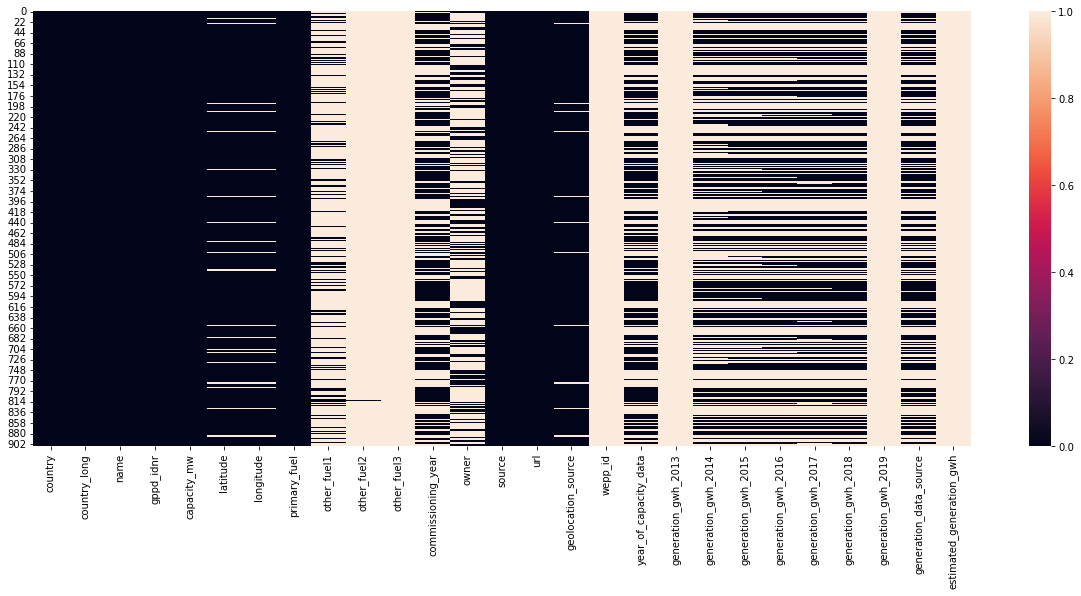

In [13]:
plt.figure(figsize=(21,8))
sns.heatmap(df.isnull())
plt.show()

In [14]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

###### I'm going to drop few columns those don't have any values inside it and also those who are not meaningful at all.
Since attributes 'name' and 'gppd_idnr'-(which is indicating the unique code for each power plant) have the 907 unique entries and both are not useful going forward hence we can drop both the columns or keep only 1,and here I'm keeping column 'gppd_idnr' for the further process.

Below are the columns that I'm going to drop manually by analysing the unique value presence and it's characteristics

In [15]:
df.drop(['country','country_long','name','url','year_of_capacity_data','other_fuel2','wepp_id','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source'],axis=1,inplace=True)

In [16]:
df

gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                                owner  \
0                2011.0                          Solar Paces   
1                   NaN                 Ultratech Cement ltd   
2                   NaN                                  AES   
3                2004.0                                  NaN   
4                2015.0                                  NaN   
..                  ...                                  ...   
902              2016.0                                  NaN   
903                 NaN  Karnataka Power Corporation Limited   
904                 NaN                                  NaN   
905                 NaN                   Hindustan Zinc ltd   
906                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  
0                    NaN  
1                    NaN  
2                    NaN  
3             626

In [17]:
df.head

<bound method NDFrame.head of       gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year          

In [18]:
df.tail

<bound method NDFrame.tail of       gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year          

In [19]:
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [20]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [21]:
df.nunique

<bound method DataFrame.nunique of       gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0    WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1    WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2    WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3    IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4    IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
..          ...          ...       ...        ...          ...         ...   
902  IND0000513       1600.0   16.2949    77.3568         Coal         Oil   
903  WRI1026222          3.0   12.8932    78.1654        Solar         NaN   
904  WRI1026776         25.5   15.2758    75.5811         Wind         NaN   
905  WRI1019901         80.0   24.3500    73.7477         Coal         NaN   
906  WRI1026761         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year     

In [22]:
for i in df.columns:
    print(f'The Unique Values in attribute "{i}" are\n {df[i].value_counts()}')
    print('\n')

The Unique Values in attribute "gppd_idnr" are
 WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


The Unique Values in attribute "capacity_mw" are
 5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


The Unique Values in attribute "latitude" are
 19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


The Unique Values in attribute "longitude" are
 71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


The Unique Values in 

###### Data Visualisation

Histplot

The Histogram Diagram for attribute "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


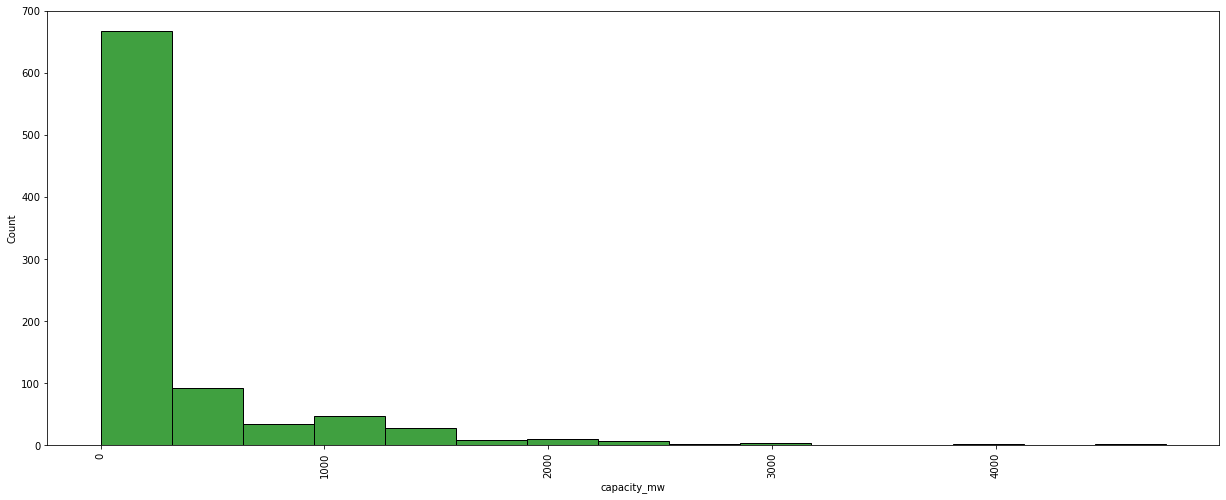



The Histogram Diagram for attribute "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


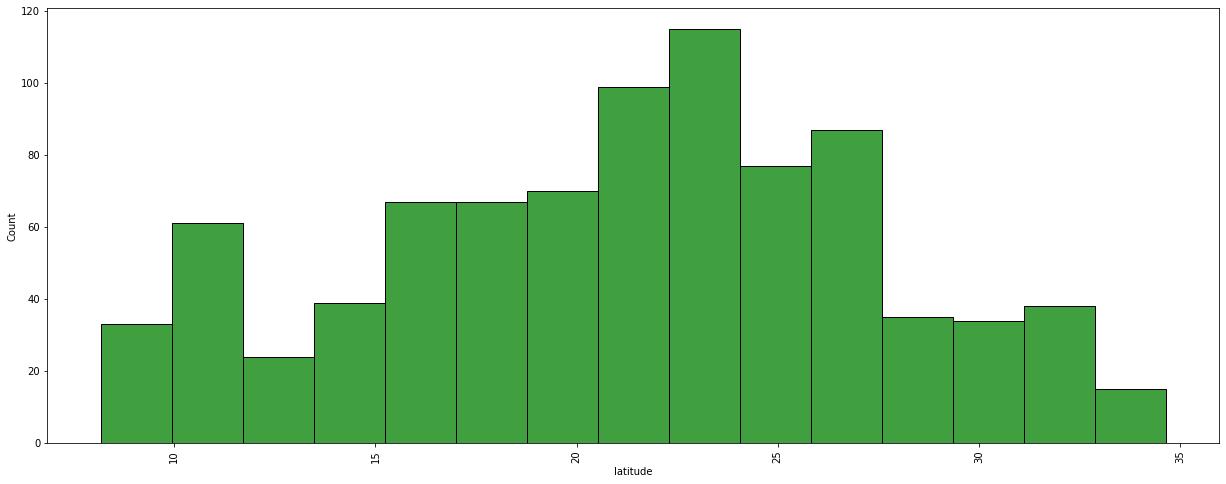



The Histogram Diagram for attribute "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


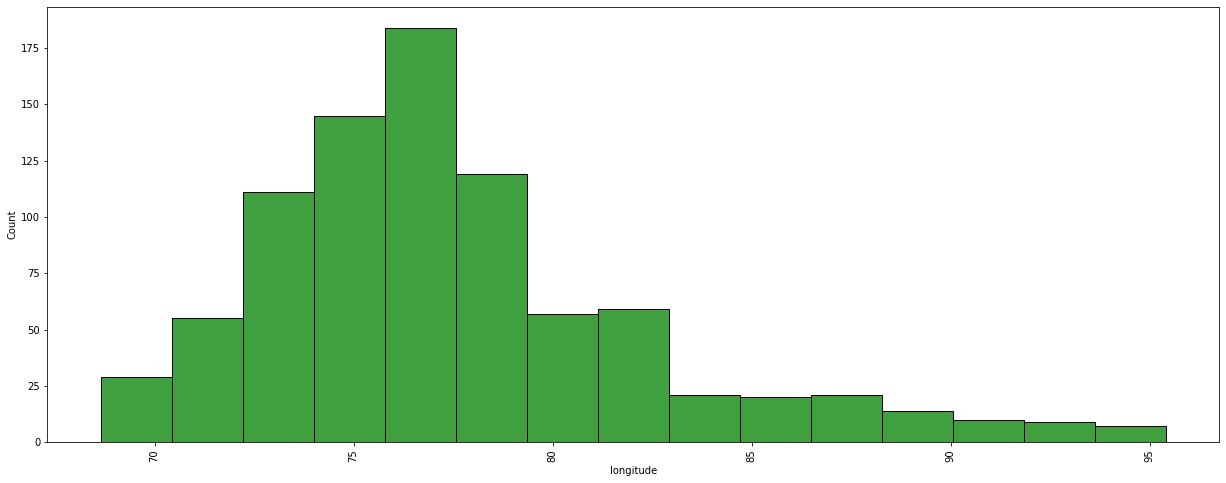



The Histogram Diagram for attribute "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


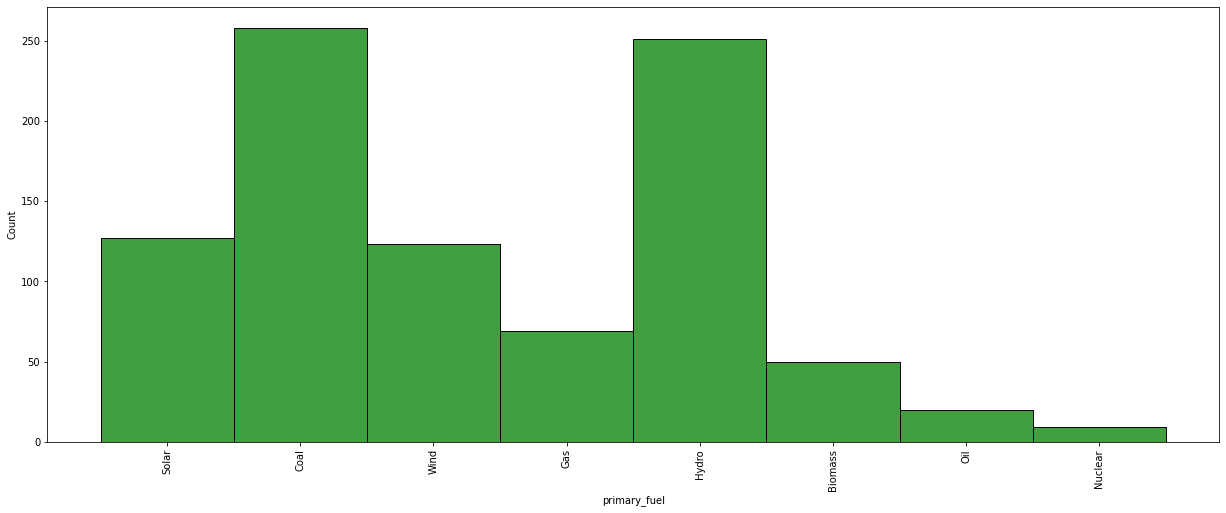



The Histogram Diagram for attribute "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


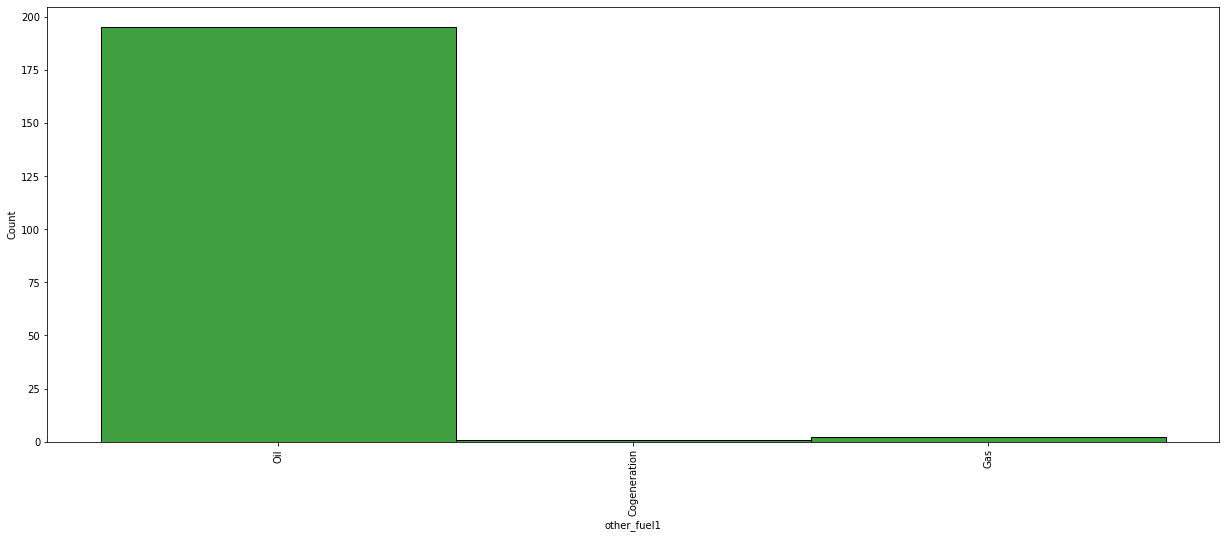



The Histogram Diagram for attribute "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


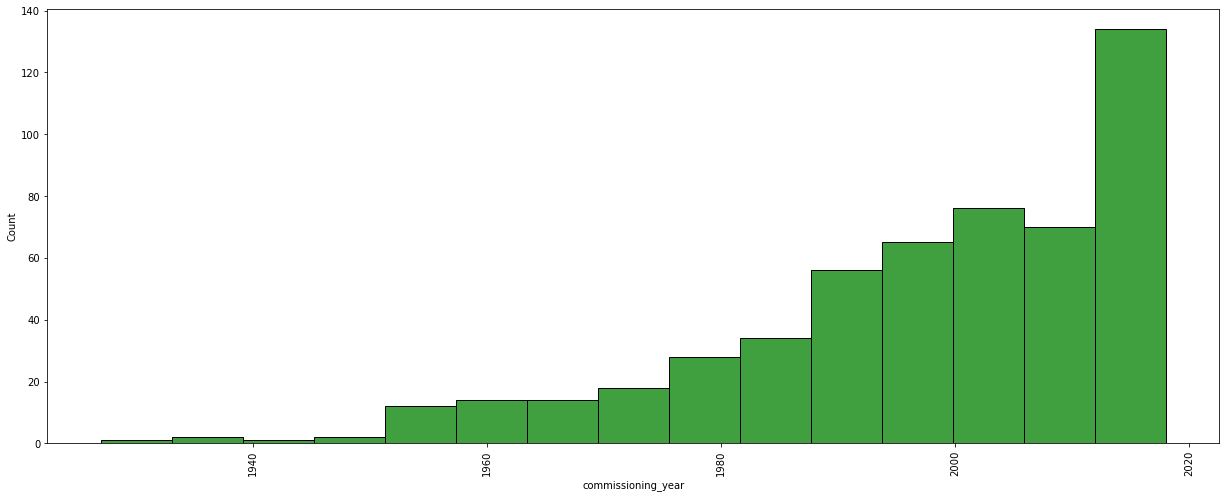



The Histogram Diagram for attribute "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


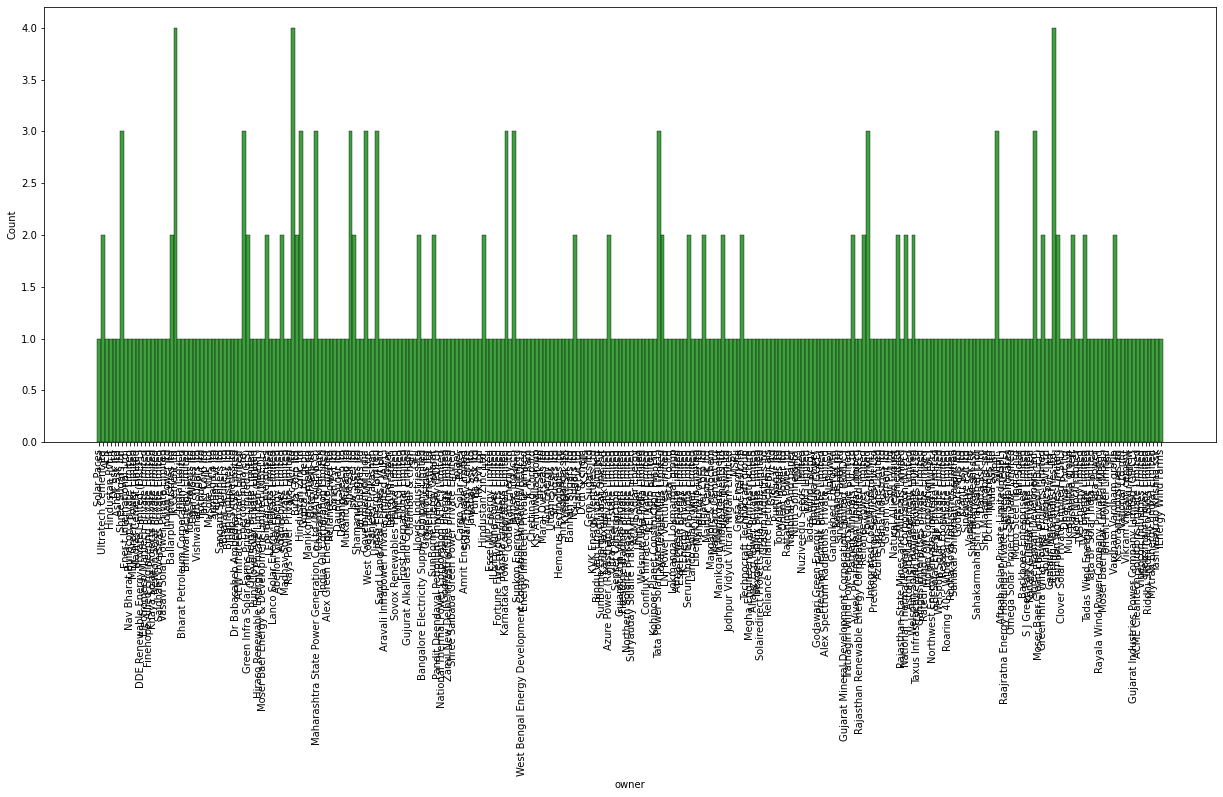



The Histogram Diagram for attribute "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


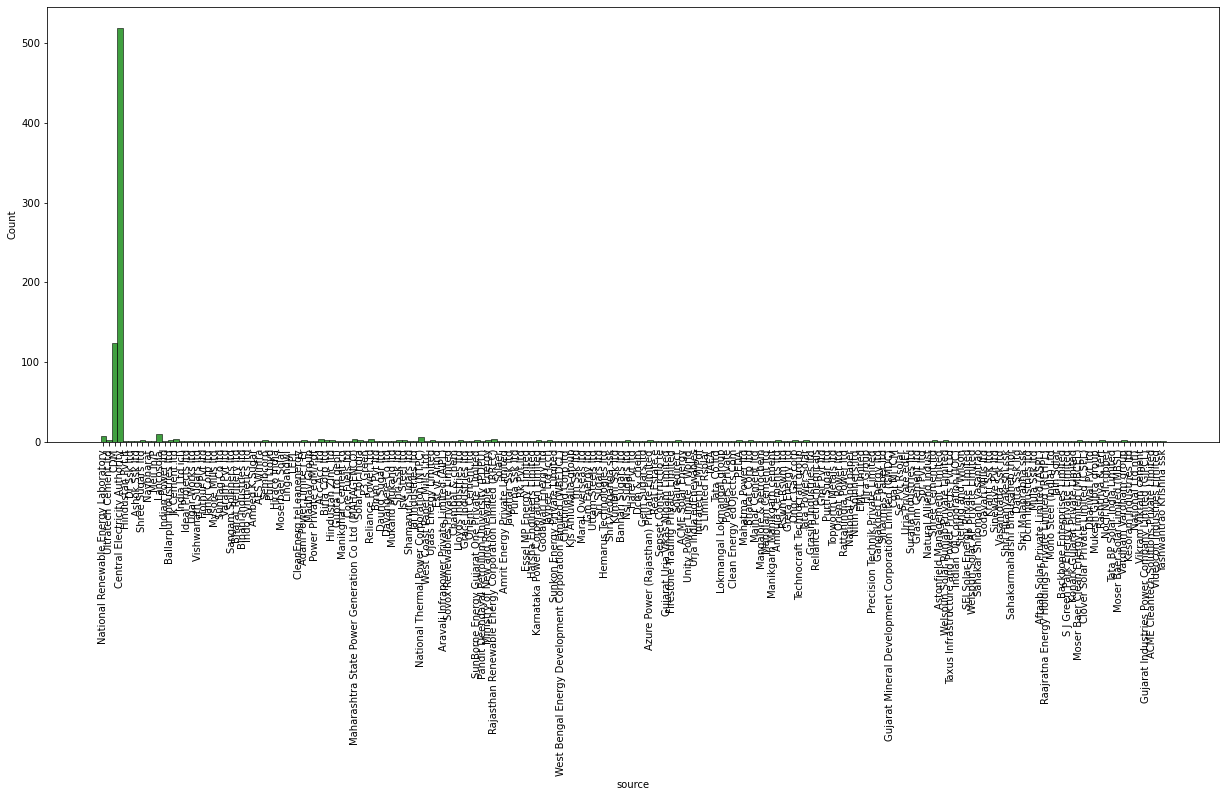



The Histogram Diagram for attribute "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


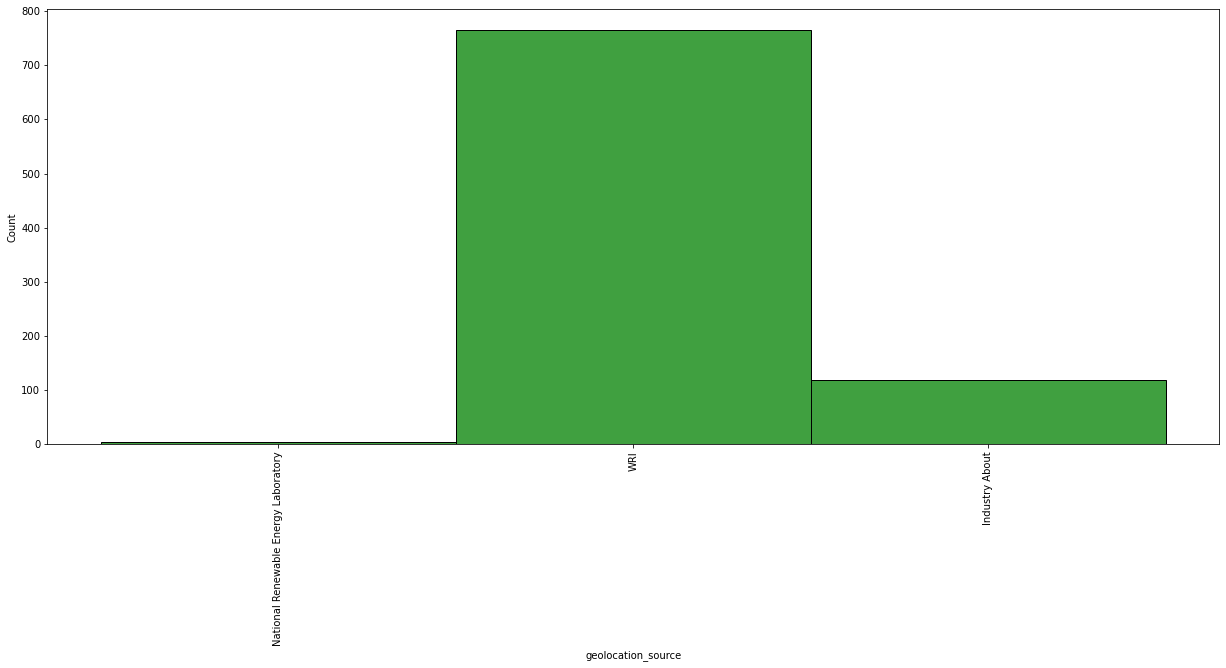



The Histogram Diagram for attribute "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


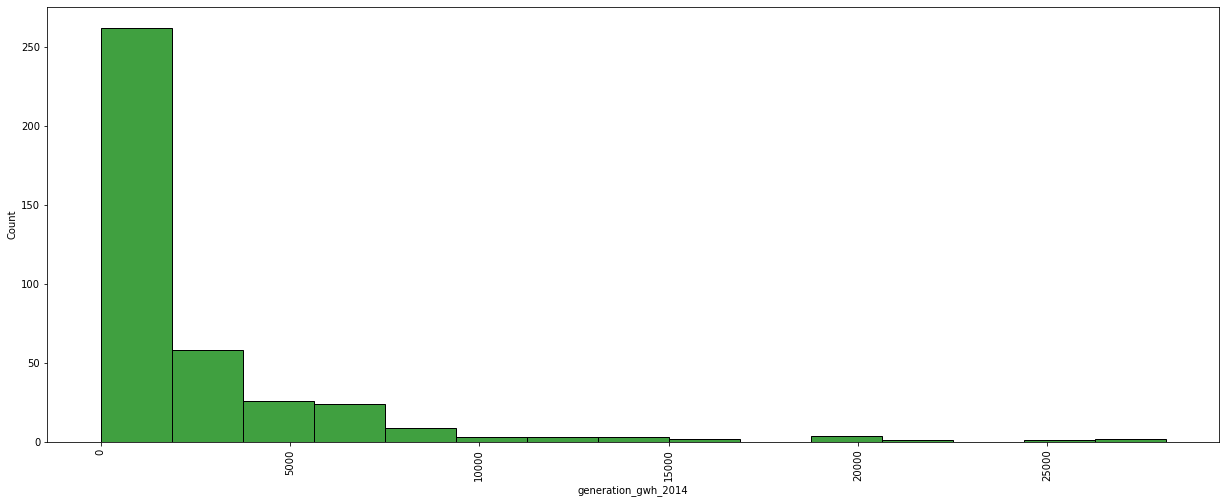



The Histogram Diagram for attribute "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


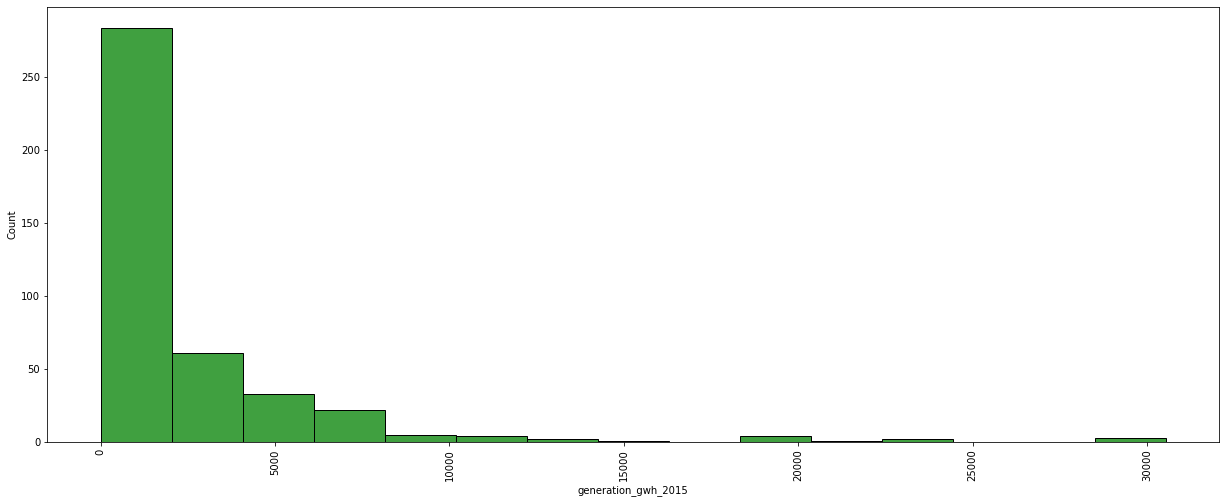



The Histogram Diagram for attribute "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


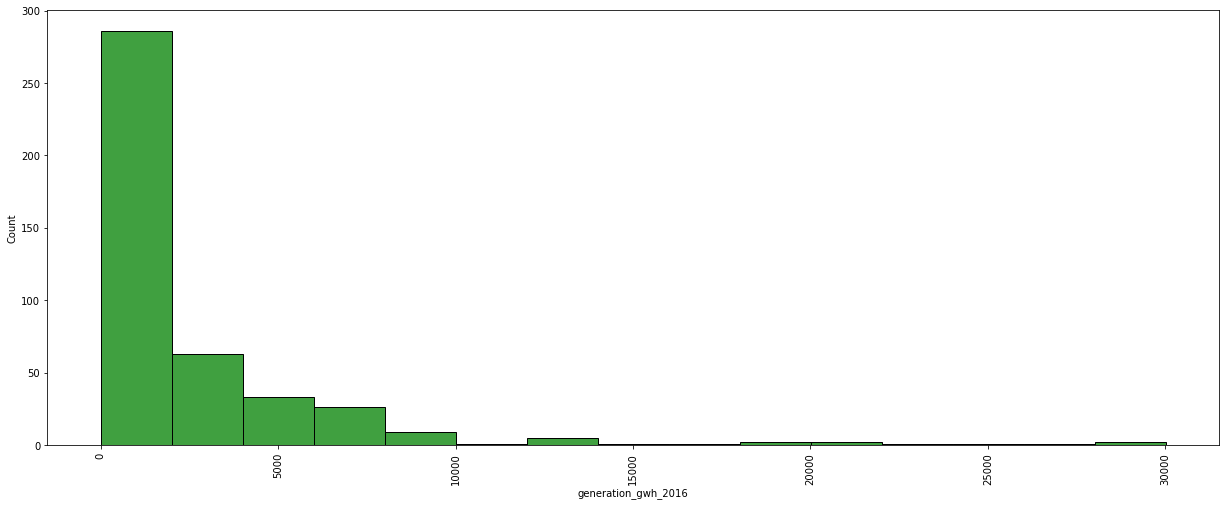



The Histogram Diagram for attribute "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


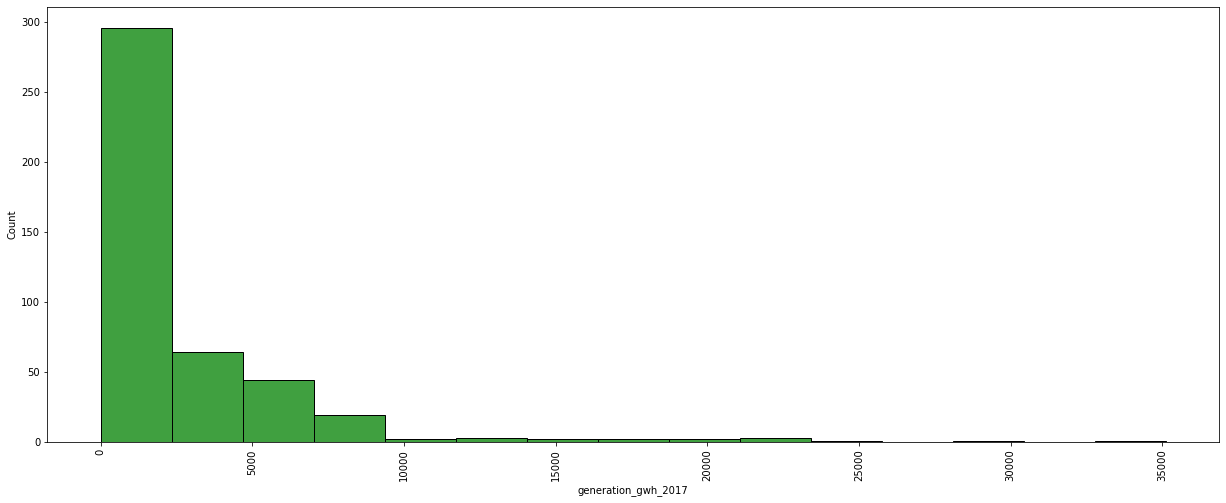



The Histogram Diagram for attribute "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


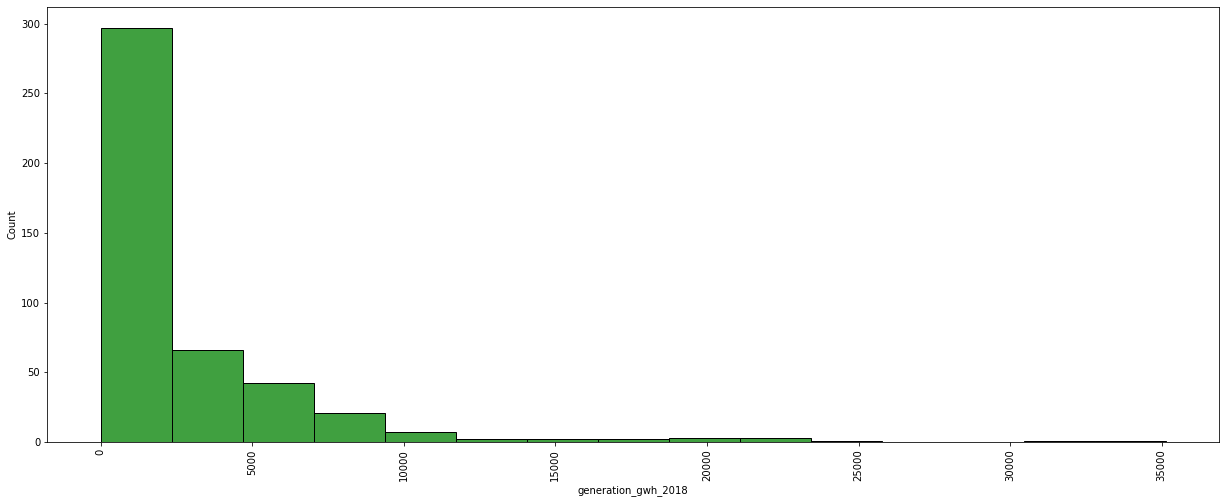

In [23]:
for i in df.columns[1:]:
    plt.figure(figsize=(21,8))
    print(f'The Histogram Diagram for attribute "{i}" is-\n {sns.histplot(df[i],color="g",bins=15)}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### Scatterplot (x-axis=capacity_mw)

The Scatterplot B/w attributes "capacity_mw" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


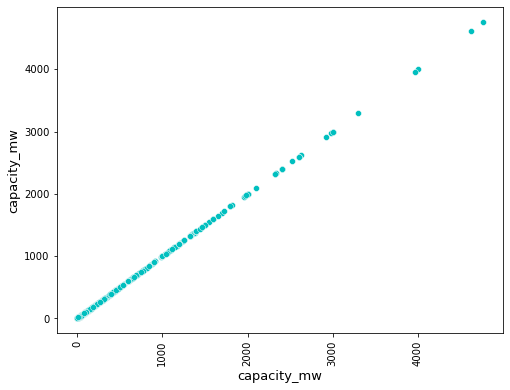



The Scatterplot B/w attributes "capacity_mw" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


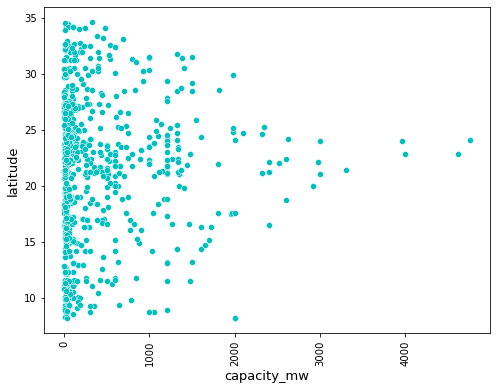



The Scatterplot B/w attributes "capacity_mw" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


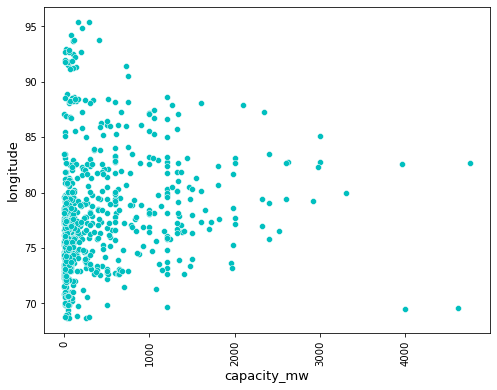



The Scatterplot B/w attributes "capacity_mw" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


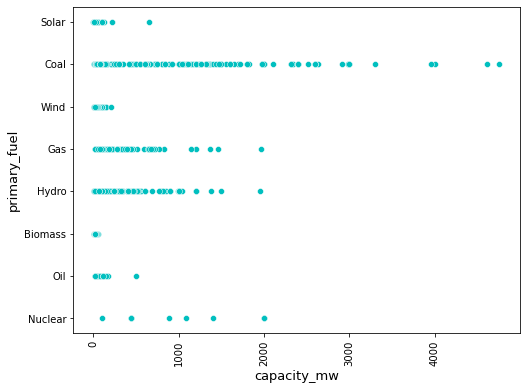



The Scatterplot B/w attributes "capacity_mw" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


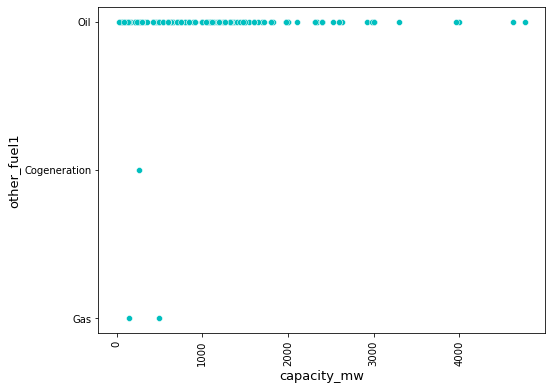



The Scatterplot B/w attributes "capacity_mw" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


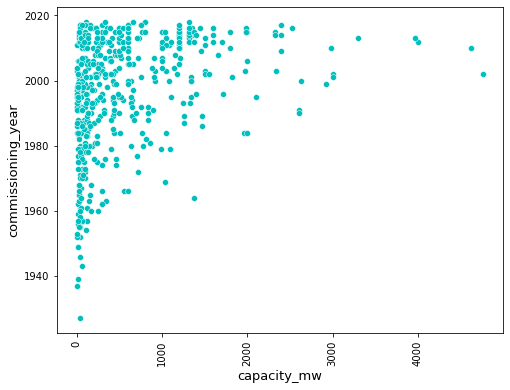



The Scatterplot B/w attributes "capacity_mw" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


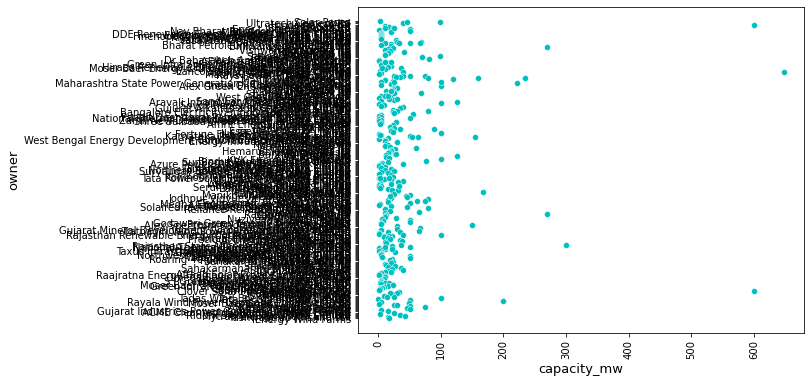



The Scatterplot B/w attributes "capacity_mw" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


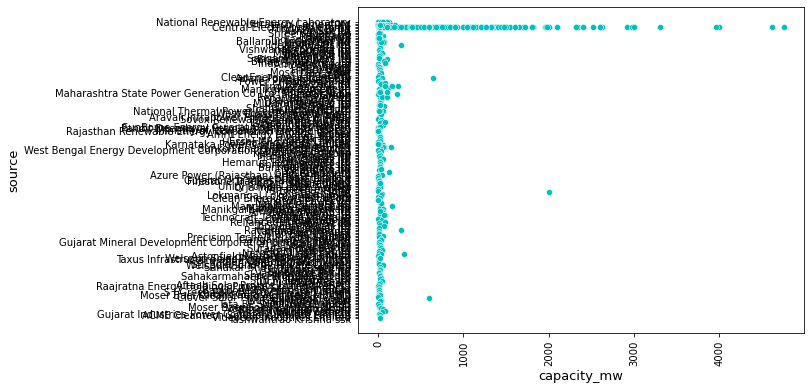



The Scatterplot B/w attributes "capacity_mw" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


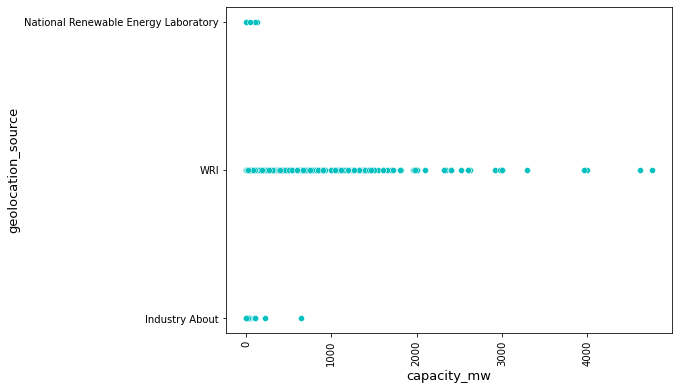



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


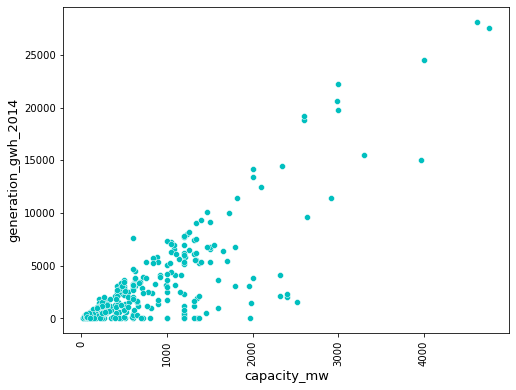



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


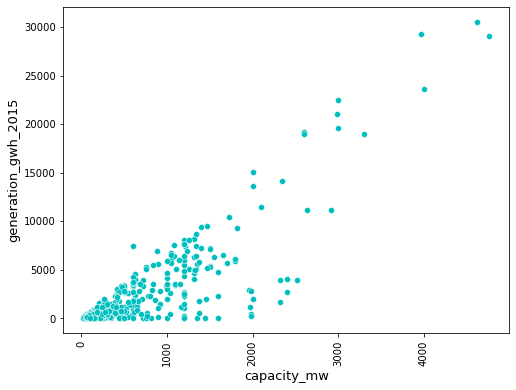



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


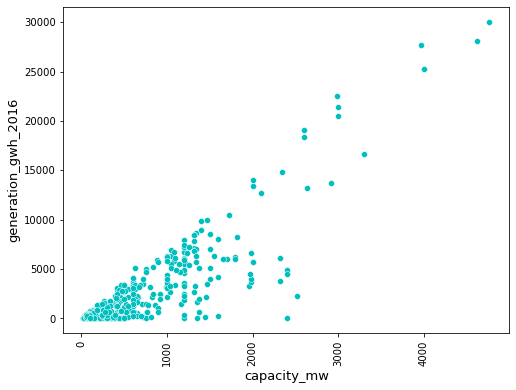



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


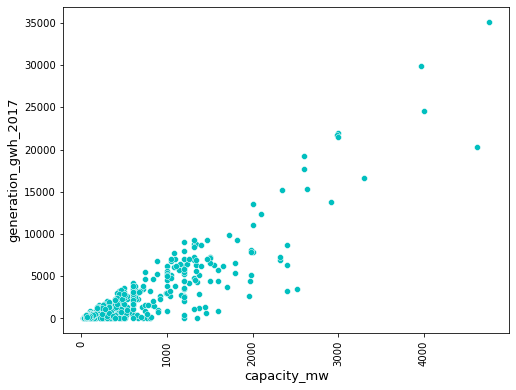



The Scatterplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


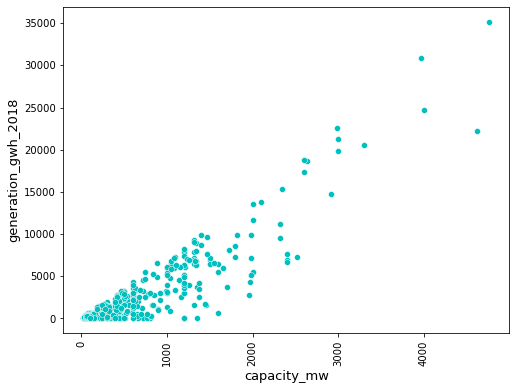

In [24]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Scatterplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.scatterplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

##### coal and hydro are most useful among other primary fuels while producing the electricity
Oil usage are most as comapre to other fuel category in producing electricity
B/w year 2000-2020 electricity production is increasing
Most of the powerplants are generating the electricity in the capacity b/w (0-200) megawatt.
Strong Positive correlation exist b/w capacity_mw and generation_gwh (for each year 2014,2015,16,17,18,19)

###### Lineplot

The Lineplot B/w attributes "capacity_mw" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


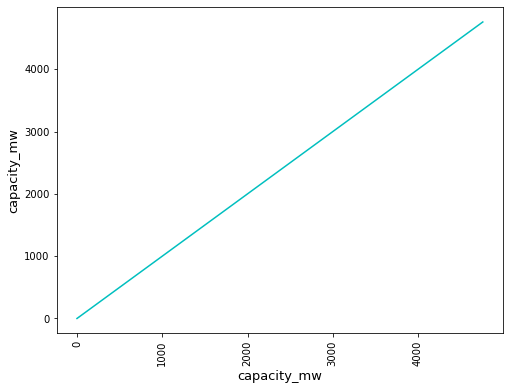



The Lineplot B/w attributes "capacity_mw" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


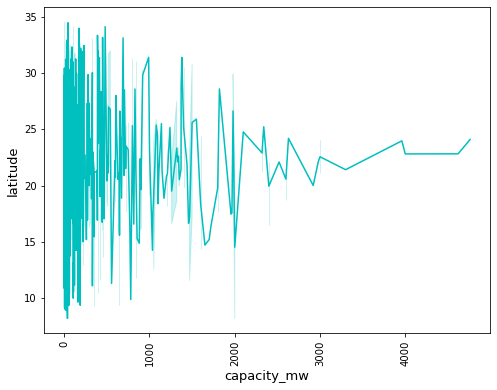



The Lineplot B/w attributes "capacity_mw" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


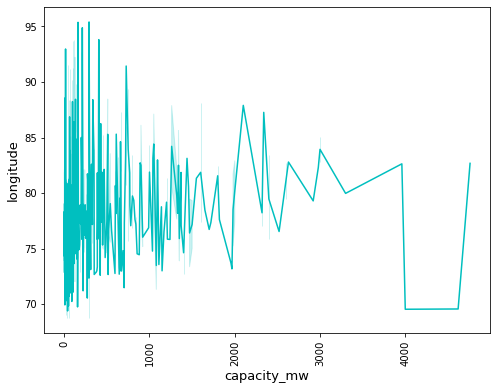



The Lineplot B/w attributes "capacity_mw" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


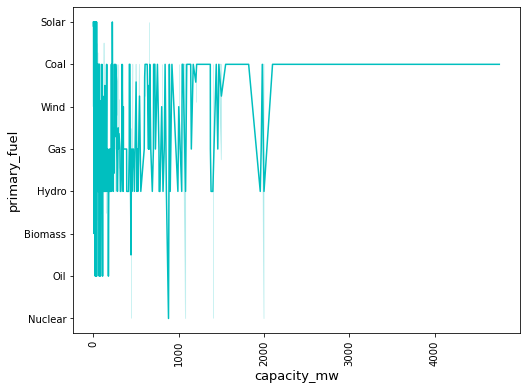



The Lineplot B/w attributes "capacity_mw" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


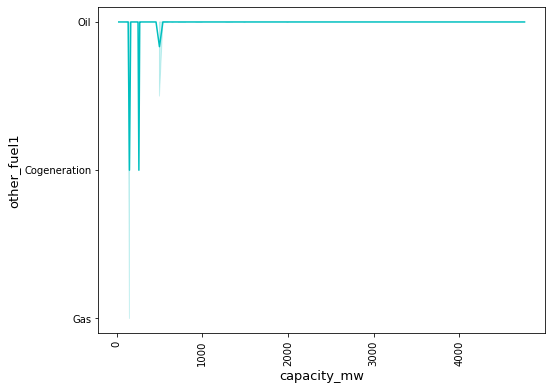



The Lineplot B/w attributes "capacity_mw" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


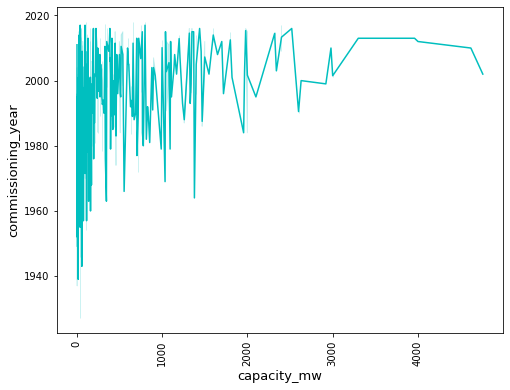



The Lineplot B/w attributes "capacity_mw" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


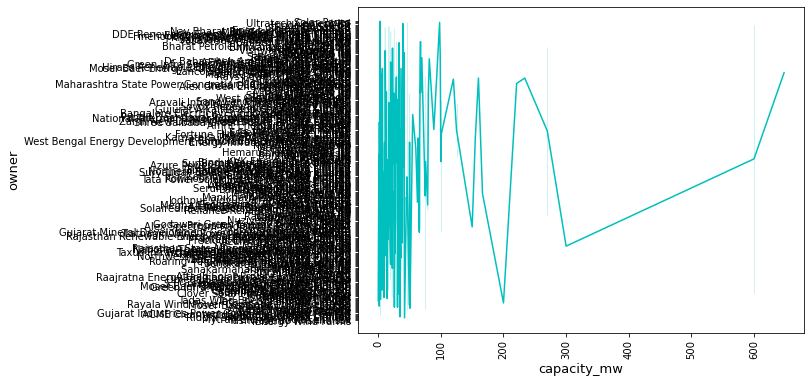



The Lineplot B/w attributes "capacity_mw" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


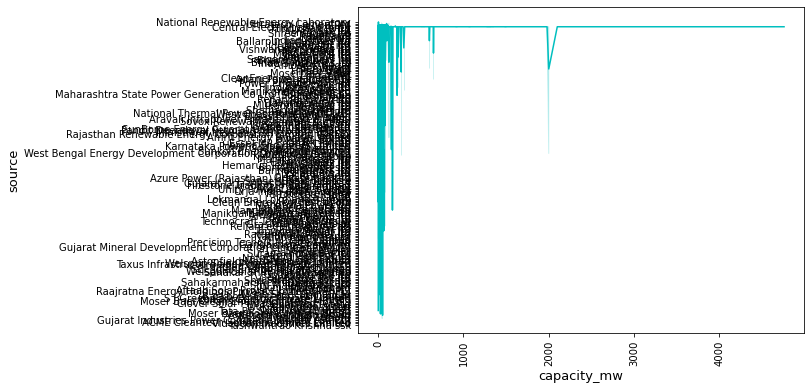



The Lineplot B/w attributes "capacity_mw" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


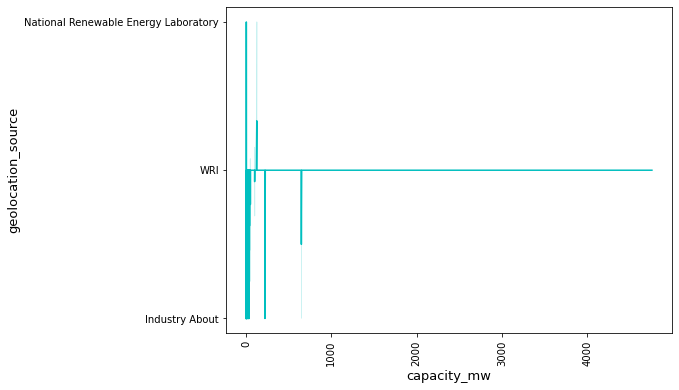



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


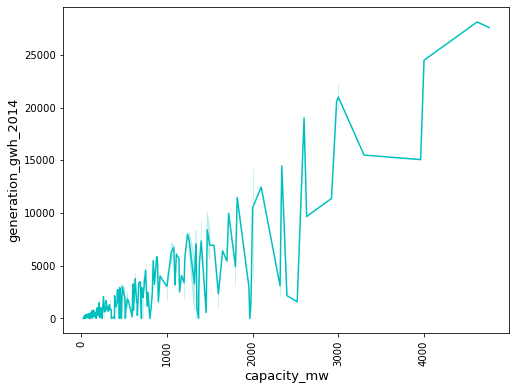



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


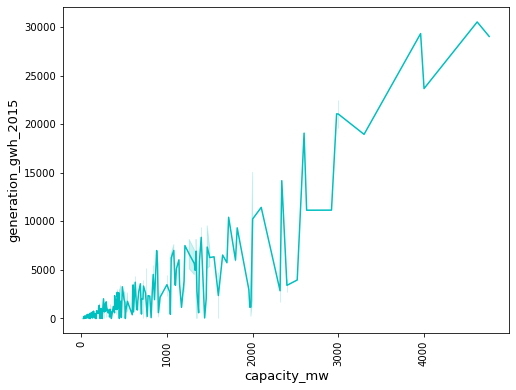



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


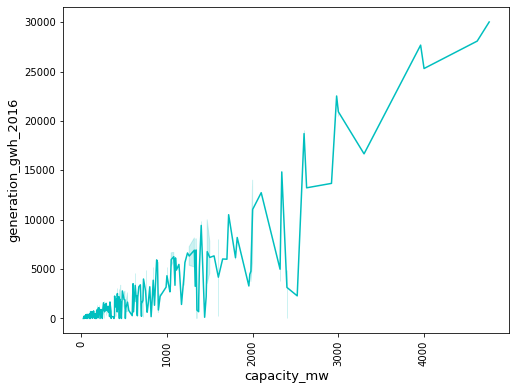



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


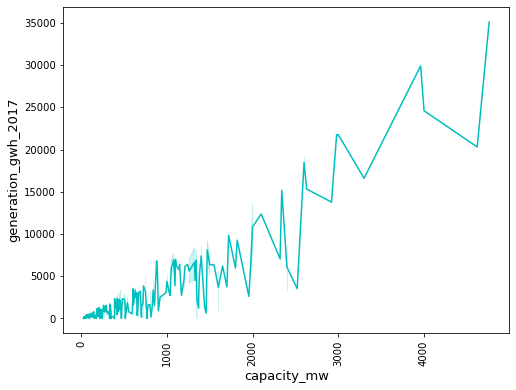



The Lineplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


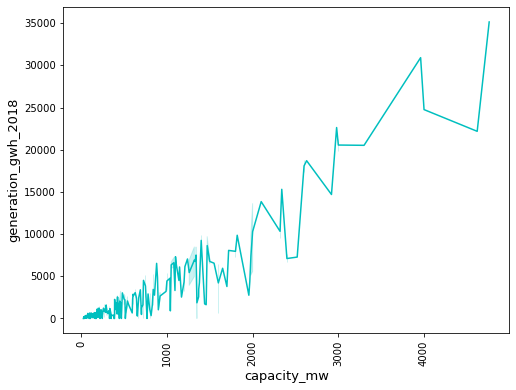

In [25]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Lineplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.lineplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

###### Jointplot

The Jointplot B/w attributes "capacity_mw" & "capacity_mw" is-


<Figure size 576x432 with 0 Axes>

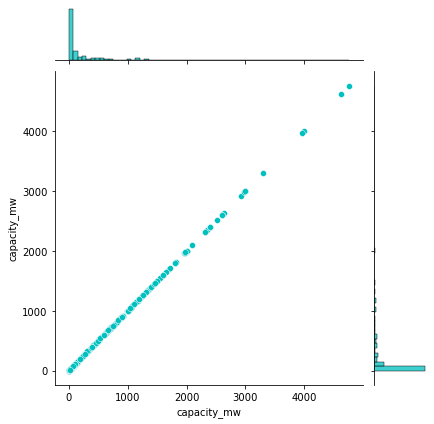



The Jointplot B/w attributes "capacity_mw" & "latitude" is-


<Figure size 576x432 with 0 Axes>

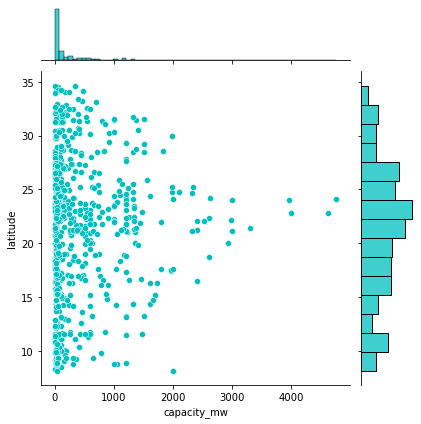



The Jointplot B/w attributes "capacity_mw" & "longitude" is-


<Figure size 576x432 with 0 Axes>

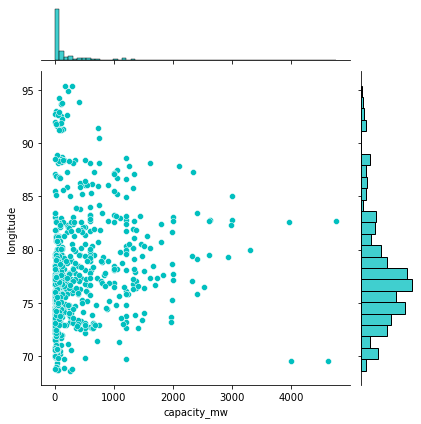



The Jointplot B/w attributes "capacity_mw" & "primary_fuel" is-


<Figure size 576x432 with 0 Axes>

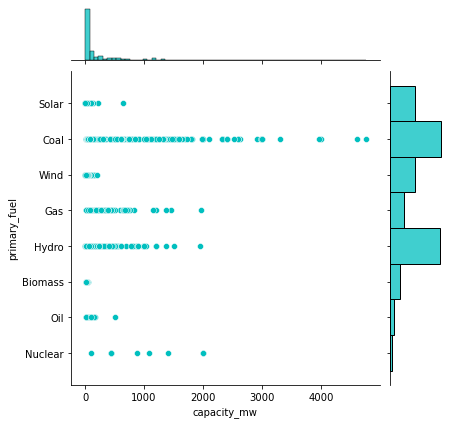



The Jointplot B/w attributes "capacity_mw" & "other_fuel1" is-


<Figure size 576x432 with 0 Axes>

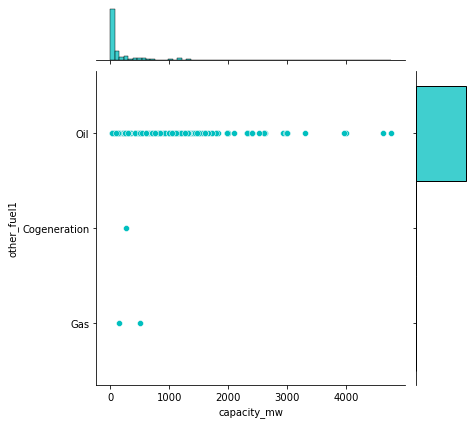



The Jointplot B/w attributes "capacity_mw" & "commissioning_year" is-


<Figure size 576x432 with 0 Axes>

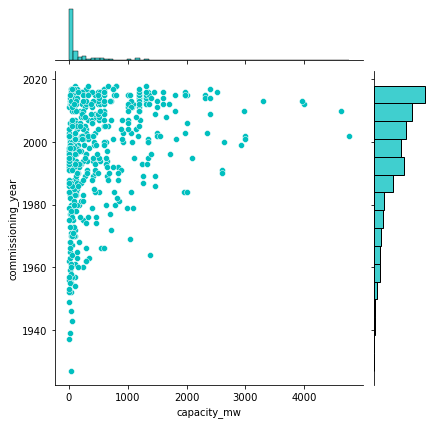



The Jointplot B/w attributes "capacity_mw" & "owner" is-


<Figure size 576x432 with 0 Axes>

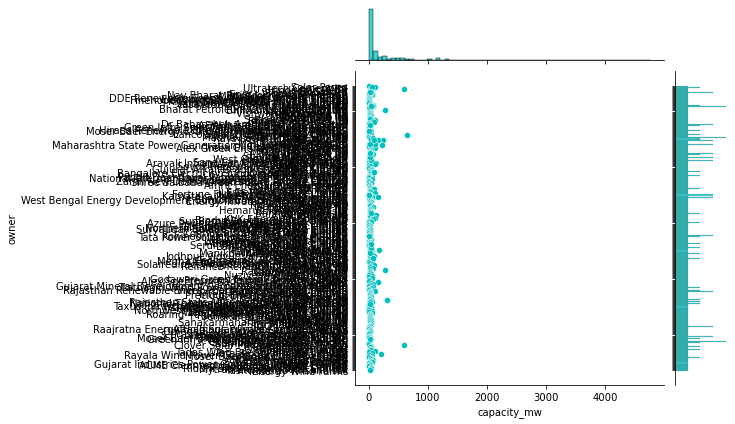



The Jointplot B/w attributes "capacity_mw" & "source" is-


<Figure size 576x432 with 0 Axes>

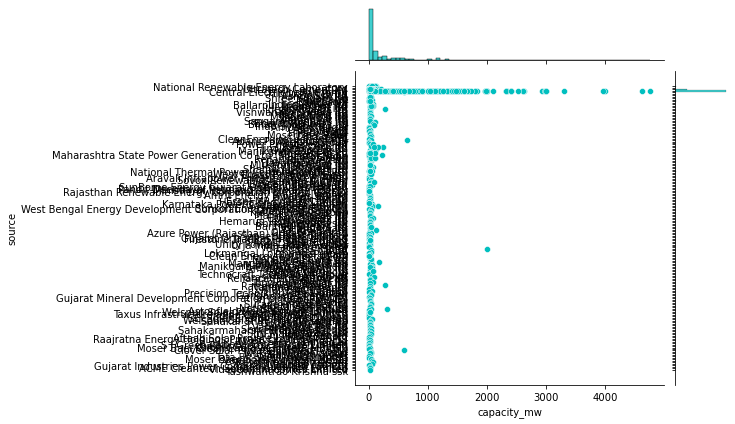



The Jointplot B/w attributes "capacity_mw" & "geolocation_source" is-


<Figure size 576x432 with 0 Axes>

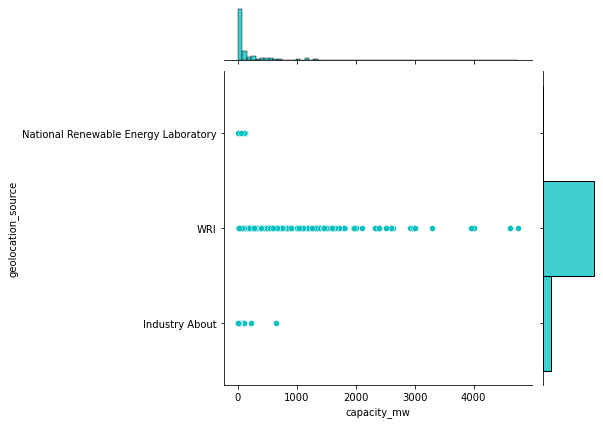



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2014" is-


<Figure size 576x432 with 0 Axes>

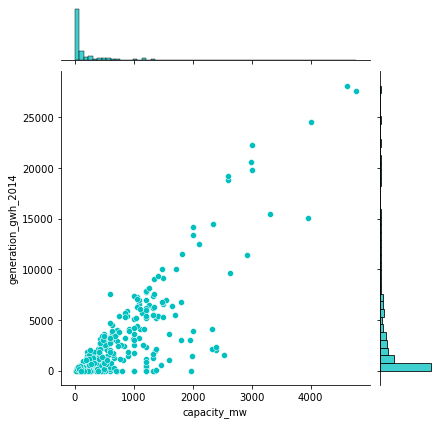



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2015" is-


<Figure size 576x432 with 0 Axes>

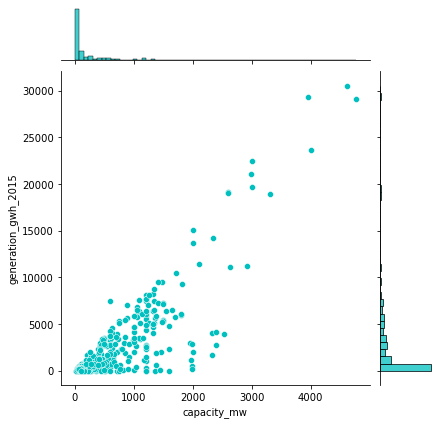



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2016" is-


<Figure size 576x432 with 0 Axes>

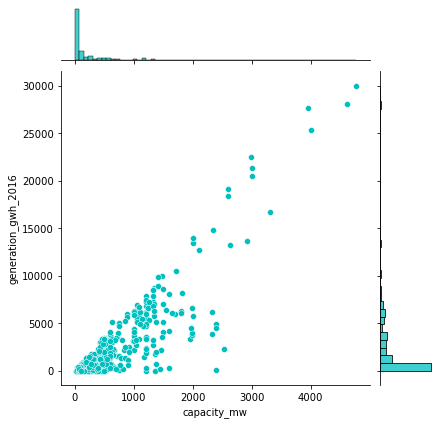



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2017" is-


<Figure size 576x432 with 0 Axes>

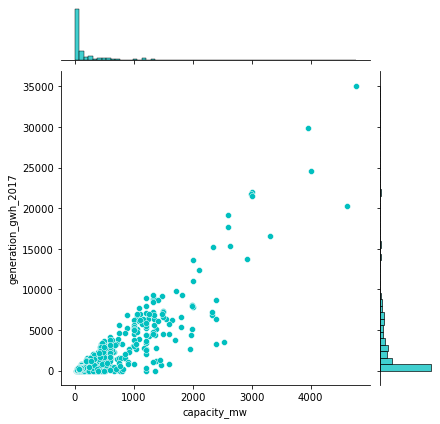



The Jointplot B/w attributes "capacity_mw" & "generation_gwh_2018" is-


<Figure size 576x432 with 0 Axes>

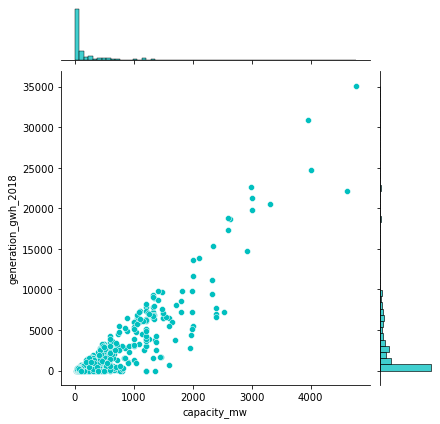

In [26]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Jointplot B/w attributes "capacity_mw" & "{i}" is-\n {sns.jointplot(df["capacity_mw"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("capacity_mw",fontsize=13)
    plt.show()
    print('\n')

###### Scatterplot (x-axis= primary fuel)

The Scatterplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


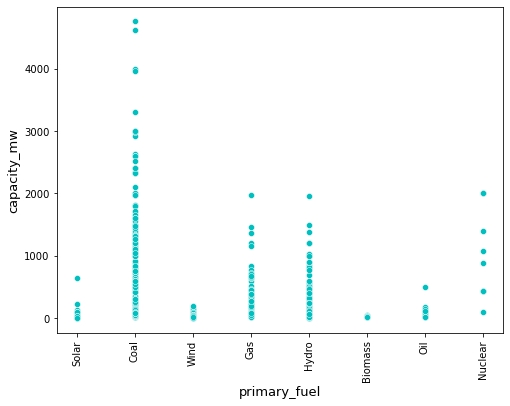



The Scatterplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


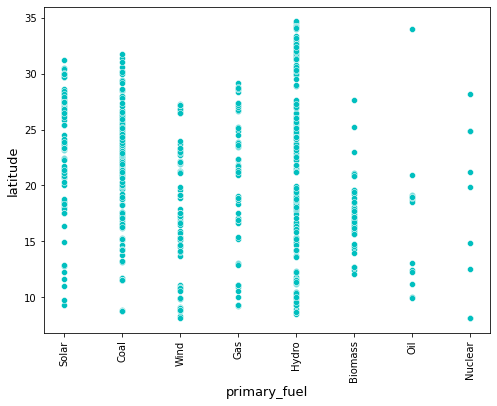



The Scatterplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


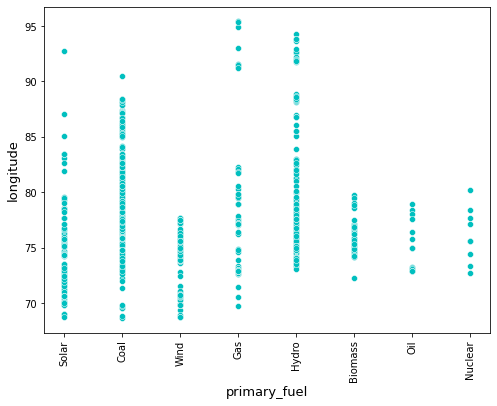



The Scatterplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


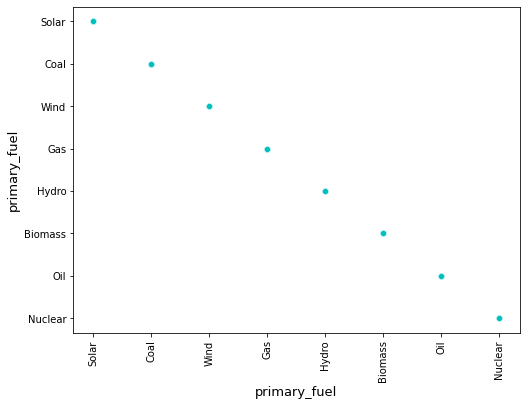



The Scatterplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


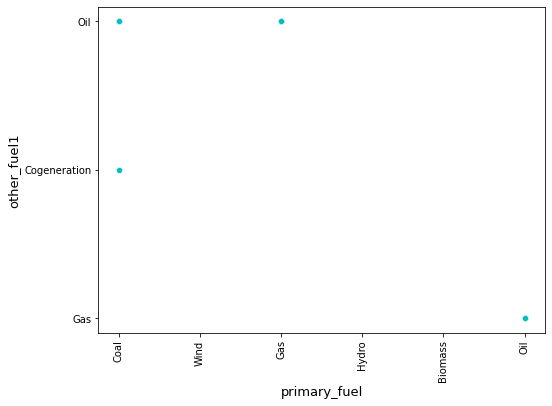



The Scatterplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


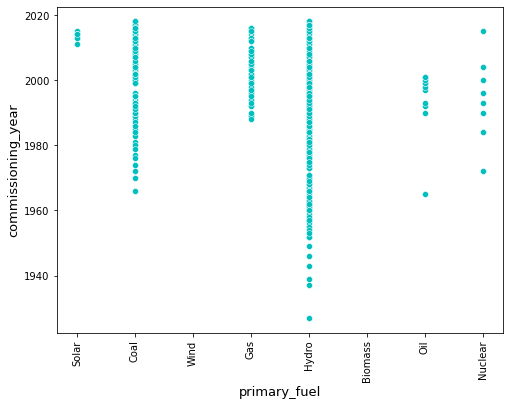



The Scatterplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


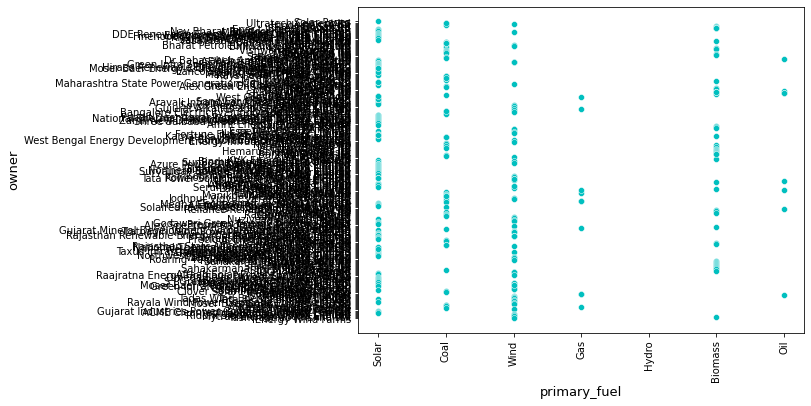



The Scatterplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


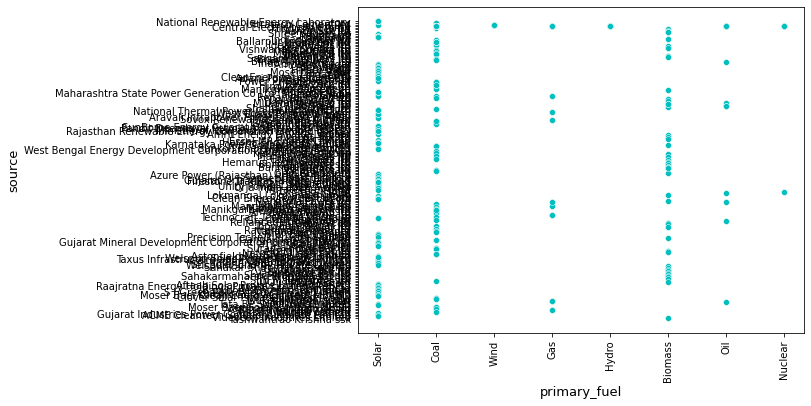



The Scatterplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


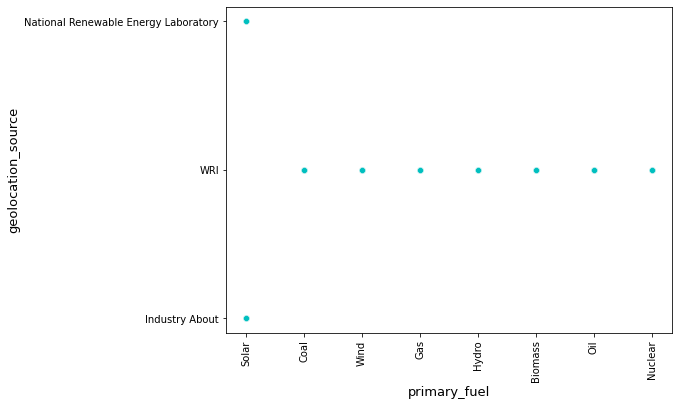



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


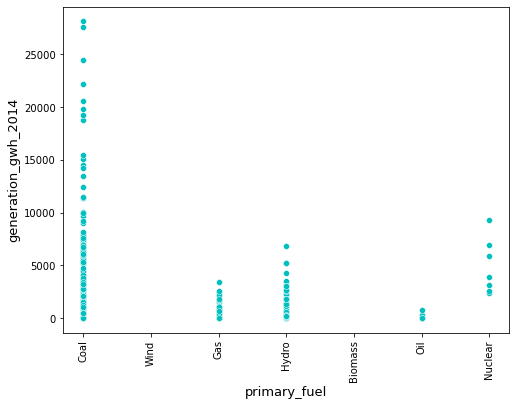



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


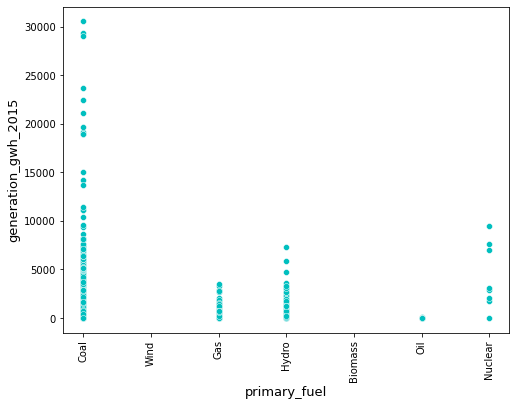



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


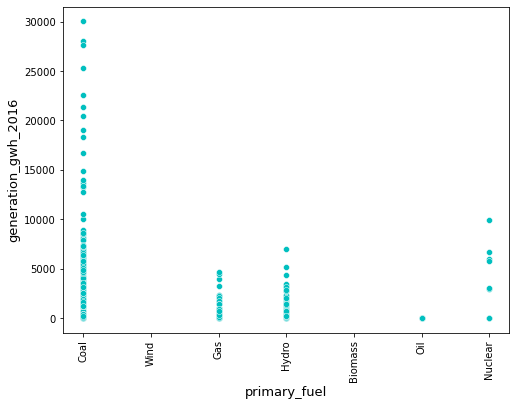



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


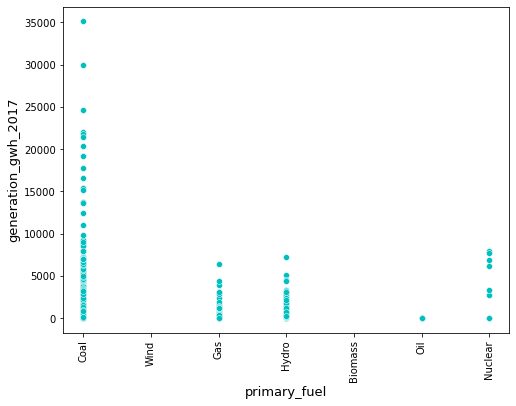



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


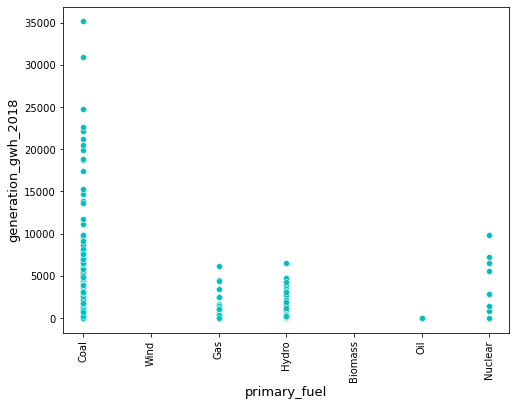

In [27]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Scatterplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.scatterplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

###### Linearplot

The Lineplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


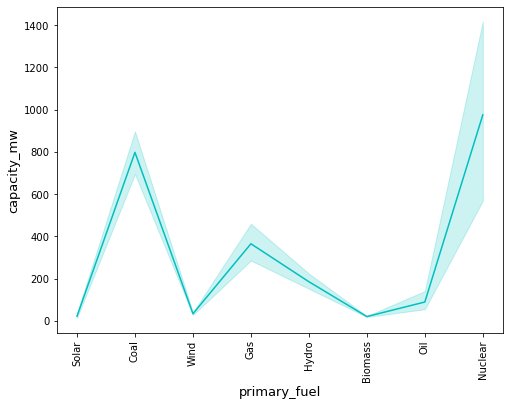



The Lineplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


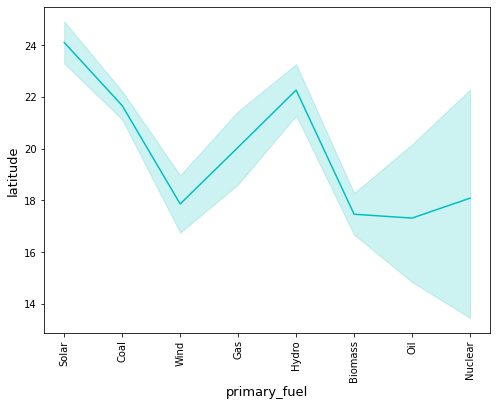



The Lineplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


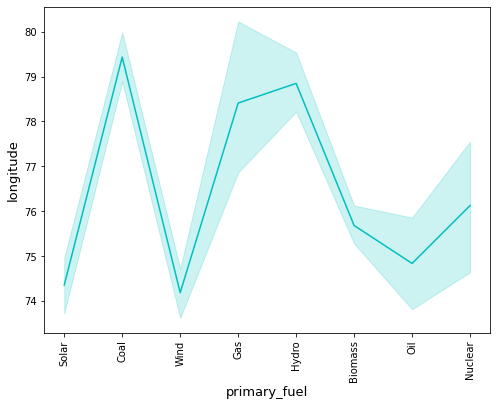



The Lineplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


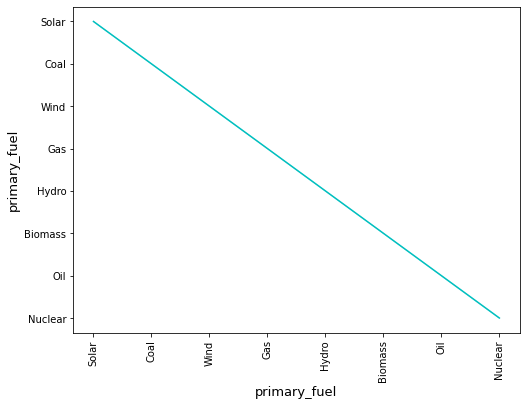



The Lineplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


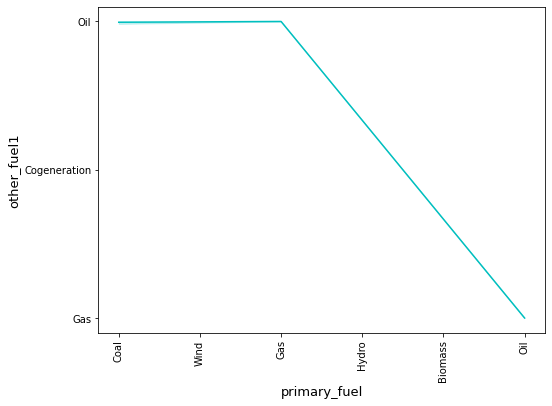



The Lineplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


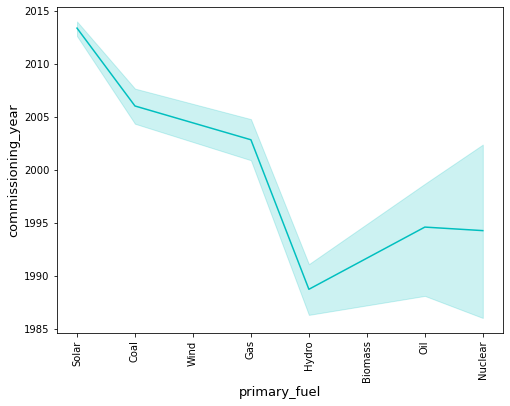



The Lineplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


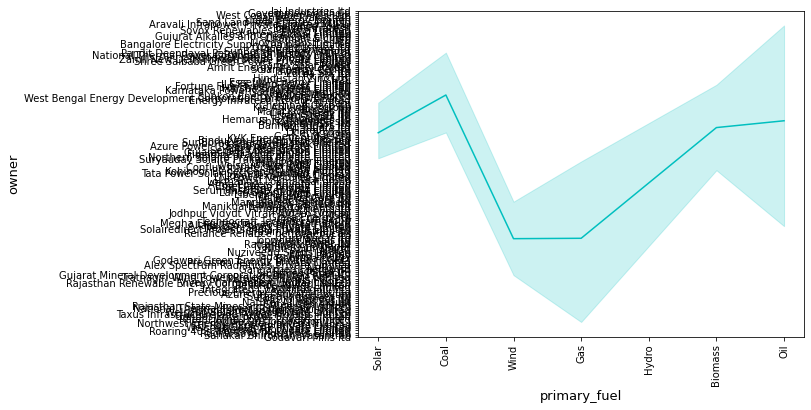



The Lineplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


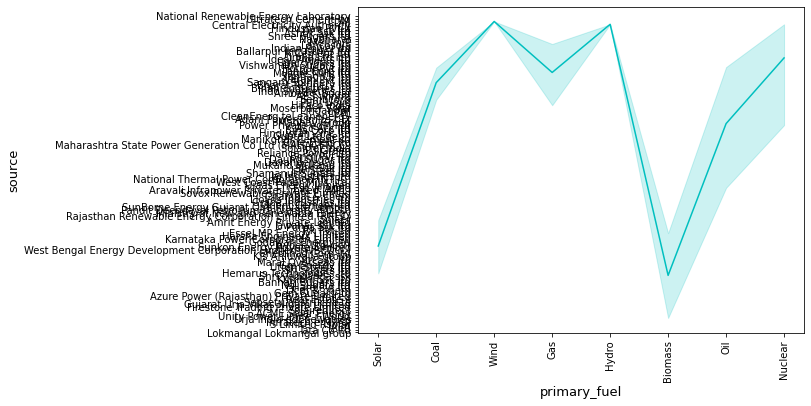



The Lineplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


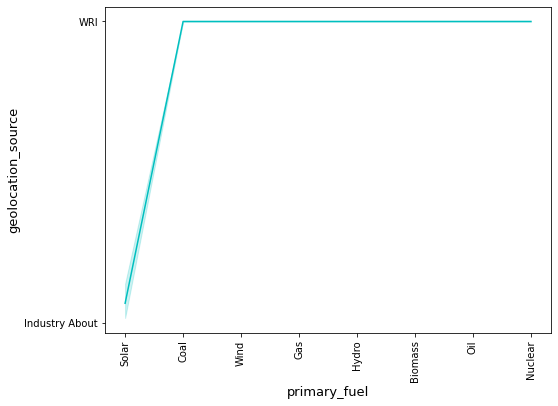



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


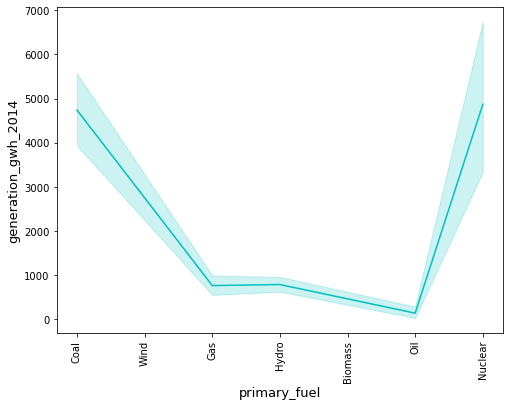



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


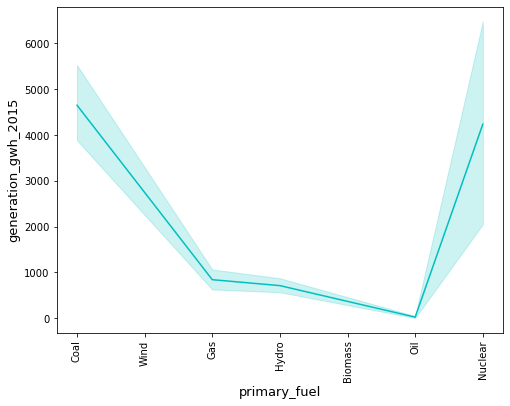



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


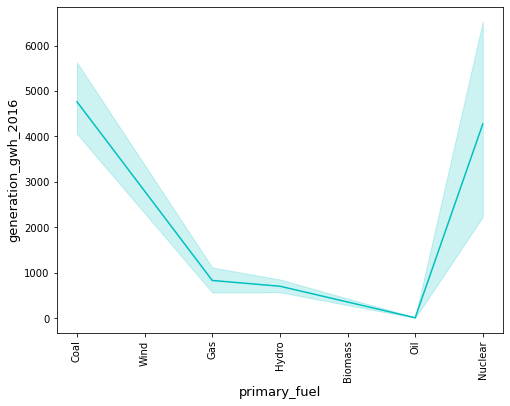



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


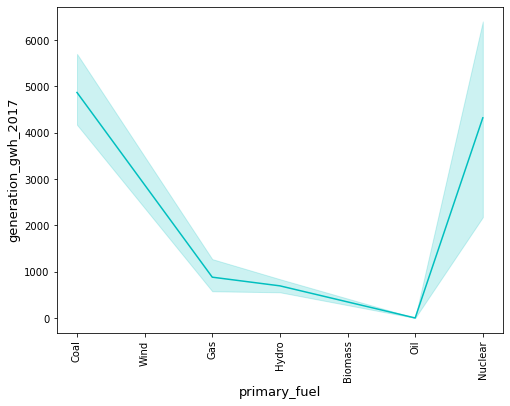



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


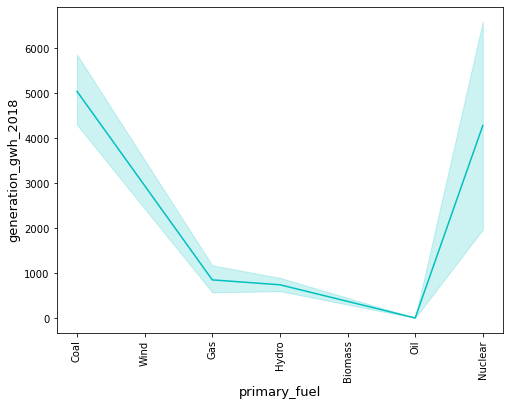

In [28]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Lineplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.lineplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

#### In the first figure it's showing that the capacity in megawatt is almost 0 when they generating the electricity with the help of primary fuel Solar and capacity goes up to 800mw when coal comes into the picture,then again decreasing w.r.t. wind and then increases approx 400mw w.r.t. gas then again decreases in case of hydro. Now what we can understand that Nuclear is producing higher capacity of electricity w.r.t. all other primary fuels and which is about 1000 megawatt and then Coal is second in the list.
Here we can write the ascending form of primary fuel w.r.t. procuing the amount of capacity of electricity.
Solar<Biomass<Wind<Oil<Hydro<Gas<coal<Nuclear

###### Pairplot

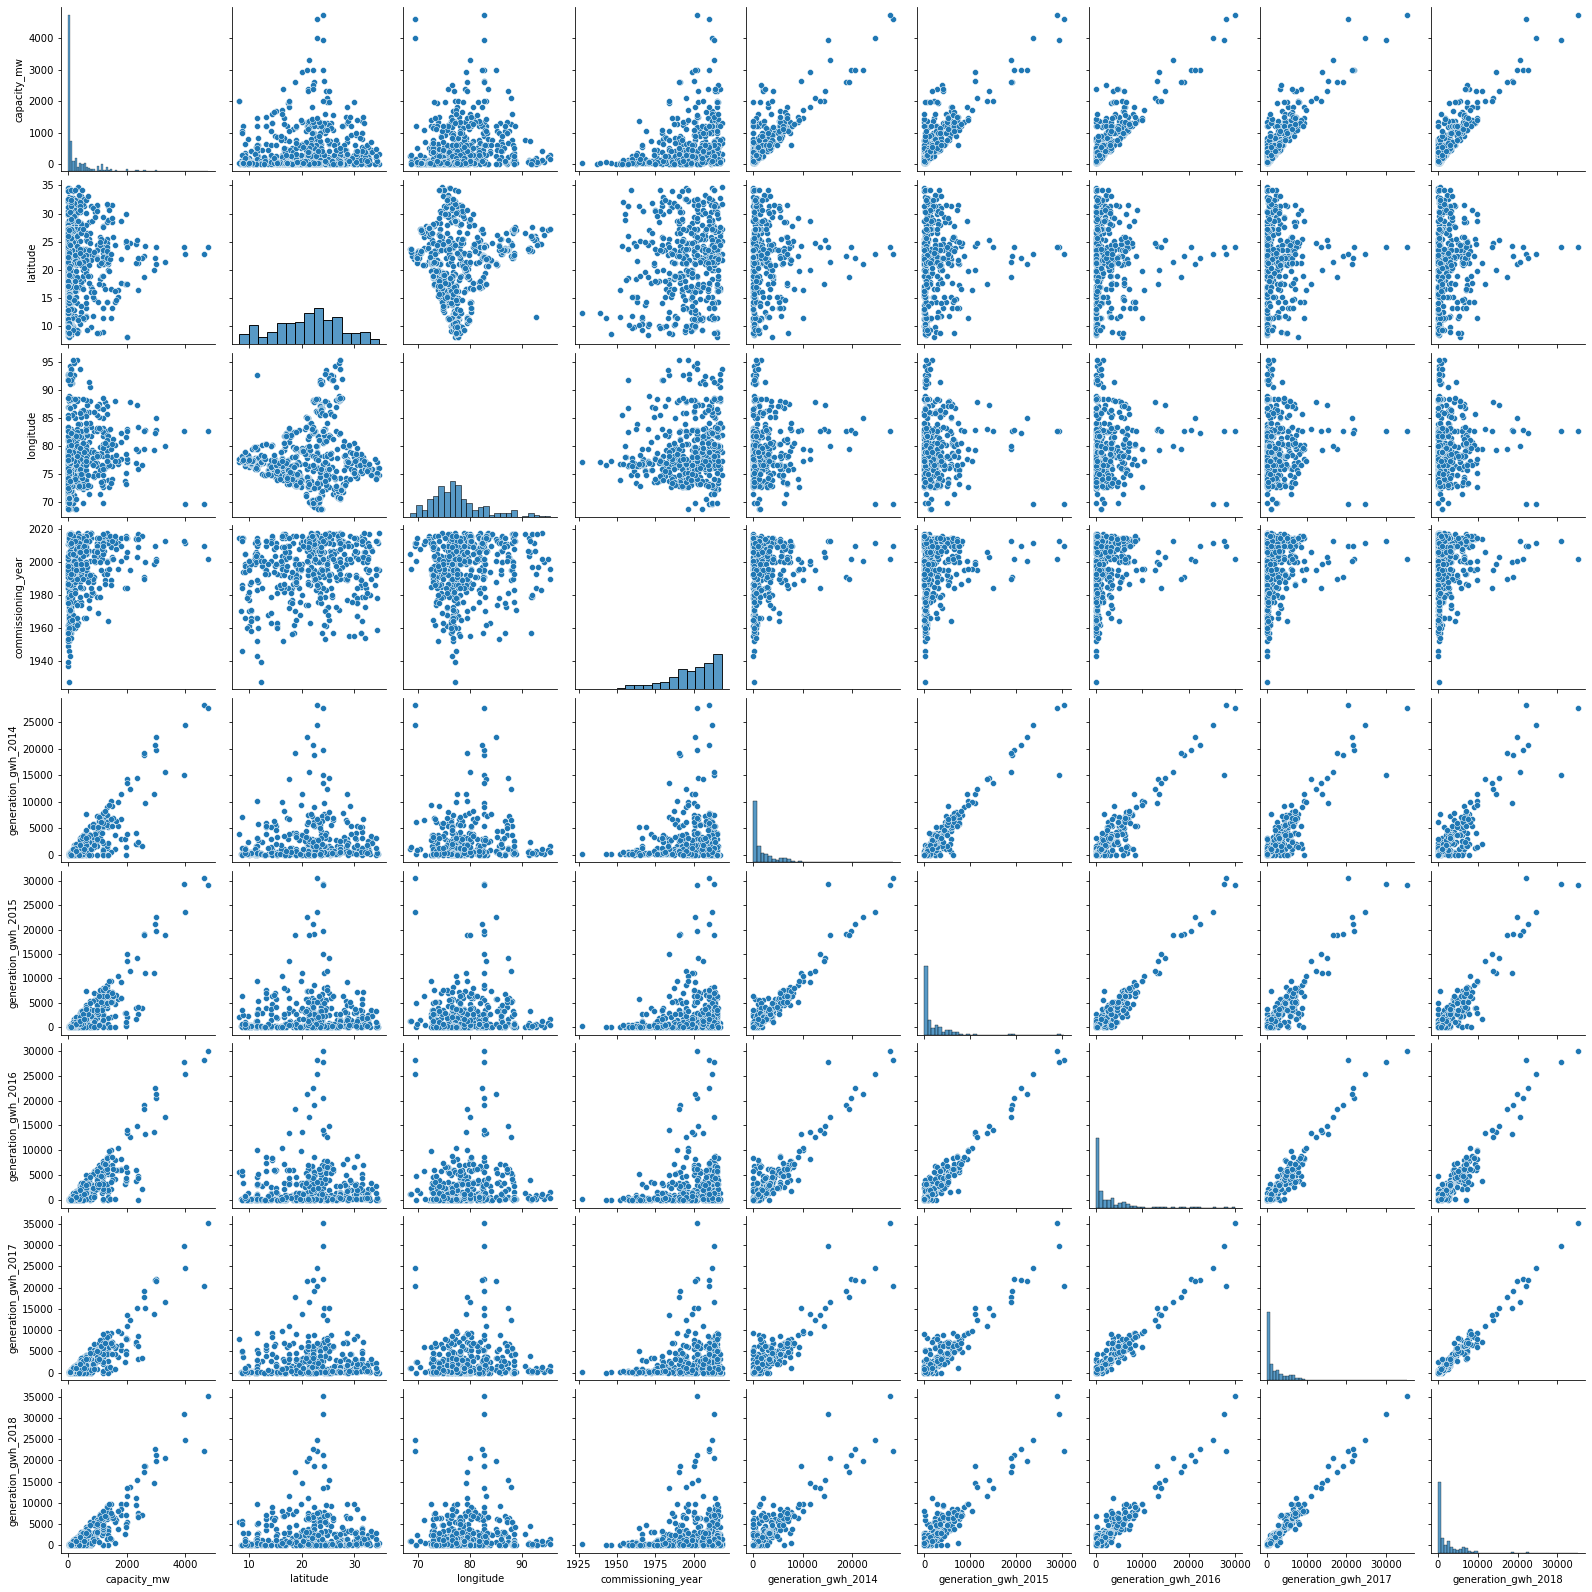

In [29]:
sns.pairplot(df)
plt.show()

###### SimpleImputer
To replace nan values of categorical and numeric columns w.r.t. mode and mean/median

In [30]:
import sklearn
from sklearn.impute import SimpleImputer

In [31]:
l=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for j in l:
    df[j]=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df[j].values.reshape(-1,1))

In [32]:
#replacing nan of categorical columns with mode
m=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']
for k in m:
    df[k]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[k].values.reshape(-1,1))

In [33]:
df.isnull().sum().sum()

0

###### Encoding

Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
n=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']
for p in n:
    df[p]=LabelEncoder().fit_transform(df[p].astype(str))

In [36]:
df.head()

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0        657          2.5   28.1839    73.2407             6            2   
1        519         98.0   24.7663    74.6090             1            2   
2        853         39.2   21.9038    69.3732             7            2   
3          0        135.0   23.8712    91.3602             2            2   
4          1       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  geolocation_source  generation_gwh_2014  \
0         2011.000000    229     109                   1          2431.823590   
1         1997.091082    258     174                   2          2431.823590   
2         1997.091082      2      21                   2          2431.823590   
3         2004.000000      5      22                   2           617.789264   
4         2015.000000      5      22                   2          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0          2428.226946          2467.936859          2547.759305   
1          2428.226946          2467.936859          2547.759305   
2          2428.226946          2467.936859          2547.759305   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0          2600.804099  
1          2600.804099  
2          2600.804099  
3           626.239128  
4          7279.000000

In [37]:
df

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839    73.2407             6            2   
1          519         98.0   24.7663    74.6090             1            2   
2          853         39.2   21.9038    69.3732             7            2   
3            0        135.0   23.8712    91.3602             2            2   
4            1       1800.0   21.9603    82.4091             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949    77.3568             1            2   
903        822          3.0   12.8932    78.1654             6            2   
904        891         25.5   15.2758    75.5811             7            2   
905        539         80.0   24.3500    73.7477             1            2   
906        876         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 15 columns]

###### Violinplot

The Violinplot for attribute "gppd_idnr" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


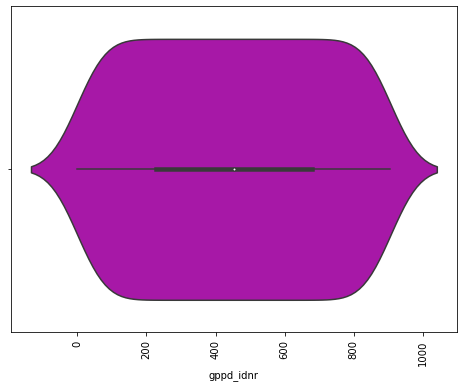



The Violinplot for attribute "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


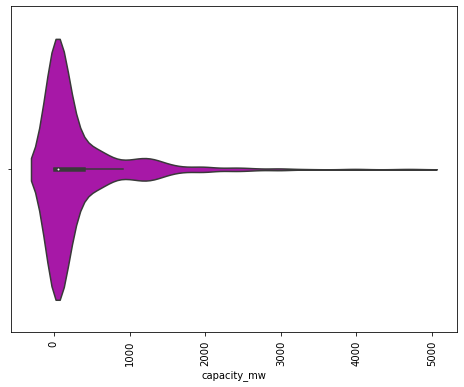



The Violinplot for attribute "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


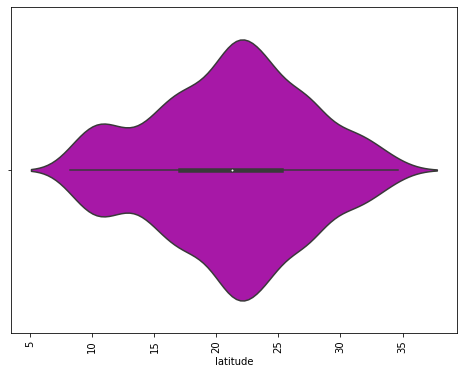



The Violinplot for attribute "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


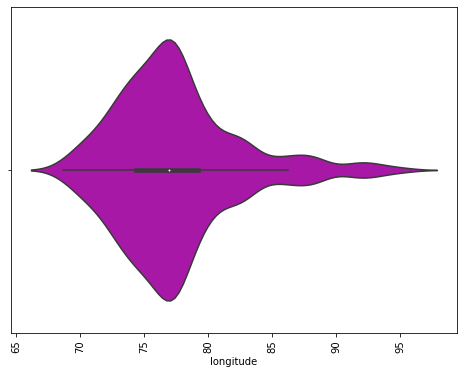



The Violinplot for attribute "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


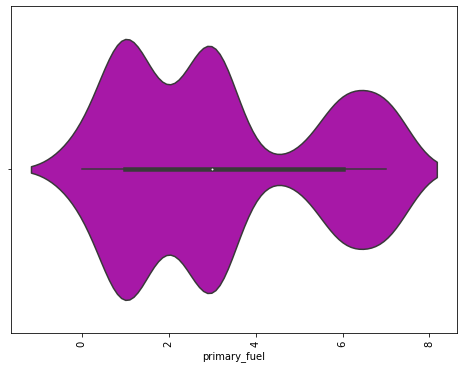



The Violinplot for attribute "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


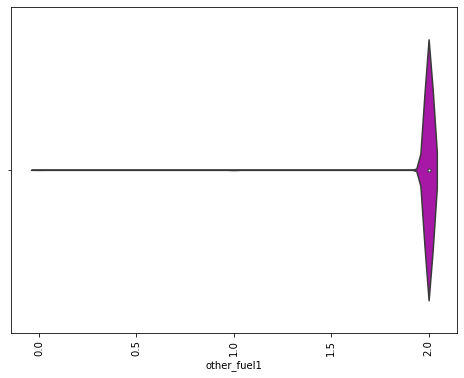



The Violinplot for attribute "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


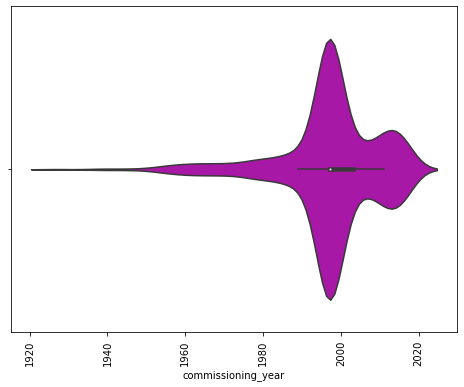



The Violinplot for attribute "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


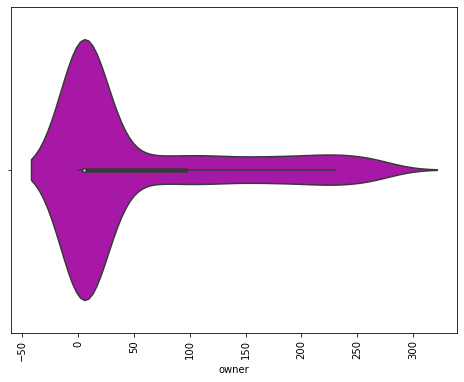



The Violinplot for attribute "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


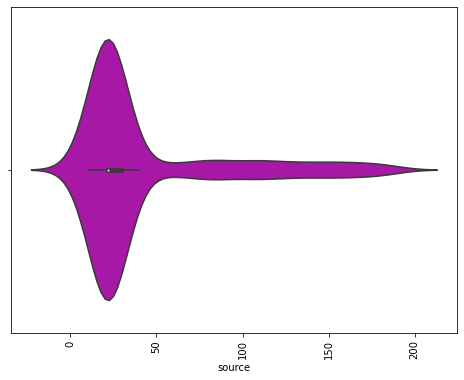



The Violinplot for attribute "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


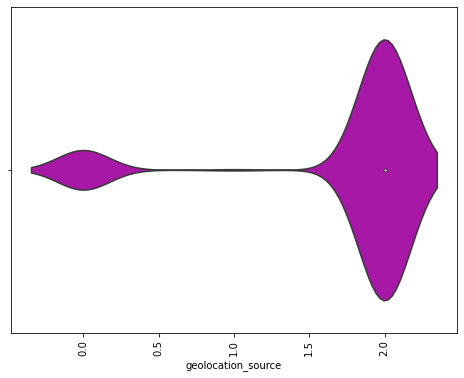



The Violinplot for attribute "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


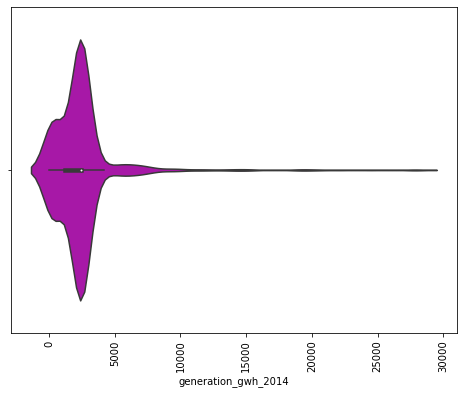



The Violinplot for attribute "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


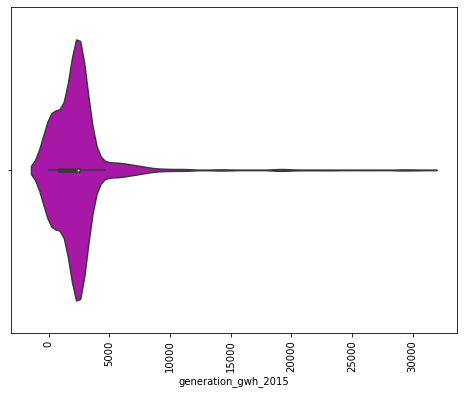



The Violinplot for attribute "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


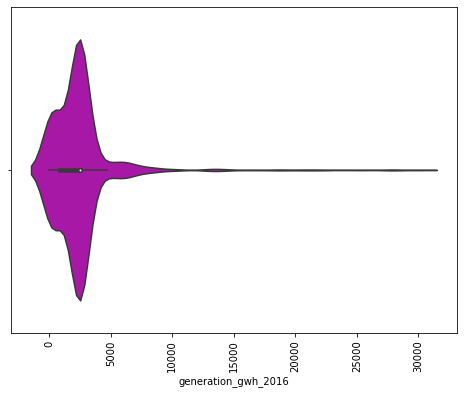



The Violinplot for attribute "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


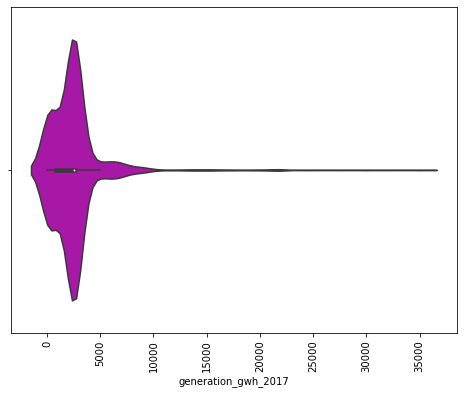



The Violinplot for attribute "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


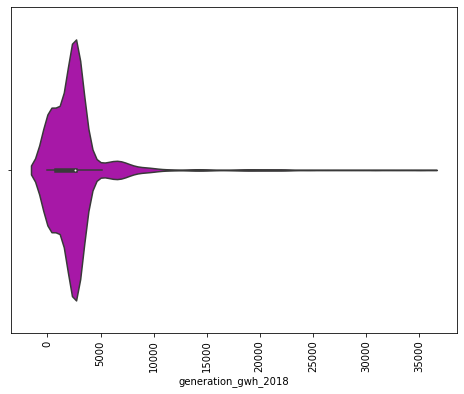

In [38]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    print(f'The Violinplot for attribute "{i}" is-\n {sns.violinplot(df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### Violin plot basically indicates that what is the width of datapoints having most frequency.
As we can see in this plot we can say that most of the power plants are producing capacity approx to 0 mw.

Most of the power plants are having longitude and latitude range (75-80) and 20-25 respectively.

In Year 1990 the electricity production was higher as compare to other years.

###### Descriptive Statistics

In [39]:
df.describe().T

count         mean          std        min          25%  \
gppd_idnr            907.0   453.000000   261.972645     0.0000   226.500000   
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     3.206174     2.280652     0.0000     1.000000   
other_fuel1          907.0     1.995590     0.081259     0.0000     2.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
owner                907.0    56.169791    82.529116     0.0000     5.000000   
source               907.0    43.847850    44.642818     0.0000    22.000000   
geolocation_source   907.0     1.733186     0.677151     0.0000     2.000000   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
gppd_idnr             453.000000   679.500000    906.000  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            3.000000     6.000000      7.000  
other_fuel1             2.000000     2.000000      2.000  
commissioning_year   1997.091082  2003.000000   2018.000  
owner                   5.000000    95.500000    279.000  
source                 22.000000    29.500000    190.000  
geolocation_source      2.000000     2.000000      2.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

###### As we can see in the above chart all the attributes has less median than their respective mean,which indicated that data might skewed right hand side and also the interquartile difference for generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019 are varying too much hence there might be possibility that outliers are present in the data set.

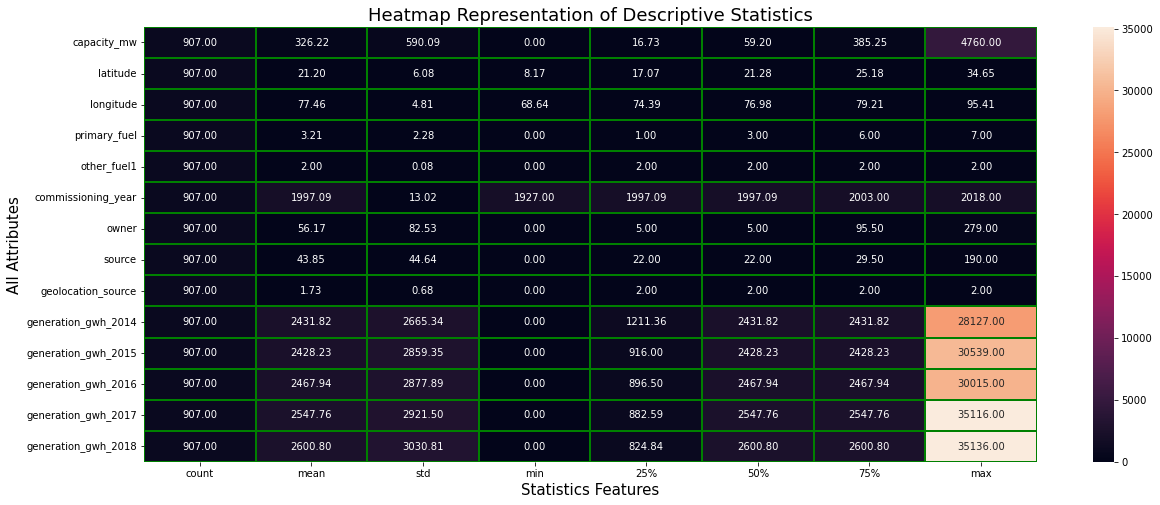

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe().T[1:],annot=True,linewidth=0.2,linecolor='GREEN',fmt='0.2f')
plt.xlabel('Statistics Features',fontsize=15)
plt.ylabel('All Attributes',fontsize=15)
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=18)
plt.show()

###### Correlation

In [41]:
df.corr().capacity_mw.sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
owner                 -0.311048
source                -0.242122
other_fuel1            0.003105
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

#### See, there are 4 attributes having negative values and its showing us that there is negative correlation b/w capacity_mw (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

The attributes those are giving negative correlation are---primary_fuel,gppd_idnr,owner,source which all are either target variable or categorical one hence will not remove any of these negative correlated columns.

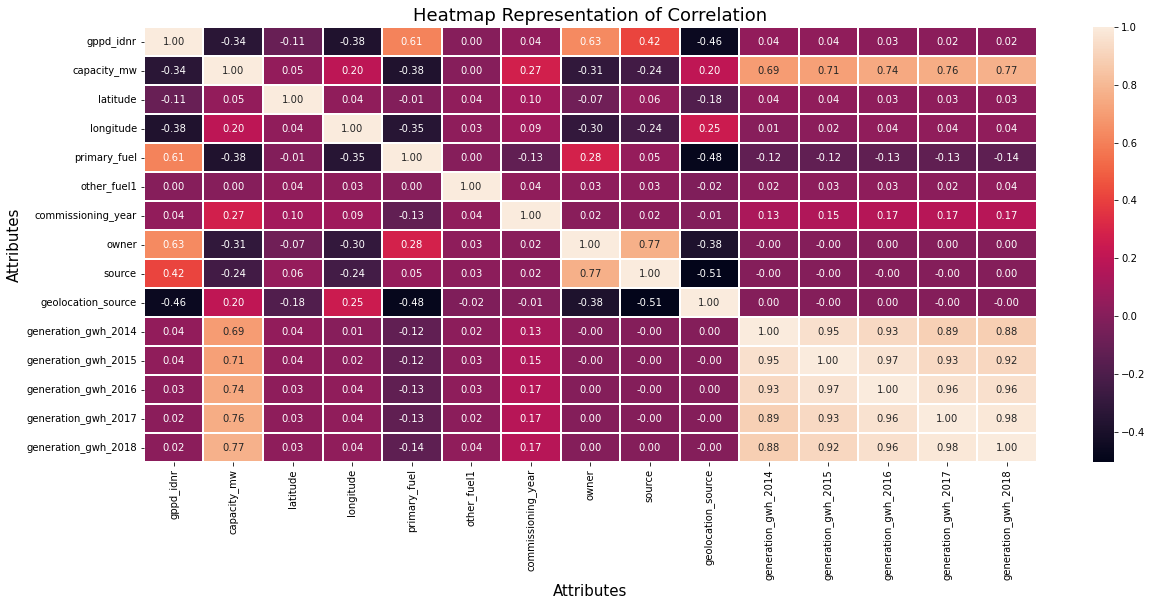

In [42]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()

###### Multicollinearity

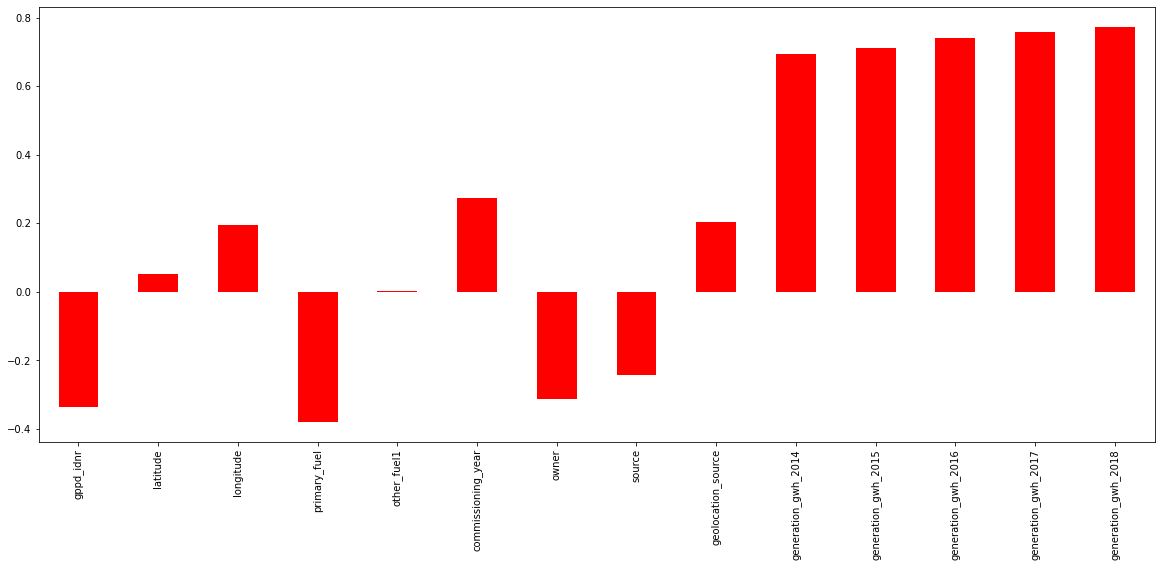

In [43]:
plt.figure(figsize=(20,8))
df.corr().capacity_mw.drop(['capacity_mw']).plot(kind='bar',color='red')
plt.show()

###### I'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

###### Skewness

In [44]:
df.skew().sort_values()

other_fuel1           -20.453120
geolocation_source     -2.159841
commissioning_year     -1.399359
latitude               -0.149698
gppd_idnr               0.000000
primary_fuel            0.472251
longitude               1.141881
owner                   1.364406
source                  1.827373
capacity_mw             3.123576
generation_gwh_2018     4.937907
generation_gwh_2014     5.035446
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2015     5.364134
dtype: float64

###### The threshold value of Skewness is +/=0.5. Attributes- latitude,gppd_idnr,primary_fuel are only in the range while others are either skewed right or left. will remove skewness from thses columns later on in data cleansing part,also will not touch target column and categorical columns for removing the skewness.
Categorical and Target Column = source,owner,primary_fuel,gppd_idnr,geolocation_source,other_fuel1

###### Distribution Plot

The Distribution Plot for attribute gppd_idnr is-
 AxesSubplot(0.125,0.125;0.775x0.755)




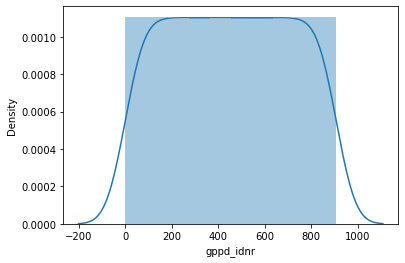

The Distribution Plot for attribute capacity_mw is-
 AxesSubplot(0.125,0.125;0.775x0.755)




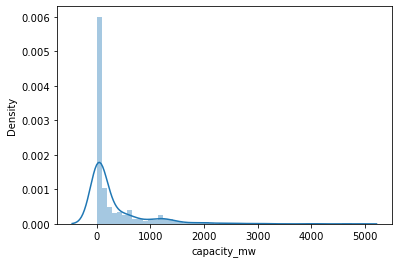

The Distribution Plot for attribute latitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




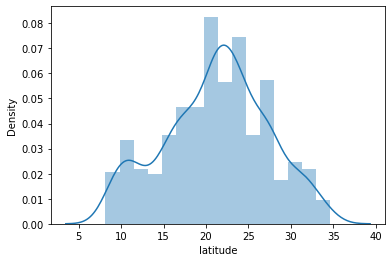

The Distribution Plot for attribute longitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




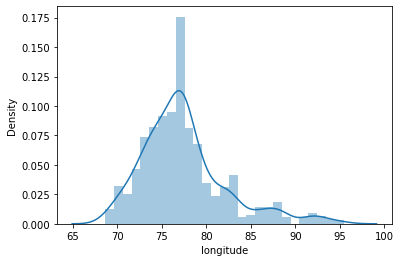

The Distribution Plot for attribute primary_fuel is-
 AxesSubplot(0.125,0.125;0.775x0.755)




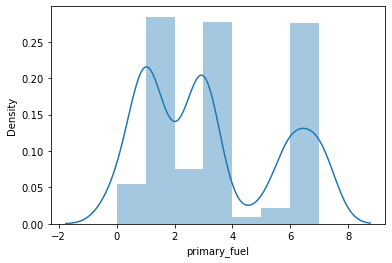

The Distribution Plot for attribute other_fuel1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




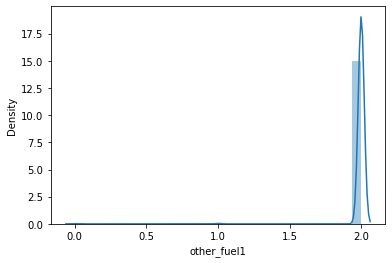

The Distribution Plot for attribute commissioning_year is-
 AxesSubplot(0.125,0.125;0.775x0.755)




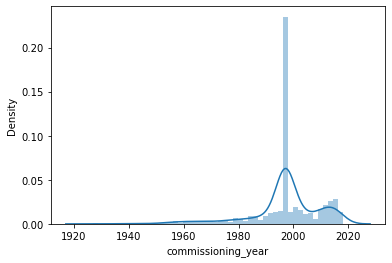

The Distribution Plot for attribute owner is-
 AxesSubplot(0.125,0.125;0.775x0.755)




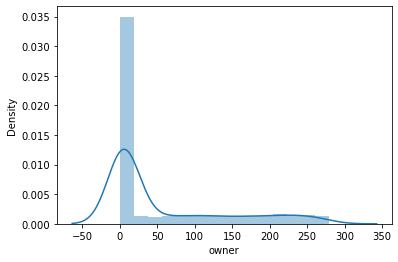

The Distribution Plot for attribute source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




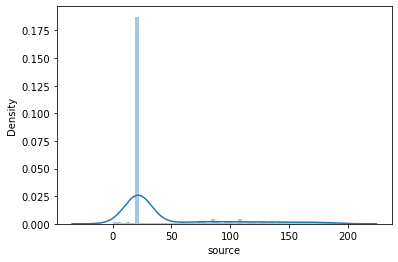

The Distribution Plot for attribute geolocation_source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




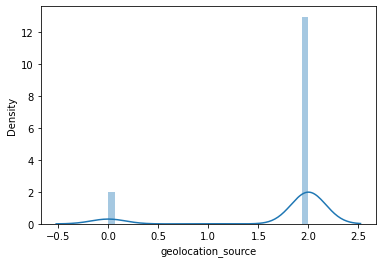

The Distribution Plot for attribute generation_gwh_2014 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




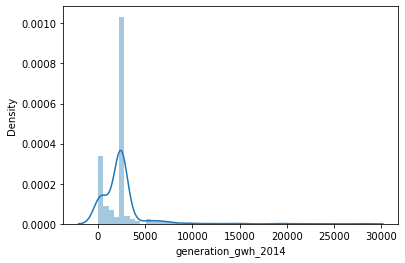

The Distribution Plot for attribute generation_gwh_2015 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




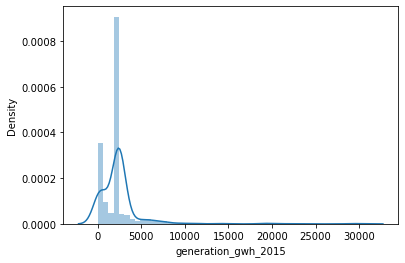

The Distribution Plot for attribute generation_gwh_2016 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




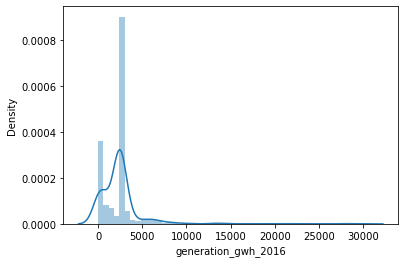

The Distribution Plot for attribute generation_gwh_2017 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




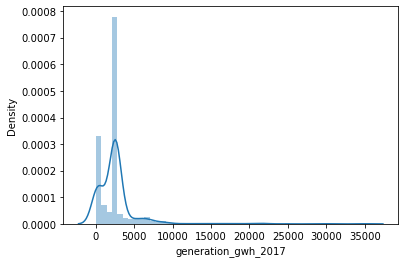

The Distribution Plot for attribute generation_gwh_2018 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




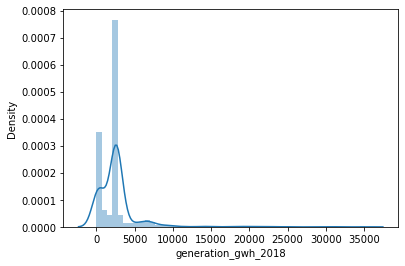

In [45]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    print('\n')
    plt.show()

##### As we can see in the above distribution plots all of the attributes are skewed both right ad left hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

##### Outliers

In [46]:
z=np.abs(zscore(df))
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
        621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
        657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
        808, 808, 808, 808, 811, 813, 817, 818, 832, 847, 848, 870, 871,
        879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 1, 11, 12, 13, 14,  8,  8,  1, 10, 11, 12, 13, 14,  1, 10,  3,  3,
         8,  1, 10, 11, 12, 13, 14,  6,  3,  8,  1, 1

In [47]:
z.iloc[15,1]

3.906294028602196

In [48]:
z.iloc[895,8]

3.0963182120153383

###### Boxplot to check the outliers

The Box Plot for attribute gppd_idnr is-
 AxesSubplot(0.125,0.125;0.775x0.755)




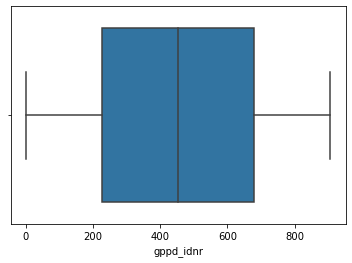

The Box Plot for attribute capacity_mw is-
 AxesSubplot(0.125,0.125;0.775x0.755)




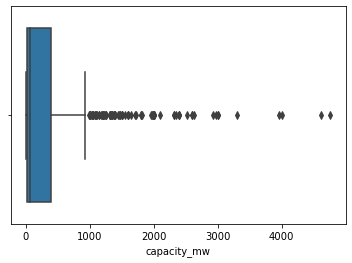

The Box Plot for attribute latitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




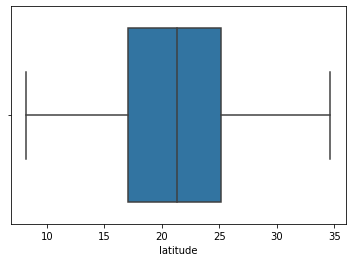

The Box Plot for attribute longitude is-
 AxesSubplot(0.125,0.125;0.775x0.755)




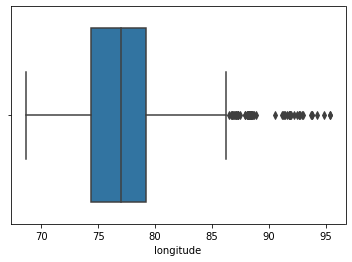

The Box Plot for attribute primary_fuel is-
 AxesSubplot(0.125,0.125;0.775x0.755)




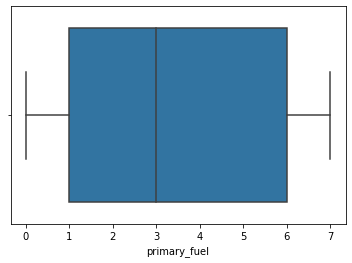

The Box Plot for attribute other_fuel1 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




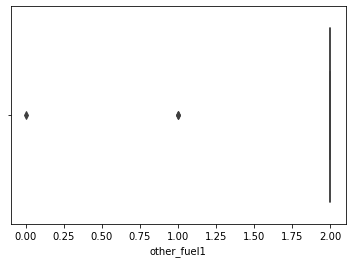

The Box Plot for attribute commissioning_year is-
 AxesSubplot(0.125,0.125;0.775x0.755)




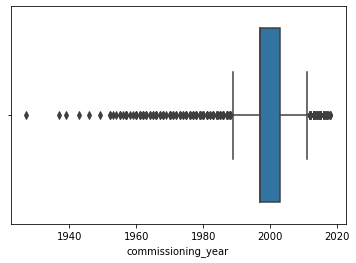

The Box Plot for attribute owner is-
 AxesSubplot(0.125,0.125;0.775x0.755)




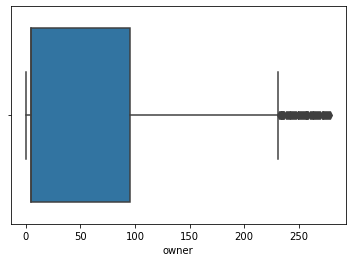

The Box Plot for attribute source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




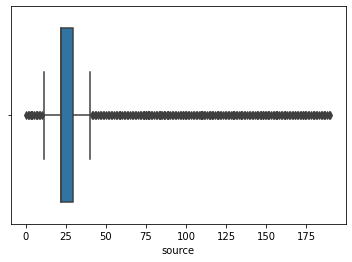

The Box Plot for attribute geolocation_source is-
 AxesSubplot(0.125,0.125;0.775x0.755)




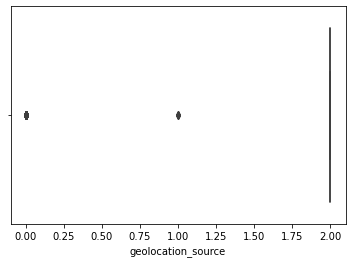

The Box Plot for attribute generation_gwh_2014 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




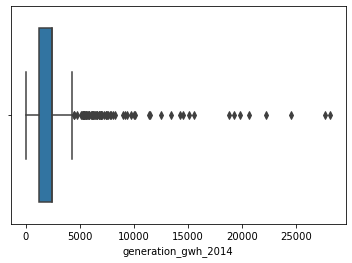

The Box Plot for attribute generation_gwh_2015 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




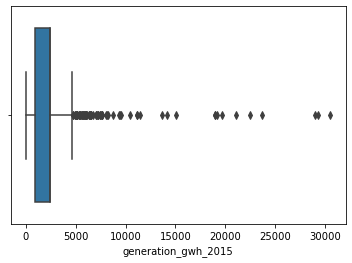

The Box Plot for attribute generation_gwh_2016 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




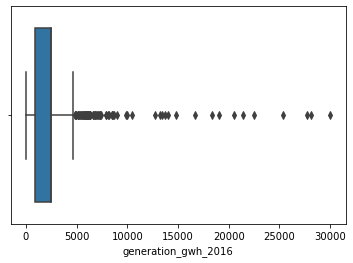

The Box Plot for attribute generation_gwh_2017 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




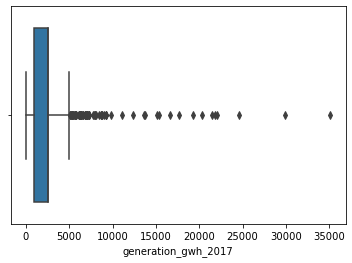

The Box Plot for attribute generation_gwh_2018 is-
 AxesSubplot(0.125,0.125;0.775x0.755)




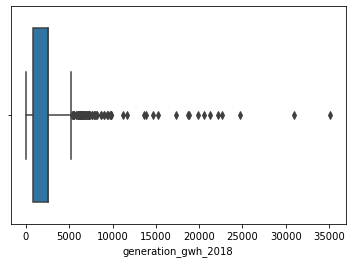

In [49]:
for i in df.columns:
    print(f'The Box Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    print('\n')
    plt.show()

###### Data Cleansing
1. Remove Negative Correlation
Since only categorical columns are having negative correlation hence will not remove those for the same.

Removing Multicollinearity

In [50]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
x=df.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839    73.2407             6            2   
1          519   24.7663    74.6090             1            2   
2          853   21.9038    69.3732             7            2   
3            0   23.8712    91.3602             2            2   
4            1   21.9603    82.4091             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949    77.3568             1            2   
903        822   12.8932    78.1654             6            2   
904        891   15.2758    75.5811             7            2   
905        539   24.3500    73.7477             1            2   
906        876    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            2547.759305          2600.804099  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903          2547.759305          2600.804099  
904          2547.759305          2600.804099  
905          2547.759305          2600.804099  
906          2547.759305          2600.804099  

[907 rows x 14 columns]

In [52]:
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,v) for v in range(x.shape[1])]
    print(df1)

In [53]:
vif()

               Features  Variance_Inflation_Factor
0             gppd_idnr                  10.723425
1              latitude                  14.568644
2             longitude                 323.168578
3          primary_fuel                   7.100004
4           other_fuel1                 604.095744
5    commissioning_year                 973.108996
6                 owner                   5.513191
7                source                   7.443360
8    geolocation_source                  15.964370
9   generation_gwh_2014                  20.428131
10  generation_gwh_2015                  45.082788
11  generation_gwh_2016                  57.901837
12  generation_gwh_2017                  65.410822
13  generation_gwh_2018                  53.019706


##### See,from the above we can see that there are two variables those are sharing the equal amount of information to the target variable (generation_gwh_2018 & generation_gwh_2017) and i'm removing 'generation_gwh_2017' as it has less correlation score as comapre to other one.Also there are some columns those are sharing the same information towards target column but those are categorical hence will not drop those.

In [54]:
df2=df.drop(['generation_gwh_2017'],axis=1)
df2

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839    73.2407             6            2   
1          519         98.0   24.7663    74.6090             1            2   
2          853         39.2   21.9038    69.3732             7            2   
3            0        135.0   23.8712    91.3602             2            2   
4            1       1800.0   21.9603    82.4091             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949    77.3568             1            2   
903        822          3.0   12.8932    78.1654             6            2   
904        891         25.5   15.2758    75.5811             7            2   
905        539         80.0   24.3500    73.7477             1            2   
906        876         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[907 rows x 14 columns]

###### Removing outliers

In [55]:
df3=df2[(z<3).all(axis=1)]
df3

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839    73.2407             6            2   
1          519         98.0   24.7663    74.6090             1            2   
2          853         39.2   21.9038    69.3732             7            2   
3            0        135.0   23.8712    91.3602             2            2   
4            1       1800.0   21.9603    82.4091             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949    77.3568             1            2   
903        822          3.0   12.8932    78.1654             6            2   
904        891         25.5   15.2758    75.5811             7            2   
905        539         80.0   24.3500    73.7477             1            2   
906        876         16.5    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[831 rows x 14 columns]

In [56]:
print(df2.shape)
print(df3.shape)

(907, 14)
(831, 14)


In [57]:
percentage_loss=(907-831)*100/907
percentage_loss

8.379272326350607

###### I'm getting the percentage loss is about 8% which is decent because our dataset is large having 907 rows and out of it we are loosing only 8% rows.Now we can move ahead by considering it

###### Removing Skewness

###### Using power_transorm method

In [58]:
from sklearn.preprocessing import power_transform

In [59]:
x=df3.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839    73.2407             6            2   
1          519   24.7663    74.6090             1            2   
2          853   21.9038    69.3732             7            2   
3            0   23.8712    91.3602             2            2   
4            1   21.9603    82.4091             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949    77.3568             1            2   
903        822   12.8932    78.1654             6            2   
904        891   15.2758    75.5811             7            2   
905        539   24.3500    73.7477             1            2   
906        876    9.9344    77.4768             7            2   

     commissioning_year  owner  source  geolocation_source  \
0           2011.000000    229     109                   1   
1           1997.091082    258     174                   2   
2           1997.091082      2      21                   2   
3           2004.000000      5      22                   2   
4           2015.000000      5      22                   2   
..                  ...    ...     ...                 ...   
902         2016.000000      5      22                   2   
903         1997.091082    114      77                   0   
904         1997.091082      5      21                   2   
905         1997.091082     91      59                   2   
906         1997.091082    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902          2431.823590             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2018  
0            2600.804099  
1            2600.804099  
2            2600.804099  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903          2600.804099  
904          2600.804099  
905          2600.804099  
906          2600.804099  

[831 rows x 13 columns]

In [60]:
x=power_transform(x)
x

array([[ 0.75488224,  1.15757565, -0.93159852, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 0.29899613,  0.59065259, -0.51578406, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 1.35958446,  0.11978205, -2.35129261, ...,  0.35781174,
         0.36060402,  0.376212  ],
       ...,
       [ 1.47217222, -0.95395687, -0.24337349, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 0.36695645,  0.52193742, -0.77288457, ...,  0.35781174,
         0.36060402,  0.376212  ],
       [ 1.42789016, -1.7976091 ,  0.23885204, ...,  0.35781174,
         0.36060402,  0.376212  ]])

###### Square root method

In [61]:
z=['commissioning_year','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2016','generation_gwh_2015']
for g in z:
    df3[g]=np.sqrt(df3[g])

In [62]:
df3.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.848757
generation_gwh_2014   -0.468238
generation_gwh_2015   -0.433498
generation_gwh_2018   -0.397178
generation_gwh_2016   -0.388923
latitude              -0.116001
gppd_idnr             -0.052788
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.814455
owner                  1.316648
source                 1.778820
capacity_mw            1.951101
dtype: float64

###### As,we can see that skewness is fully removed now in numerical columns and our data is almost normally distributed but going forward will need to transform this data in the range b/w 0 & 1 and also we have to attain the mean=0 and standard deviation =+/-1 for this will use Standard Scaler techinque

###### Using standard scaler

In [63]:
df3

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          657          2.5   28.1839   8.558078             6            2   
1          519         98.0   24.7663   8.637650             1            2   
2          853         39.2   21.9038   8.329058             7            2   
3            0        135.0   23.8712   9.558253             2            2   
4            1       1800.0   21.9603   9.077946             1            2   
..         ...          ...       ...        ...           ...          ...   
902        491       1600.0   16.2949   8.795271             1            2   
903        822          3.0   12.8932   8.841120             6            2   
904        891         25.5   15.2758   8.693739             7            2   
905        539         80.0   24.3500   8.587648             1            2   
906        876         16.5    9.9344   8.802091             7            2   

     commissioning_year  owner  source  geolocation_source  \
0             44.844175    229     109                   1   
1             44.688825    258     174                   2   
2             44.688825      2      21                   2   
3             44.766059      5      22                   2   
4             44.888751      5      22                   2   
..                  ...    ...     ...                 ...   
902           44.899889      5      22                   2   
903           44.688825    114      77                   0   
904           44.688825      5      21                   2   
905           44.688825     91      59                   2   
906           44.688825    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              49.313523            49.277043            49.678334   
1              49.313523            49.277043            49.678334   
2              49.313523            49.277043            49.678334   
3              24.855367            29.047323            29.765827   
4              55.095826            76.917943            79.012657   
..                   ...                  ...                  ...   
902            49.313523             0.997434            15.283869   
903            49.313523            49.277043            49.678334   
904            49.313523            49.277043            49.678334   
905            49.313523            49.277043            49.678334   
906            49.313523            49.277043            49.678334   

     generation_gwh_2018  
0              50.998079  
1              50.998079  
2              50.998079  
3              25.024770  
4              85.317056  
..                   ...  
902            26.201145  
903            50.998079  
904            50.998079  
905            50.998079  
906            50.998079  

[831 rows x 14 columns]

In [64]:
x=df3.drop(['capacity_mw'],axis=1)
x

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0          657   28.1839   8.558078             6            2   
1          519   24.7663   8.637650             1            2   
2          853   21.9038   8.329058             7            2   
3            0   23.8712   9.558253             2            2   
4            1   21.9603   9.077946             1            2   
..         ...       ...        ...           ...          ...   
902        491   16.2949   8.795271             1            2   
903        822   12.8932   8.841120             6            2   
904        891   15.2758   8.693739             7            2   
905        539   24.3500   8.587648             1            2   
906        876    9.9344   8.802091             7            2   

     commissioning_year  owner  source  geolocation_source  \
0             44.844175    229     109                   1   
1             44.688825    258     174                   2   
2             44.688825      2      21                   2   
3             44.766059      5      22                   2   
4             44.888751      5      22                   2   
..                  ...    ...     ...                 ...   
902           44.899889      5      22                   2   
903           44.688825    114      77                   0   
904           44.688825      5      21                   2   
905           44.688825     91      59                   2   
906           44.688825    279      21                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0              49.313523            49.277043            49.678334   
1              49.313523            49.277043            49.678334   
2              49.313523            49.277043            49.678334   
3              24.855367            29.047323            29.765827   
4              55.095826            76.917943            79.012657   
..                   ...                  ...                  ...   
902            49.313523             0.997434            15.283869   
903            49.313523            49.277043            49.678334   
904            49.313523            49.277043            49.678334   
905            49.313523            49.277043            49.678334   
906            49.313523            49.277043            49.678334   

     generation_gwh_2018  
0              50.998079  
1              50.998079  
2              50.998079  
3              25.024770  
4              85.317056  
..                   ...  
902            26.201145  
903            50.998079  
904            50.998079  
905            50.998079  
906            50.998079  

[831 rows x 13 columns]

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
x=sc.fit_transform(x)
x

array([[ 0.74018501,  1.15213456, -0.89757004, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 0.22114078,  0.59548469, -0.56990524, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 1.47737828,  0.12924807, -1.84063879, ...,  0.36884618,
         0.36804173,  0.37979853],
       ...,
       [ 1.6203035 , -0.95030346, -0.33894002, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 0.29636458,  0.52767882, -0.77580542, ...,  0.36884618,
         0.36804173,  0.37979853],
       [ 1.56388565, -1.82029691,  0.10723381, ...,  0.36884618,
         0.36804173,  0.37979853]])

In [67]:
x.mean()

-2.109660117514136e-15

In [68]:
x.std()

0.9607689228305228

<AxesSubplot:ylabel='Density'>

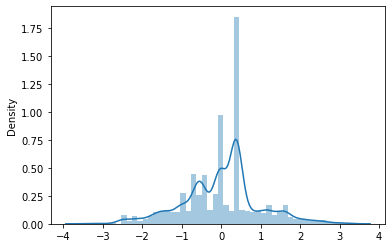

In [69]:
sns.distplot(x)

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

###### Principal Component Analysis PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=4)

In [72]:
x_pca=pca.fit_transform(x)
x_pca

array([[-2.54069652, -1.78608185, -1.6409015 , -0.21528202],
       [-2.00999663, -1.03264174, -2.09789072,  2.13609493],
       [-1.25975909, -0.67479503,  1.71500915, -1.45231883],
       ...,
       [-1.0143125 , -0.31505903,  1.97706565, -0.40519434],
       [-0.78134356,  0.35332064, -0.43338076,  0.26836794],
       [-1.89224077, -1.29865807,  1.77886398,  1.64612453]])

In [73]:
x=x_pca
x

array([[-2.54069652, -1.78608185, -1.6409015 , -0.21528202],
       [-2.00999663, -1.03264174, -2.09789072,  2.13609493],
       [-1.25975909, -0.67479503,  1.71500915, -1.45231883],
       ...,
       [-1.0143125 , -0.31505903,  1.97706565, -0.40519434],
       [-0.78134356,  0.35332064, -0.43338076,  0.26836794],
       [-1.89224077, -1.29865807,  1.77886398,  1.64612453]])

In [74]:
y=df3['capacity_mw']
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 831, dtype: float64

In [75]:
x.shape

(831, 4)

In [76]:
y.shape

(831,)

###### Plotting relationship between Principal components

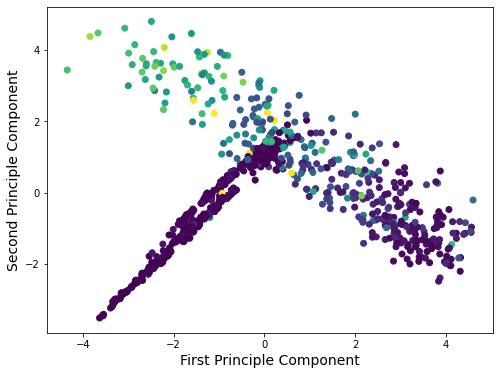

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

###### Training_Testing Phase
I am going to train 80% of the data and testing size would be 20%
first will try to find out the best value for random_state

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr=LinearRegression()

In [79]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.006967956775396411
Testing Accuracy is -0.6122453955402734

The Mean Absolute Error is (MAE)- 253.6670028370093
The Mean Squared Error is (MSE)- 129028.7007921302
The Root Mean Squared Error is (RMSE)- 359.2056525058176


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.28758943795919745
Testing Accuracy is -0.0679469189048778

The Mean Absolute Error is (MAE)- 235.4739850866664
The Mean Squared Error is (MSE)- 95836.09359595244
The Root Mean Squared Error is (RMSE)- 309.5740518776605


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.08837877714125963
Testing Accuracy is -0.2866855494606779

The Mean Absolute Error is (MAE)- 226.0672905706279
The Mean Squared Error is (MSE)- 103838.07354112317
The Root Mean Squared Error is (RMSE)- 322.2391558161782


At Random_State 3 the trai

###### Drawing Linear Regression Line

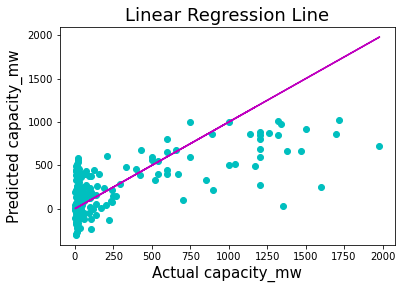

In [80]:
plt.scatter(y_test,test_pred,color='c')
plt.plot(y_test,y_test,color='m')
plt.xlabel("Actual capacity_mw",fontsize=15)
plt.ylabel("Predicted capacity_mw",fontsize=15)
plt.title("Linear Regression Line",fontsize=18)
plt.show()

###### As we can clearly see that the above line is not containg much points at all as there is distribution happening and it's happening in both left and right side of line ergo this can't be the best fitted line of the model. Hence this model is not working good for predicting the same.

###### Finding out the CV Score

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
for n in range(2,12):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score of Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score of Linear Regression Model is 42.432500811087756 and Standard Deviation is 0.03414423501470687


At K-Fold 3 The CV Score of Linear Regression Model is 42.53402490044207 and Standard Deviation is 0.03977052652911646


At K-Fold 4 The CV Score of Linear Regression Model is 43.369749498468614 and Standard Deviation is 0.047477315320985425


At K-Fold 5 The CV Score of Linear Regression Model is 44.34102381352668 and Standard Deviation is 0.038667810120515095


At K-Fold 6 The CV Score of Linear Regression Model is 43.75366442449664 and Standard Deviation is 0.05435507342455513


At K-Fold 7 The CV Score of Linear Regression Model is 41.41763474264473 and Standard Deviation is 0.13060264354651924


At K-Fold 8 The CV Score of Linear Regression Model is 42.89757422094372 and Standard Deviation is 0.10490884112754101


At K-Fold 9 The CV Score of Linear Regression Model is 41.925133803765725 and Standard Deviation is 0.09476331463664954


At K-Fold 10 The CV Score o

In [83]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
sgd=SGDRegressor()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [84]:
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,12):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')
    print('\n\t')
    plt.scatter(y_test,test_pred,color='c')
    plt.plot(y_test,y_test,color='m')
    plt.xlabel("Actual capacity_mw",fontsize=15)
    plt.ylabel("Predicted capacity_mw",fontsize=15)
    plt.title("Linear Regression Line",fontsize=18)
    plt.show()

Training Accuracy of model Lasso() is -0.16631389532956886
Testing Accuracy of model Lasso() is -0.32061830777775513

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 231.09310558447197
The Mean Squared Error is (MSE)- 102530.56231509885
The Root Mean Squared Error is (RMSE)- 320.2039386314585


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is 42.46997942384475 & std is 0.03340452745597455


At K-Fold 3 the CV Score of model Lasso() is 42.56813446979659 & std is 0.03943041702290999


At K-Fold 4 the CV Score of model Lasso() is 43.38875060077352 & std is 0.046956648885712285


At K-Fold 5 the CV Score of model Lasso() is 44.36153976856165 & std is 0.03837146806652613


At K-Fold 6 the CV Score of model Lasso() is 43.77292273228049 & std is 0.05424434941995779


At K-Fold 7 the CV Score of model Lasso() is 41.42545856113027 & std is 0.1303726742680916


At K-Fold 8 the CV Score of model Lasso() is 42.9102721724037 & std is 0.104

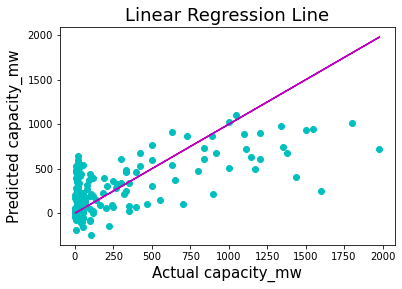

In [85]:
model(ls,x,y)

Training Accuracy of model Ridge() is -0.16101510622378679
Testing Accuracy of model Ridge() is -0.31411113123099144

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 231.3393122230181
The Mean Squared Error is (MSE)- 102561.32774788083
The Root Mean Squared Error is (RMSE)- 320.251975400435


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is 42.4382062778527 & std is 0.033978182412827185


At K-Fold 3 the CV Score of model Ridge() is 42.5393984799999 & std is 0.039633401197540455


At K-Fold 4 the CV Score of model Ridge() is 43.37340306630705 & std is 0.047373827426149775


At K-Fold 5 the CV Score of model Ridge() is 44.344362333625234 & std is 0.03862015677886862


At K-Fold 6 the CV Score of model Ridge() is 43.75653336318379 & std is 0.054294544943338324


At K-Fold 7 the CV Score of model Ridge() is 41.42171993753055 & std is 0.13048931741123593


At K-Fold 8 the CV Score of model Ridge() is 42.90128552065764 & std is 0.1

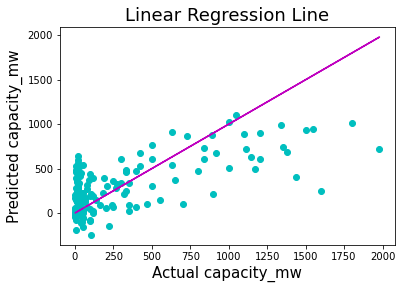

In [86]:
model(rd,x,y)

Training Accuracy of model ElasticNet() is -0.7256822498673634
Testing Accuracy of model ElasticNet() is -0.9724549844134016

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 231.66367364426867
The Mean Squared Error is (MSE)- 105726.8679307237
The Root Mean Squared Error is (RMSE)- 325.1566821252851


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is 41.90005202825227 & std is 0.009421749331052442


At K-Fold 3 the CV Score of model ElasticNet() is 42.178210673093226 & std is 0.012485650864036805


At K-Fold 4 the CV Score of model ElasticNet() is 42.74868893023136 & std is 0.02415857447312074


At K-Fold 5 the CV Score of model ElasticNet() is 43.7067070634916 & std is 0.033004364713134615


At K-Fold 6 the CV Score of model ElasticNet() is 43.05757184290016 & std is 0.04055197283241553


At K-Fold 7 the CV Score of model ElasticNet() is 41.06389700285506 & std is 0.09960180764467079


At K-Fold 8 the CV Score of model El

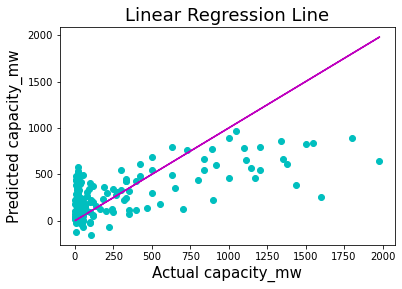

In [87]:
model(en,x,y)

Training Accuracy of model SGDRegressor() is -0.18866882090877435
Testing Accuracy of model SGDRegressor() is -0.343778681193347

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 229.34777599544128
The Mean Squared Error is (MSE)- 101261.48602299973
The Root Mean Squared Error is (RMSE)- 318.2160995660021


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is 42.30151318918923 & std is 0.033822804630519177


At K-Fold 3 the CV Score of model SGDRegressor() is 42.42505207408023 & std is 0.04246932902043512


At K-Fold 4 the CV Score of model SGDRegressor() is 43.33023196593668 & std is 0.04998453866647912


At K-Fold 5 the CV Score of model SGDRegressor() is 44.55469837951128 & std is 0.03928044224944071


At K-Fold 6 the CV Score of model SGDRegressor() is 43.90431592970785 & std is 0.05540566234626082


At K-Fold 7 the CV Score of model SGDRegressor() is 40.941679877234755 & std is 0.13808933531393042


At K-Fold 8 the CV S

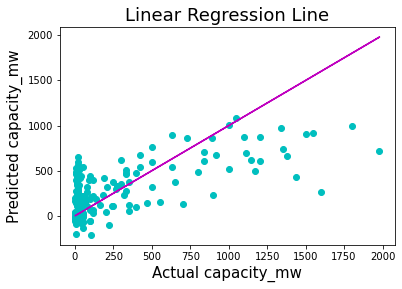

In [88]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9381161020976766
Testing Accuracy of model RandomForestRegressor() is 0.585613139616898

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 133.64219742514973
The Mean Squared Error is (MSE)- 58223.5284298904
The Root Mean Squared Error is (RMSE)- 241.29552094867074


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is 57.97771555129787 & std is 0.03900020464955839


At K-Fold 3 the CV Score of model RandomForestRegressor() is 61.53763838197729 & std is 0.027886751992581792


At K-Fold 4 the CV Score of model RandomForestRegressor() is 63.11661046439039 & std is 0.04034781104437566


At K-Fold 5 the CV Score of model RandomForestRegressor() is 66.42370742471094 & std is 0.06420575695864353


At K-Fold 6 the CV Score of model RandomForestRegressor() is 65.53465196479124 & std is 0.06134124419944639


At K-Fold 7 the CV Score of model RandomForestRegressor() is 63

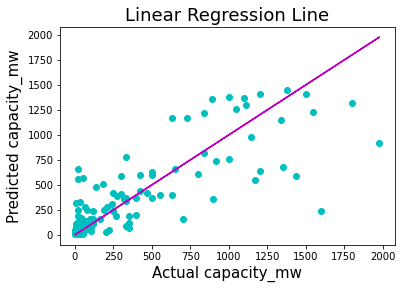

In [89]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.4312581970999748
Testing Accuracy of model AdaBoostRegressor() is 0.2531520296948728

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 217.5731379321277
The Mean Squared Error is (MSE)- 88403.58596161513
The Root Mean Squared Error is (RMSE)- 297.32740533226183


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 30.70981510698808 & std is 0.22453230510540023


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 34.49914772846266 & std is 0.25953952582008283


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 32.685421409979334 & std is 0.1720383770256585


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 40.08112484917188 & std is 0.18467618747864453


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 35.16203448151511 & std is 0.18849027300333368


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 44.14681948262147 & std is 0.14669

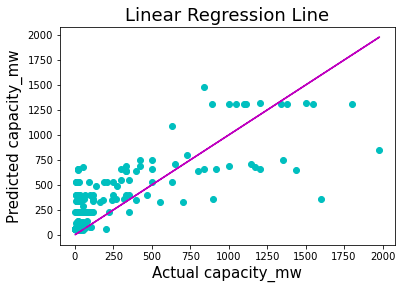

In [90]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.8502930184891364
Testing Accuracy of model GradientBoostingRegressor() is 0.529610659597947

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 145.065842324854
The Mean Squared Error is (MSE)- 63247.33102674764
The Root Mean Squared Error is (RMSE)- 251.49022053898565


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is 52.00266708957191 & std is 0.024662997851212343


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 53.911077539251785 & std is 0.016406901310244464


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 56.320397804635746 & std is 0.07496633403802508


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is 59.389818946478655 & std is 0.0940558501449357


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is 62.47580508847119 & std is 0.055919408087693946


At K-Fold 7 the CV Score of mode

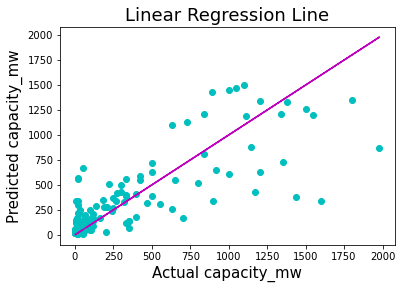

In [91]:
model(grd,x,y)

###### Hyper Parameter tunning

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive'],'loss':['squared_error']}

In [94]:
def HPT(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [95]:
HPT(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 10, 'selection': 'cyclic'}


In [96]:
HPT(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'saga'}


In [97]:
HPT(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.1, 'selection': 'random'}


In [98]:
HPT(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.0001, 'learning_rate': 'constant', 'loss': 'squared_error', 'penalty': 'elasticnet'}


In [99]:
HPT(rf,dict_rf)

The best Parameters of the model RandomForestRegressor() are {'criterion': 'absolute_error', 'max_features': 'log2'}


In [100]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [101]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'friedman_mse', 'loss': 'huber', 'max_features': 'sqrt'}


In [102]:
ls=Lasso(alpha=10,selection='cyclic')
rd=Ridge(alpha=10,solver='saga')
en=ElasticNet(alpha=0.1,selection='random')
rf=RandomForestRegressor(criterion='poisson',max_features='log2')
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='squared_error',loss='huber',max_features='log2')
sgd=SGDRegressor(alpha=0.01,learning_rate='optimal',penalty='l2',loss='squared_error')

Training Accuracy of model Lasso(alpha=10) is -0.22993000075023295
Testing Accuracy of model Lasso(alpha=10) is -0.398233117349964

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 229.6932483829902
The Mean Squared Error is (MSE)- 102498.94300653941
The Root Mean Squared Error is (RMSE)- 320.1545611209364


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=10) is 42.67849684839875 & std is 0.026687707230208635


At K-Fold 3 the CV Score of model Lasso(alpha=10) is 42.76398661325285 & std is 0.03601730231600838


At K-Fold 4 the CV Score of model Lasso(alpha=10) is 43.46815233108631 & std is 0.042205431804833396


At K-Fold 5 the CV Score of model Lasso(alpha=10) is 44.42082408198889 & std is 0.03594450066139798


At K-Fold 6 the CV Score of model Lasso(alpha=10) is 43.816683033871456 & std is 0.053531122209130276


At K-Fold 7 the CV Score of model Lasso(alpha=10) is 41.42537302980807 & std is 0.12862979089818047


At K-Fold 8

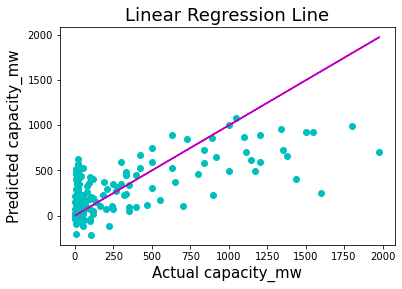

In [103]:
model(ls,x,y)

Training Accuracy of model Ridge(alpha=10, solver='saga') is -0.1737743272497363
Testing Accuracy of model Ridge(alpha=10, solver='saga') is -0.3291943406460578

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 231.14763043587683
The Mean Squared Error is (MSE)- 102592.20697125806
The Root Mean Squared Error is (RMSE)- 320.30018259635455


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='saga') is 42.47823069033993 & std is 0.03239471224151458


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='saga') is 42.589669070592116 & std is 0.0383475822483753


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='saga') is 43.402472389401744 & std is 0.04643968258304016


At K-Fold 5 the CV Score of model Ridge(alpha=10, solver='saga') is 44.345470762088844 & std is 0.03834423431753115


At K-Fold 6 the CV Score of model Ridge(alpha=10, solver='saga') is 43.78234915145401 & std is 0.053797807673430884


At K-Fo

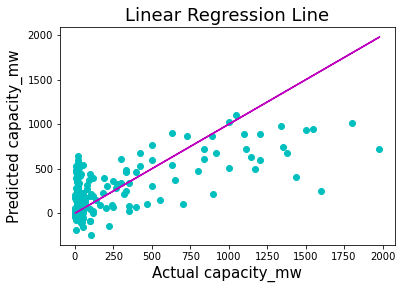

In [104]:
model(rd,x,y)

Training Accuracy of model ElasticNet(alpha=0.1, selection='random') is -0.2081984051312855
Testing Accuracy of model ElasticNet(alpha=0.1, selection='random') is -0.36954822937225273

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 230.71776652616165
The Mean Squared Error is (MSE)- 102693.61026256032
The Root Mean Squared Error is (RMSE)- 320.4584376523114


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 42.52919909107584 & std is 0.03078261510236424


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 42.65930182436526 & std is 0.03608588309481049


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 43.46006782958713 & std is 0.044341219769277095


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.1, selection='random') is 44.42877328255454 & std is 0.0372146247313556


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.1, selec

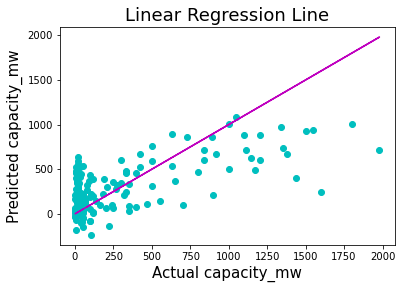

In [105]:
model(en,x,y)

Training Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.2699650467485559
Testing Accuracy of model SGDRegressor(alpha=0.01, learning_rate='optimal') is -0.4112206012811126

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 230.72559526197716
The Mean Squared Error is (MSE)- 102217.02471544016
The Root Mean Squared Error is (RMSE)- 319.71397328775004


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 41.06523591686395 & std is 0.020340780205565456


At K-Fold 3 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 40.925813334675325 & std is 0.053406878961703014


At K-Fold 4 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 41.642285791105685 & std is 0.0666317062190754


At K-Fold 5 the CV Score of model SGDRegressor(alpha=0.01, learning_rate='optimal') is 39.579947864862994 & std is 0.06365584170491048


At K-Fold

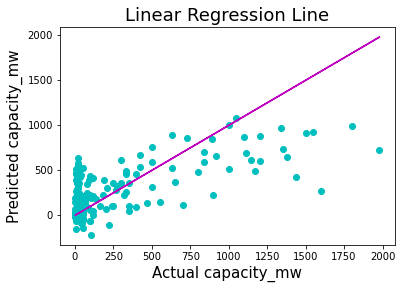

In [106]:
model(sgd,x,y)

Training Accuracy of model RandomForestRegressor(criterion='poisson', max_features='log2') is 0.9331912693759143
Testing Accuracy of model RandomForestRegressor(criterion='poisson', max_features='log2') is 0.526067468899899

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 154.4185435329341
The Mean Squared Error is (MSE)- 66056.59525076396
The Root Mean Squared Error is (RMSE)- 257.01477632767336


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 53.25299652313751 & std is 0.04511587325207134


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 56.162524064367666 & std is 0.043883404507506066


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='poisson', max_features='log2') is 57.96293503505685 & std is 0.053713308112149735


At K-Fold 5 the CV Score of model RandomForestRegressor(criterion='poisson', max_

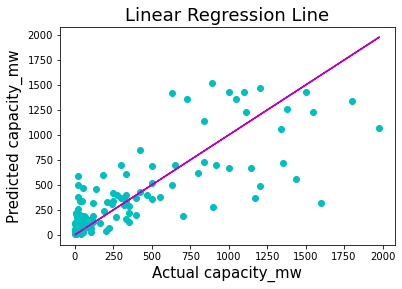

In [107]:
model(rf,x,y)

Training Accuracy of model AdaBoostRegressor() is 0.38865769223557733
Testing Accuracy of model AdaBoostRegressor() is 0.18351457045415032

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 222.6279042080343
The Mean Squared Error is (MSE)- 94845.15864254224
The Root Mean Squared Error is (RMSE)- 307.9694118618637


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is 35.957037164235686 & std is 0.14496475367481026


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 28.602053920061877 & std is 0.2225843328727376


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 37.135617742993084 & std is 0.19021812827310042


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 35.98201705374232 & std is 0.1682434909442218


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 36.27393020150056 & std is 0.09708750068883418


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 37.63621934304408 & std is 0.144

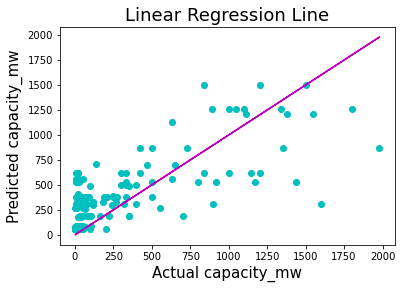

In [108]:
model(ad,x,y)

Training Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 0.6823691659267979
Testing Accuracy of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 0.44692623901392203

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 136.22488783742295
The Mean Squared Error is (MSE)- 63671.13943930652
The Root Mean Squared Error is (RMSE)- 252.33140795253078


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 56.083594716426745 & std is 0.01883953278515671


At K-Fold 3 the CV Score of model GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2') is 57.41465842048093 & std is 0.01646142911984945


At K-Fold 4 the CV Score of mo

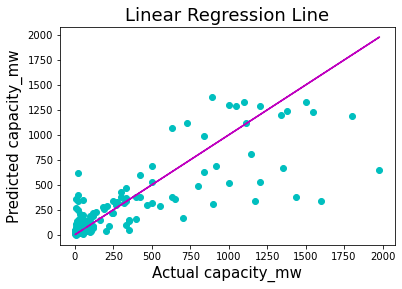

In [109]:
model(grd,x,y)


#### RandomForestRegressor model seems perfect as compare to other models as the RMSE(root mean square error) are less and training,testing accuracy and CV Accuracy is too good as compare to other models.
Root Square Mean indicates- the distance b/w the datapoints of predicted and original target and for better accuracy distance b/w the datapoints needs to be less.

###### Saving the best model

In [110]:
import joblib
file='global.obj'
joblib.dump(rf,file)

['global.obj']

###### Loading the Mode

In [111]:
a=joblib.load('global.obj')
a

RandomForestRegressor(criterion='poisson', max_features='log2')

###### HTML representation is unable to render, please try loading this page with nbviewer.org.

In [112]:
pred=a.predict(x_test)
pred

array([ 366.5815    ,   31.355     ,  155.858     ,  198.705     ,
        167.36386   ,   93.825     , 1447.21      ,  164.32014   ,
         26.227     ,  107.08      ,   57.13      ,   74.923     ,
         96.9965    ,  628.3079    ,   63.0885    , 1473.3       ,
        520.4784    ,   38.9254    ,  187.9385    ,  128.9115    ,
        658.415     ,    4.50033333,  501.075     , 1324.4       ,
         16.3475    ,   72.146     ,  170.998     ,   45.166     ,
         12.966     ,   22.545     , 1523.5       ,   70.278     ,
         21.4152    ,   75.832     ,   28.23      , 1297.012     ,
         56.38      ,   87.5934    ,  259.746     ,   41.828     ,
         68.284     , 1138.15      ,   34.5345    ,   94.956     ,
         40.067     ,   31.783     ,   14.0775    , 1068.455     ,
        175.42942   ,   28.365     , 1053.2       ,   36.548     ,
         15.025     ,  888.52      , 1613.8       ,   38.065     ,
         26.1695    ,   21.863     ,  230.37692   ,  273.28419

In [113]:
accuracy_score=r2_score(pred,y_test)
accuracy_score

0.7489867006431548

<AxesSubplot:ylabel='Density'>

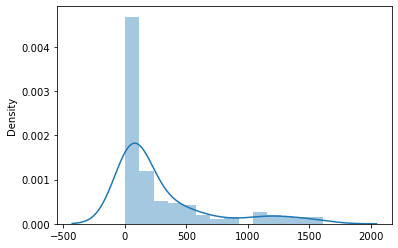

In [114]:
sns.distplot(pred)

Text(0.5, 1.0, 'Linear Regression Line')

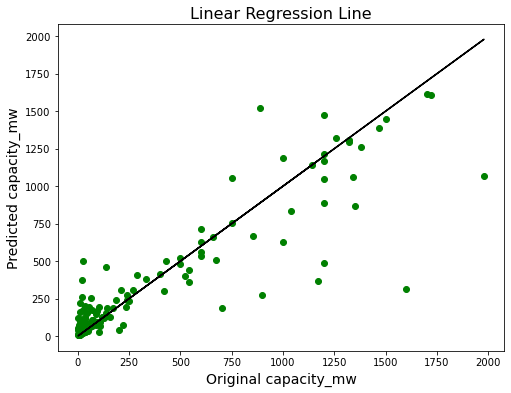

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='GREEN')
plt.plot(y_test,y_test,color='black')
plt.xlabel('Original capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Linear Regression Line',fontsize=16)

###### As,we can see that the distance b/w the datapoints of the predicted capacity and original capacity is not that high which indicates RMSE to be on lower side.which indicates that our model is performing well

###### Conclusion

In [116]:
df=pd.DataFrame(data=([pred,y_test]),index=['Predicted capacity_mw','Original capacity_mw'])
df

0       1        2        3          4       5    \
Predicted capacity_mw   366.5815  31.355  155.858  198.705  167.36386  93.825   
Original capacity_mw   1170.0000  23.100   45.000   35.100   94.20000  20.000   

                           6          7       8       9    ...     157  \
Predicted capacity_mw  1447.21  164.32014  26.227  107.08  ...  1216.3   
Original capacity_mw   1500.00   30.00000  36.300   70.00  ...  1200.0   

                           158      159    160     161     162        163  \
Predicted capacity_mw  31.0887  25.7145  7.442  1609.7  41.152  29.105286   
Original capacity_mw   16.0000  27.6500  6.600  1720.0  20.000  15.000000   

                            164       165     166  
Predicted capacity_mw  668.9822   869.362  14.183  
Original capacity_mw   855.0000  1350.000  11.200  

[2 rows x 167 columns]

###### As our model accuracy is 80% and its prediction is almost same as original one hence Random Forest Regressor is one of the best model among all which have less RMSE, high Training ,Testing and CV score.Also,this model training accuracy is 100% that's why model testing accuracy was 80% as model got lot's of data for the training.

In [117]:
import joblib

In [118]:
file='global_grd.obj'
joblib.dump(grd,file)

['global_grd.obj']

In [119]:
b=joblib.load('global_grd.obj')
b

GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2')

In [120]:
pred=b.predict
pred

<bound method GradientBoostingRegressor.predict of GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          max_features='log2')>

###### Classification Model Building(Taking primary_fuel as Target)

#### EDA

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [123]:
df.shape

(907, 27)

In [124]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [125]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [126]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [127]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [128]:
df.drop(['country','country_long','gppd_idnr','other_fuel2','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)
df.head()


name  capacity_mw  latitude  longitude primary_fuel  \
0          ACME Solar Tower          2.5   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS         98.0   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms         39.2   21.9038    69.3732         Wind   
3               AGARTALA GT        135.0   23.8712    91.3602          Gas   
4              AKALTARA TPP       1800.0   21.9603    82.4091         Coal   

  other_fuel1  commissioning_year                 owner  \
0         NaN              2011.0           Solar Paces   
1         NaN                 NaN  Ultratech Cement ltd   
2         NaN                 NaN                   AES   
3         NaN              2004.0                   NaN   
4         Oil              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

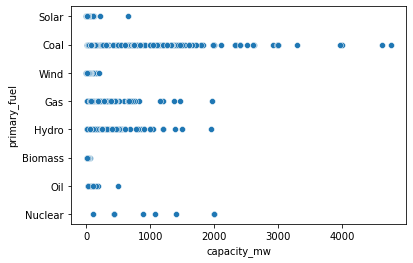

In [137]:
sns.scatterplot(df['capacity_mw'],df['primary_fuel'])

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

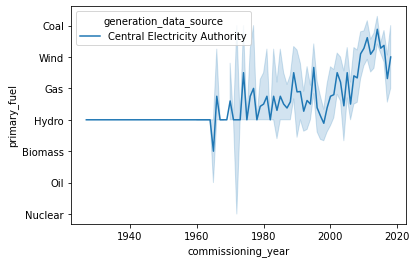

In [139]:
sns.lineplot(df['commissioning_year'],df['primary_fuel'],hue=df['generation_data_source'])

In [142]:
corr['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.347948
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
latitude                 -0.010204
other_fuel1               0.004912
name                      0.040753
source                    0.053613
commissioning_year        0.164947
owner                     0.284296
primary_fuel              1.000000
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [143]:
df.drop(['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)  #dropping the columns as they have no correlation
df.head()

name  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0     0          2.5   28.1839    73.2407             6            2   
1     1         98.0   24.7663    74.6090             1            2   
2     2         39.2   21.9038    69.3732             7            2   
3     3        135.0   23.8712    91.3602             2            2   
4     4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  geolocation_source  generation_gwh_2014  \
0              2011.0    229     109                   1          2431.823590   
1              2015.0    258     174                   2          2431.823590   
2              2015.0      2      21                   2          2431.823590   
3              2004.0      5      22                   2           617.789264   
4              2015.0      5      22                   2          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0          2428.226946          2467.936859          2547.759305   
1          2428.226946          2467.936859          2547.759305   
2          2428.226946          2467.936859          2547.759305   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0          2600.804099  
1          2600.804099  
2          2600.804099  
3           626.239128  
4          7279.000000

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

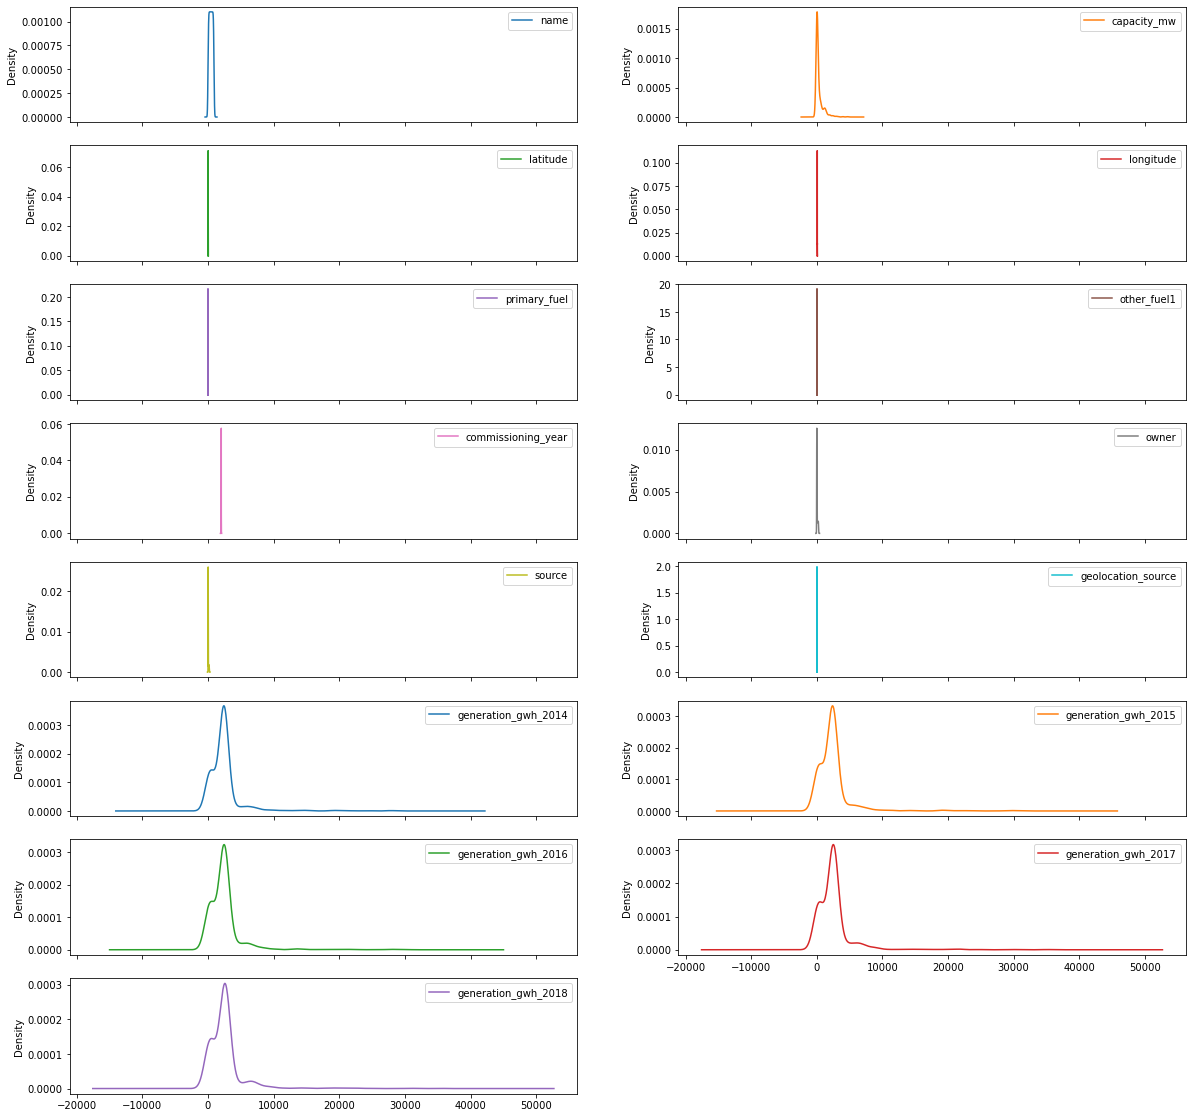

In [144]:
df.plot(kind='kde',subplots=True,layout=(8,2),figsize=(20,20))

##### Plotting Outliers

name                      AxesSubplot(0.125,0.799681;0.352273x0.0803191)
capacity_mw            AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
latitude                  AxesSubplot(0.125,0.703298;0.352273x0.0803191)
longitude              AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
primary_fuel              AxesSubplot(0.125,0.606915;0.352273x0.0803191)
other_fuel1            AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
commissioning_year        AxesSubplot(0.125,0.510532;0.352273x0.0803191)
owner                  AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
source                    AxesSubplot(0.125,0.414149;0.352273x0.0803191)
geolocation_source     AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
generation_gwh_2014       AxesSubplot(0.125,0.317766;0.352273x0.0803191)
generation_gwh_2015    AxesSubplot(0.547727,0.317766;0.352273x0.0803191)
generation_gwh_2016       AxesSubplot(0.125,0.221383;0.352273x0.0803191)
generation_gwh_2017    AxesSubplot(0.547727,0.22138

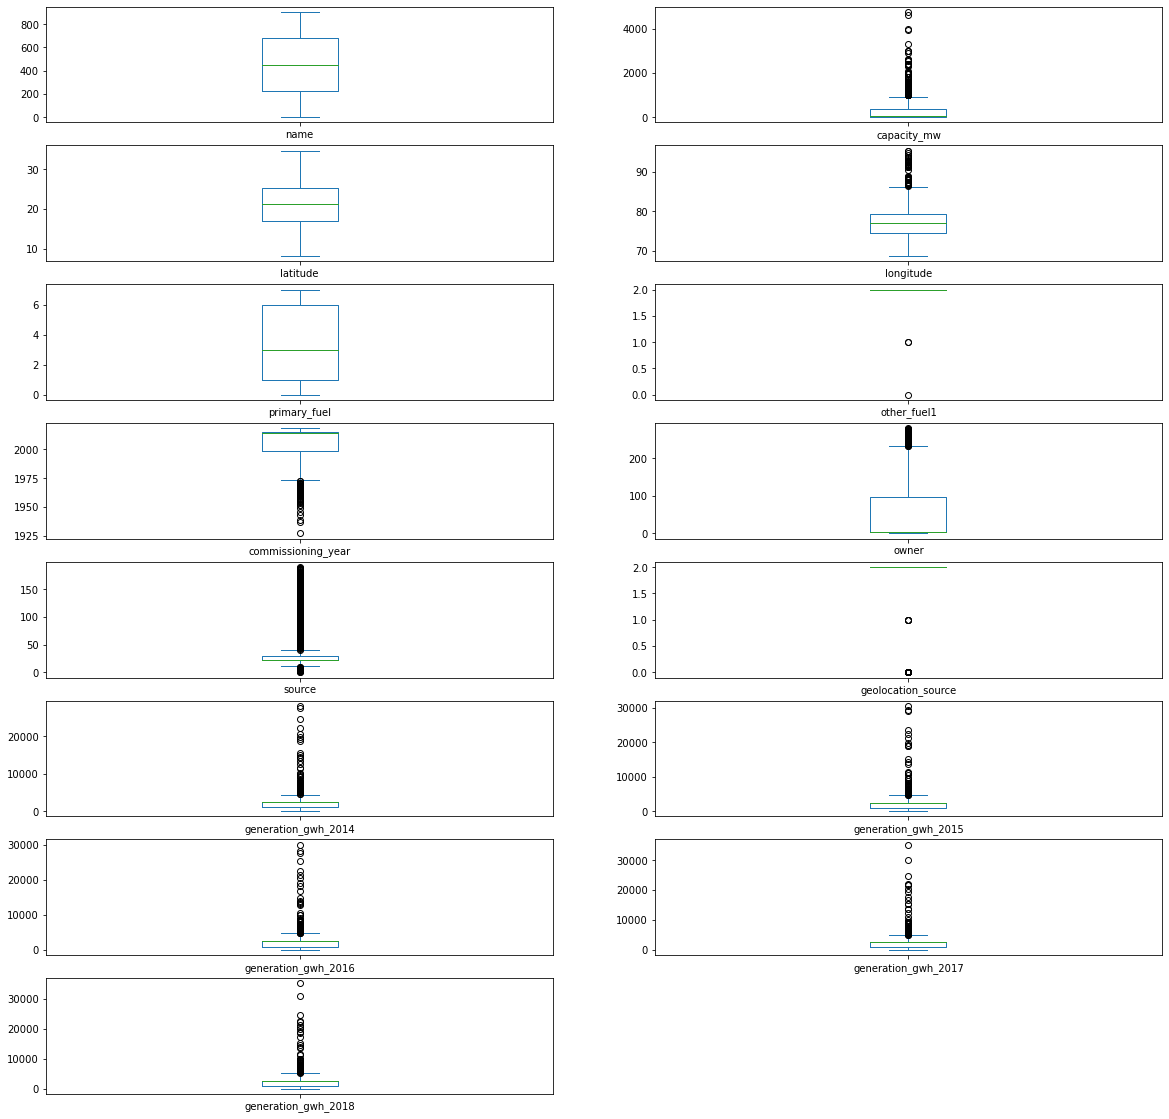

In [145]:
df.plot(kind='box',subplots=True,layout=(8,2),figsize=(20,20))

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [167]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [168]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 907
Columns are 27
Shape is (907, 27)


In [169]:
df.drop(['country','country_long','name','url','year_of_capacity_data','other_fuel2','wepp_id','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source'],axis=1,inplace=True)

The Scatterplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


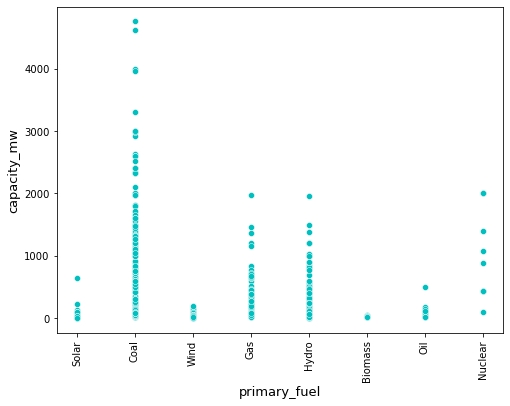



The Scatterplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


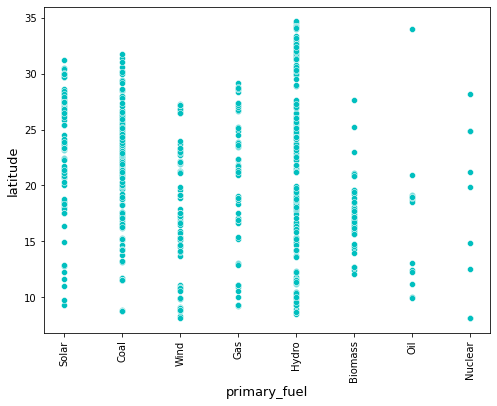



The Scatterplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


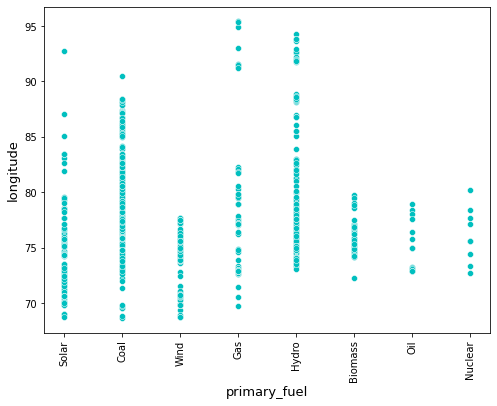



The Scatterplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


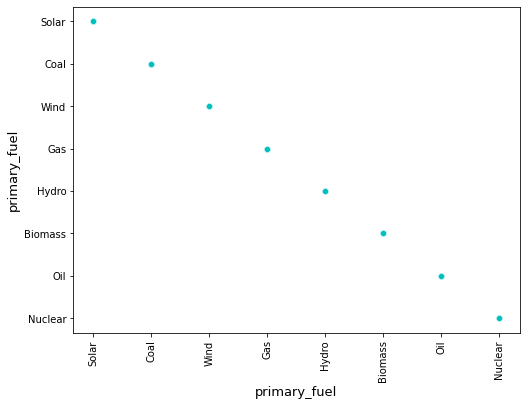



The Scatterplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


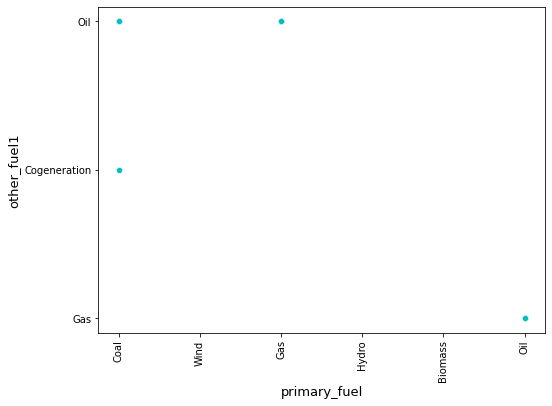



The Scatterplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


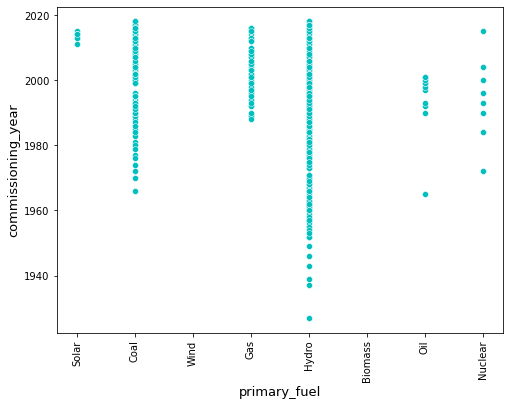



The Scatterplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


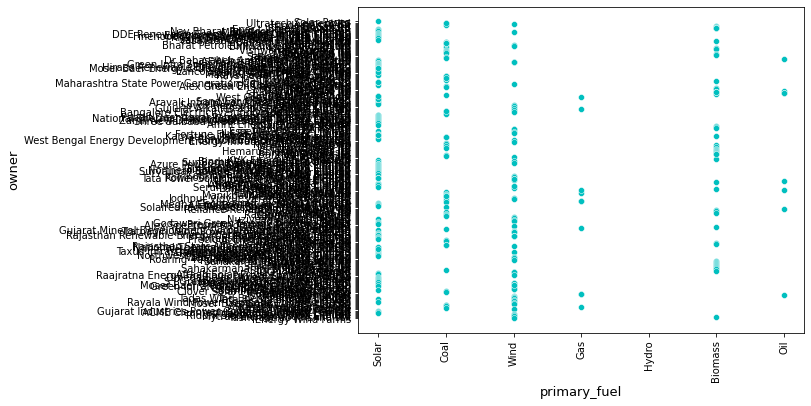



The Scatterplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


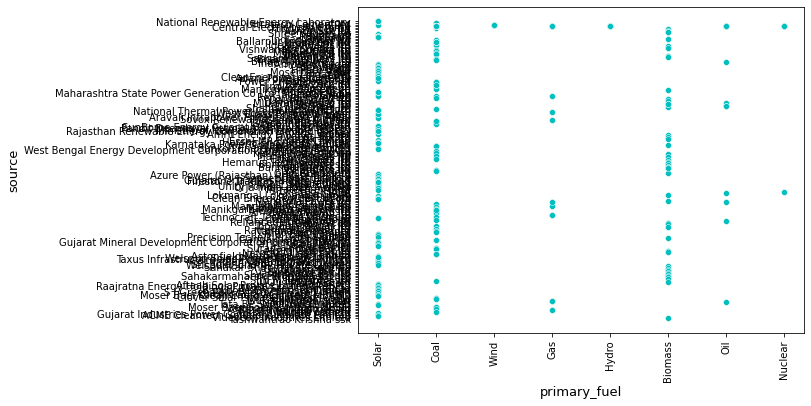



The Scatterplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


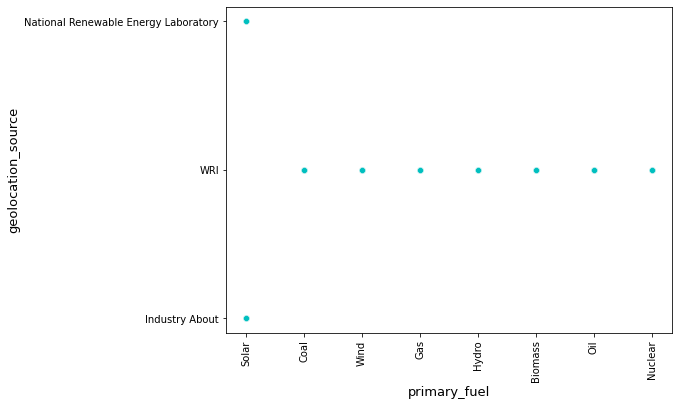



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


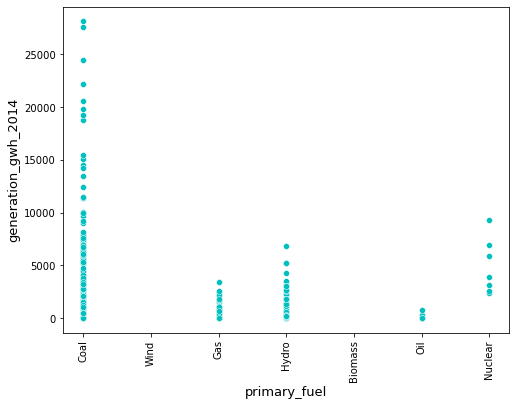



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


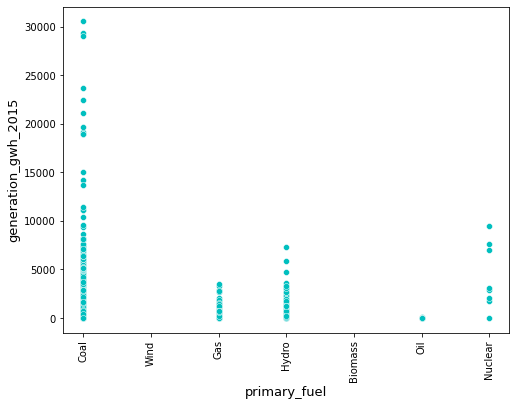



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


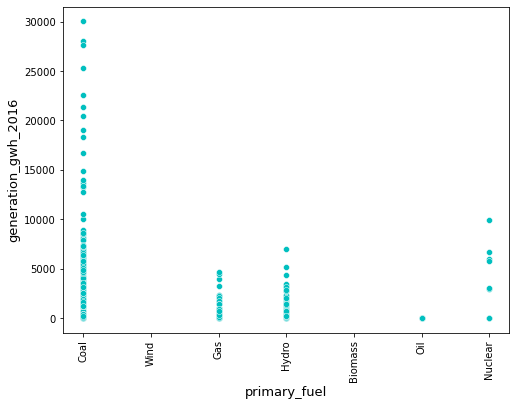



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


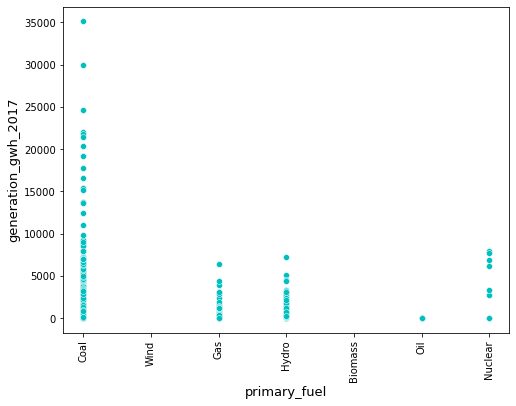



The Scatterplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


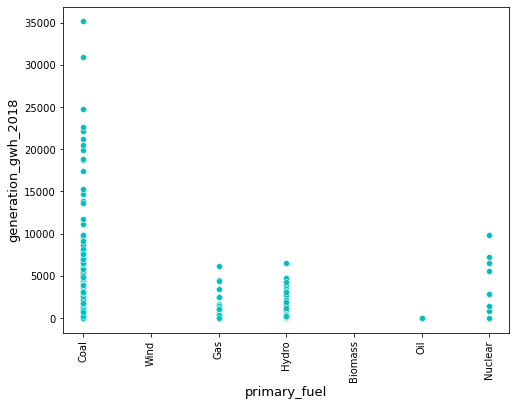

In [170]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Scatterplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.scatterplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

The Lineplot B/w attributes "primary_fuel" & "capacity_mw" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


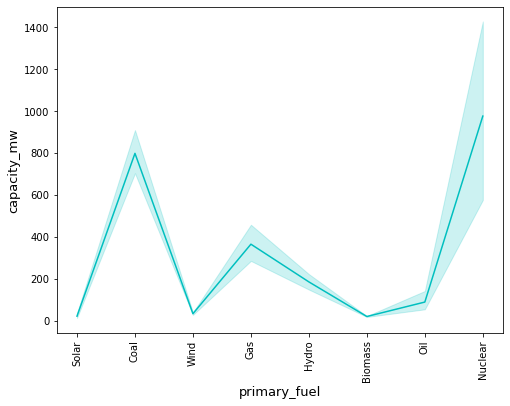



The Lineplot B/w attributes "primary_fuel" & "latitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


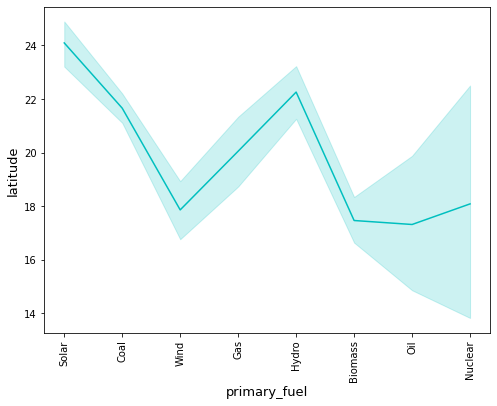



The Lineplot B/w attributes "primary_fuel" & "longitude" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


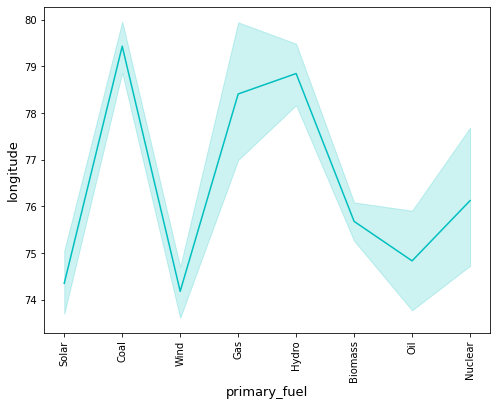



The Lineplot B/w attributes "primary_fuel" & "primary_fuel" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


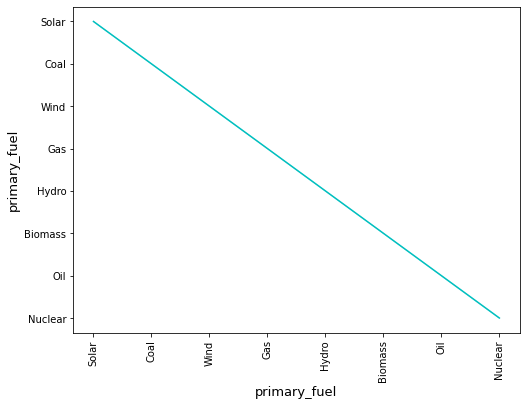



The Lineplot B/w attributes "primary_fuel" & "other_fuel1" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


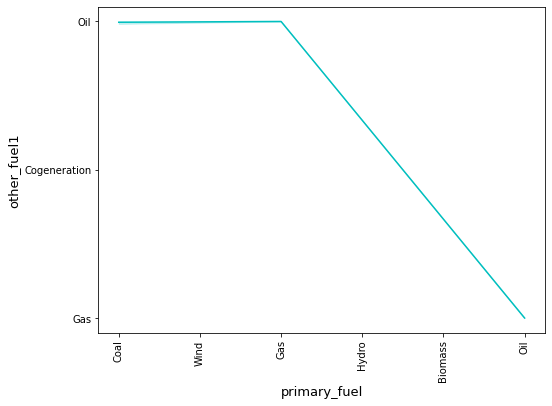



The Lineplot B/w attributes "primary_fuel" & "commissioning_year" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


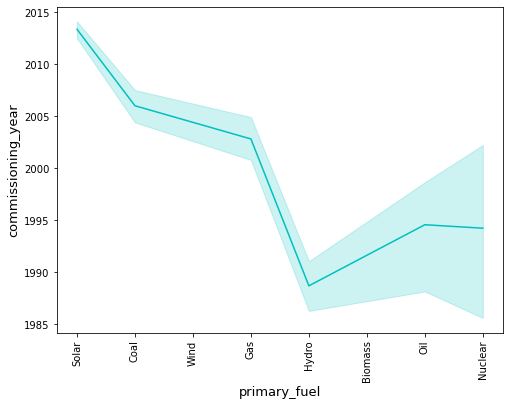



The Lineplot B/w attributes "primary_fuel" & "owner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


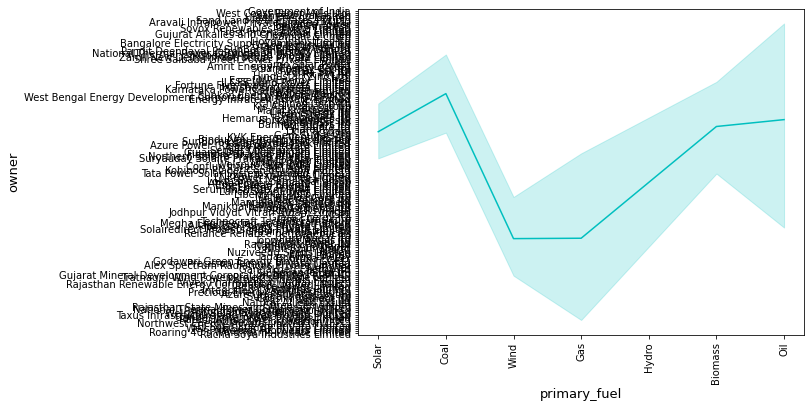



The Lineplot B/w attributes "primary_fuel" & "source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


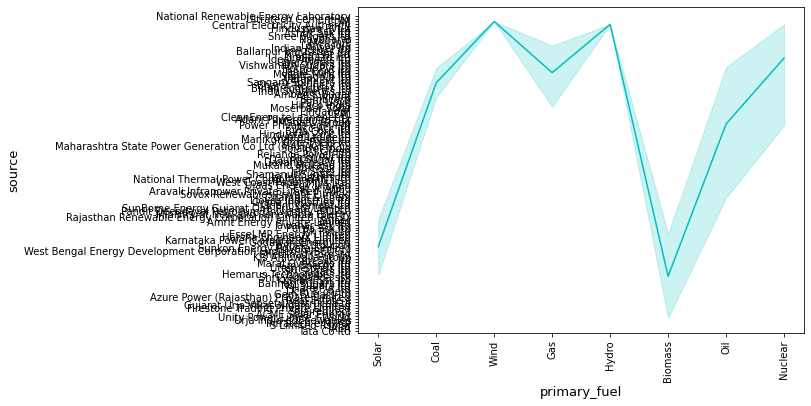



The Lineplot B/w attributes "primary_fuel" & "geolocation_source" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


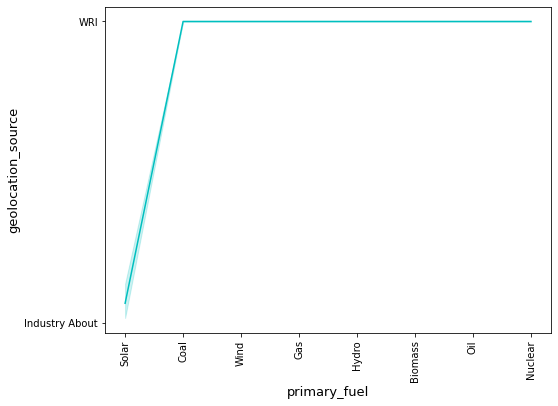



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2014" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


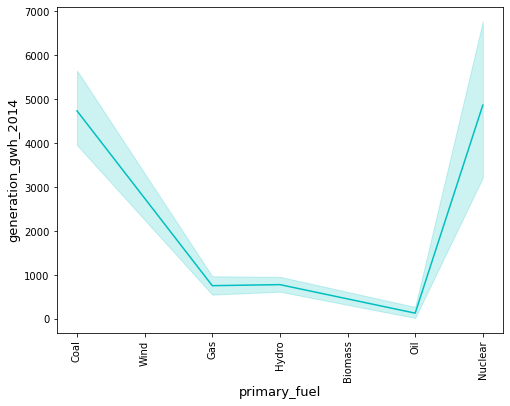



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2015" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


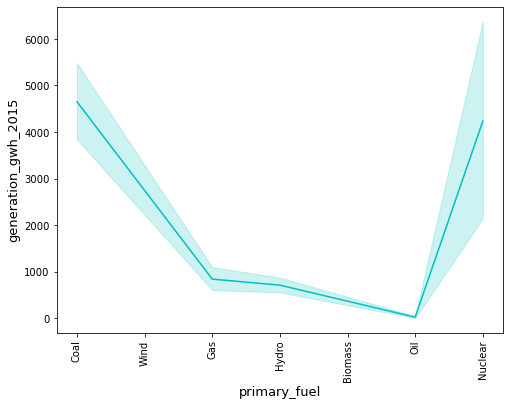



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2016" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


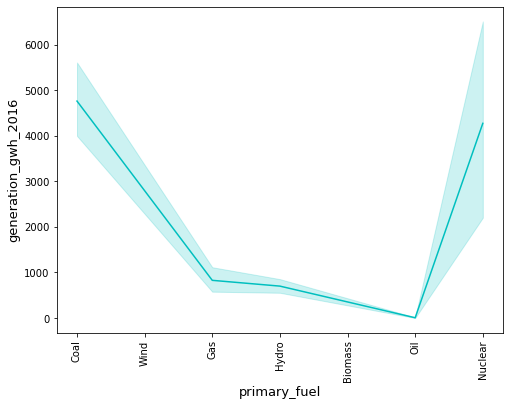



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2017" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


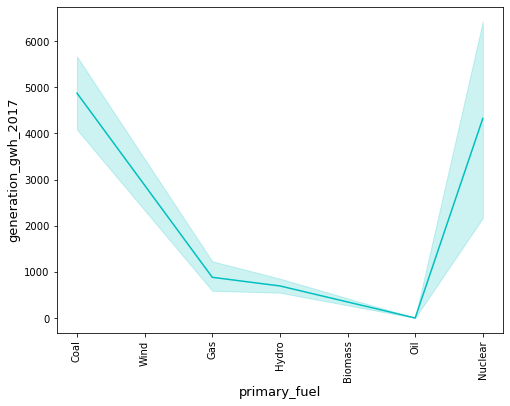



The Lineplot B/w attributes "primary_fuel" & "generation_gwh_2018" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


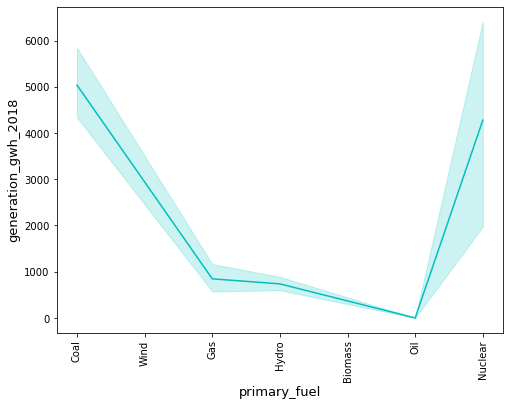

In [171]:
for i in df.columns[1:]:
    plt.figure(figsize=(8,6))
    print(f'The Lineplot B/w attributes "primary_fuel" & "{i}" is-\n {sns.lineplot(df["primary_fuel"],df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}',fontsize=13)
    plt.xlabel("primary_fuel",fontsize=13)
    plt.show()
    print('\n')

In [172]:
from sklearn.preprocessing import LabelEncoder

In [173]:
n=['gppd_idnr','primary_fuel','other_fuel1','owner','source','geolocation_source']
for p in n:
    df[p]=LabelEncoder().fit_transform(df[p].astype(str))

##### Correlation

In [174]:
#I've taken the same dataframe as i did in first part where I did remove all the meaningless attributes.
df.corr().primary_fuel.sort_values()

generation_gwh_2017   -0.421736
generation_gwh_2018   -0.421518
geolocation_source    -0.420263
generation_gwh_2016   -0.408951
generation_gwh_2014   -0.405019
generation_gwh_2015   -0.393335
capacity_mw           -0.380395
longitude             -0.359060
commissioning_year    -0.336501
owner                 -0.260389
latitude              -0.010530
source                 0.053613
other_fuel1            0.476410
gppd_idnr              0.609180
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

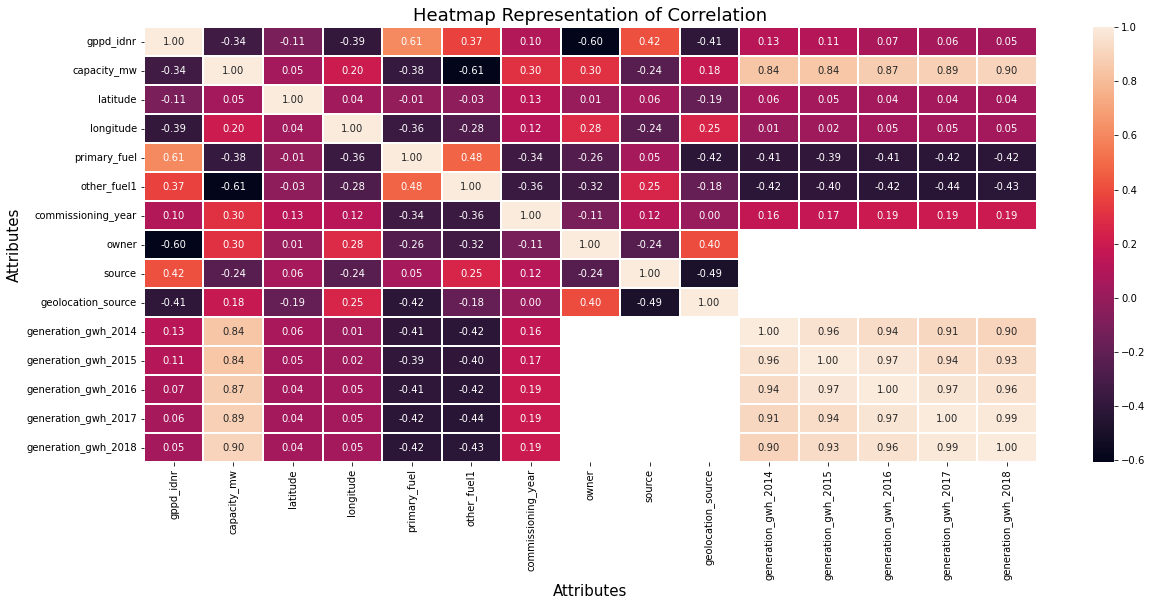

In [175]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='white',fmt='0.2f')
plt.xlabel('Attributes',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.title('Heatmap Representation of Correlation',fontsize=18)
plt.show()


###### Multicollinearity

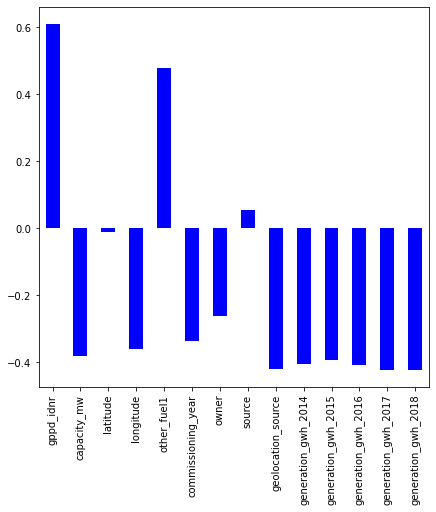

In [176]:
plt.figure(figsize=(7,7))
df.corr().primary_fuel.drop(['primary_fuel']).plot(kind='bar',color='blue')
plt.show()

###### Skewness

In [177]:
df.skew().sort_values()

geolocation_source    -1.920302
other_fuel1           -1.626786
owner                 -1.373940
commissioning_year    -1.067949
latitude              -0.145866
gppd_idnr              0.000000
primary_fuel           0.472251
longitude              1.112646
source                 1.827373
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

###### Outliers

In [178]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([ 15,  71,  80, 143, 147, 191, 209, 299, 308, 321, 345, 363, 364,
        375, 482, 493, 494, 648, 657, 661, 669, 689, 695, 726, 767, 786,
        788, 808, 811, 813, 817, 832, 870, 871, 879, 880, 895, 900],
       dtype=int64),
 array([1, 8, 8, 1, 1, 8, 1, 8, 1, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8,
        1, 1, 1, 1, 1, 1, 5, 5, 5, 8, 8, 8, 8, 1, 8, 8], dtype=int64))

In [179]:
z1.iloc[879,8]

3.118730590058321

In [180]:
z1.iloc[900,8]

3.2532048583162174

###### Data cleansing

In [181]:
df4=df.drop(['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2017','generation_gwh_2016','commissioning_year','generation_gwh_2015','generation_gwh_2014','latitude'],axis=1)
df4

gppd_idnr  primary_fuel  other_fuel1  owner  source  geolocation_source
0          657             6            3    229     109                   1
1          519             1            3    258     174                   2
2          853             7            3      2      21                   2
3            0             2            3    280      22                   2
4            1             1            2    280      22                   2
..         ...           ...          ...    ...     ...                 ...
902        491             1            2    280      22                   2
903        822             6            3    114      77                   0
904        891             7            3    280      21                   2
905        539             1            3     91      59                   2
906        876             7            3    279      21                   2

[907 rows x 6 columns]

###### Removing Multicollinearity

In [182]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [183]:
x=df4.drop(['primary_fuel'],axis=1)
x

gppd_idnr  other_fuel1  owner  source  geolocation_source
0          657            3    229     109                   1
1          519            3    258     174                   2
2          853            3      2      21                   2
3            0            3    280      22                   2
4            1            2    280      22                   2
..         ...          ...    ...     ...                 ...
902        491            2    280      22                   2
903        822            3    114      77                   0
904        891            3    280      21                   2
905        539            3     91      59                   2
906        876            3    279      21                   2

[907 rows x 5 columns]

In [184]:
def vif():
    df5=pd.DataFrame()
    df5['Features']=x.columns
    df5['Variance_Inflation_Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df5)

In [185]:
vif()

             Features  Variance_Inflation_Factor
0           gppd_idnr                   6.706549
1         other_fuel1                  21.728696
2               owner                  10.063266
3              source                   2.865833
4  geolocation_source                   9.974847


###### Removing Outliers

In [186]:
df5=df4[(z<3).all(axis=1)]

In [187]:
df5

gppd_idnr  primary_fuel  other_fuel1  owner  source  geolocation_source
0          657             6            3    229     109                   1
1          519             1            3    258     174                   2
2          853             7            3      2      21                   2
3            0             2            3    280      22                   2
4            1             1            2    280      22                   2
..         ...           ...          ...    ...     ...                 ...
902        491             1            2    280      22                   2
903        822             6            3    114      77                   0
904        891             7            3    280      21                   2
905        539             1            3     91      59                   2
906        876             7            3    279      21                   2

[832 rows x 6 columns]

In [188]:
print(df4.shape)
print(df5.shape)

(907, 6)
(832, 6)


In [189]:
percentage_loss=(907-832)*100/907
percentage_loss

8.26901874310915

In [190]:
df5.skew().sort_values()

geolocation_source   -1.852532
other_fuel1          -1.460096
owner                -1.248127
gppd_idnr            -0.051074
primary_fuel          0.415575
source                1.780743
dtype: float64

###### Standard Scaler

In [191]:
x=df5.drop(['primary_fuel'],axis=1)
x

gppd_idnr  other_fuel1  owner  source  geolocation_source
0          657            3    229     109                   1
1          519            3    258     174                   2
2          853            3      2      21                   2
3            0            3    280      22                   2
4            1            2    280      22                   2
..         ...          ...    ...     ...                 ...
902        491            2    280      22                   2
903        822            3    114      77                   0
904        891            3    280      21                   2
905        539            3     91      59                   2
906        876            3    279      21                   2

[832 rows x 5 columns]

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.74113783,  0.50862456,  0.06858971,  1.57087564, -1.04866487],
       [ 0.22186692,  0.50862456,  0.4053003 ,  3.11311939,  0.35630964],
       [ 1.47865302,  0.50862456, -2.56704142, -0.51708513,  0.35630964],
       ...,
       [ 1.62164066,  0.50862456,  0.66073591, -0.51708513,  0.35630964],
       [ 0.29712358,  0.50862456, -1.53368825,  0.3845343 ,  0.35630964],
       [ 1.56519817,  0.50862456,  0.6491252 , -0.51708513,  0.35630964]])

1.708035422500241e-17
1.0


AxesSubplot(0.125,0.125;0.775x0.755)


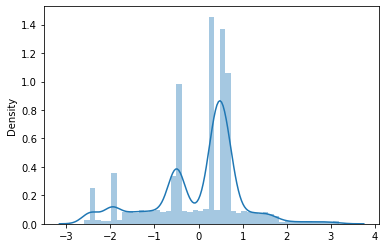

In [194]:
print(x.mean())
print(x.std())
print('\n')
print(sns.distplot(x))
plt.show()

###### Not using PCA technique as I've less than 5 columns only

In [195]:
y=df5['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 832, dtype: int32

In [196]:
import pandas
import numpy
print('sklearn version',sklearn.__version__)
print('numpy version',numpy.__version__)
print('pandas version',pandas.__version__)

sklearn version 1.0.2
numpy version 1.21.5
pandas version 1.4.2


In [197]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [198]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [199]:
y.value_counts()

6    230
1    230
7    230
2    230
3    230
0    230
5    230
4    230
Name: primary_fuel, dtype: int64

###### We can now clearly see that the classes of target variable primary_fuel is balanced.There are total 8 class are present and due to this we can't use Logistic Regression as well GaussianNB because these two supports only binary classes 0 & 1.

In [200]:
print(x.shape)
print(y.shape)

(1840, 5)
(1840,)


#### we can't use Logistice and gaussian NB model as class is greater than 2

Training-Testing Phase
taking 20% for test and 80% for training

In [201]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [202]:
#will finding best value of random_state
for h in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.7676630434782609
Testing Accuracy Score is-  0.6440217391304348


At random_state 1
Training Accuracy Score is-  0.7744565217391305
Testing Accuracy Score is-  0.6711956521739131


At random_state 2
Training Accuracy Score is-  0.7697010869565217
Testing Accuracy Score is-  0.6929347826086957


At random_state 3
Training Accuracy Score is-  0.7649456521739131
Testing Accuracy Score is-  0.7282608695652174


At random_state 4
Training Accuracy Score is-  0.7724184782608695
Testing Accuracy Score is-  0.6657608695652174


At random_state 5
Training Accuracy Score is-  0.7744565217391305
Testing Accuracy Score is-  0.6603260869565217


At random_state 6
Training Accuracy Score is-  0.782608695652174
Testing Accuracy Score is-  0.657608695652174


At random_state 7
Training Accuracy Score is-  0.7683423913043478
Testing Accuracy Score is-  0.6929347826086957


At random_state 8
Training Accuracy Score is-  0.7730978260869565
Testing Accuracy

In [203]:
#Traing the Logistic Regression Model at Random_State 47
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',47)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 47
Training Accuracy Score is-  0.7690217391304348
Testing Accuracy Score is-  0.6467391304347826




#### KNeighborsClassifier model performs well but since training accuracy is more than testing accuracy hence there would be overfitting and due to this Bias will be on lower side and variance would be on higher side,also will check the cv score for each model going forward.
Finding Out CV Score

In [204]:
from sklearn.model_selection import cross_val_score

In [205]:
for i in range(2,12):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.5918478260869565
At K-Fold 3 the CV Score of model is 0.5918667736501746
At K-Fold 4 the CV Score of model is 0.6032608695652174
At K-Fold 5 the CV Score of model is 0.6097826086956522
At K-Fold 6 the CV Score of model is 0.6060193168834672
At K-Fold 7 the CV Score of model is 0.6288463372461862
At K-Fold 8 the CV Score of model is 0.6228260869565218
At K-Fold 9 the CV Score of model is 0.6223284977947819
At K-Fold 10 the CV Score of model is 0.6326086956521739
At K-Fold 11 the CV Score of model is 0.6299057728698446


###### we are getting good CV score as 64%,so we can say that CV score is helping the model in generalizing and make it perform better while doing the prediction.

In [297]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
svc=SVC()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [298]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,12):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

In [315]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6467391304347826
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.575


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5750089005319065


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.5907608695652173


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.5815217391304348


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.5853505354367589


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.5918829378324924


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.6070652173913044


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.6071151495828685


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.6065217391304347


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.5983844000311066




In [270]:
model(svc,x,y)

For SVC(decision_function_shape='ovo')
Training_Accuracy_Score= 0.641983695652174
Testing_Accuracy_Score= 0.6168478260869565
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo') is 0.5407608695652174


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo') is 0.5896907928646961


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo') is 0.5929347826086957


At the K-Fold 5 the CV score of model SVC(decision_function_shape='ovo') is 0.5940217391304348


At the K-Fold 6 the CV score of model SVC(decision_function_shape='ovo') is 0.5951313931290939


At the K-Fold 7 the CV score of model SVC(decision_function_shape='ovo') is 0.5972961093995547


At the K-Fold 8 the CV score of model SVC(decision_function_shape='ovo') is 0.6005434782608696


At the K-Fold 9 the CV score of model SVC(decision_function_shape='ovo') is 0.6071178064721825


At the K-Fold 10 the CV score of model SVC(decision_function_shape='ovo') is 0.6070652173913043


A

In [309]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6440217391304348
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5804347826086956


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.5902239391540155


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.6103260869565217


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.6005434782608695


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.5983887221193219


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.6076352463604662


At the K-Fold 8 the CV score of model RandomForestClassifier() is 0.6217391304347826


At the K-Fold 9 the CV score of model RandomForestClassifier() is 0.6206891970880493


At the K-Fold 10 the CV score of model RandomForestClassifier() is 0.6222826086956521


At the K-Fold 11 the CV score of model RandomForestClassifier() is 0.6179524068745625




In [272]:
model(ad,x,y)

For AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.5713315217391305
Testing_Accuracy_Score= 0.5679347826086957
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4826086956521739


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5065323704817624


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5630434782608695


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5347826086956522


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5103485838779956


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5158062121896911


At the K-Fold 8 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.48750000000000004


At the K-Fold 9 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4994845634730857


At the K-Fold 10 the CV score of model AdaBoostClassifier(algorithm='S

In [280]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.876358695652174
Testing_Accuracy_Score= 0.657608695652174
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5777173913043478


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5739231242018303


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.6086956521739131


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.5902173913043478


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.5951349414177542


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.6054583677141945


At the K-Fold 8 the CV score of model GradientBoostingClassifier() is 0.620108695652174


At the K-Fold 9 the CV score of model GradientBoostingClassifier() is 0.6103724958818216


At the K-Fold 10 the CV score of model GradientBoostingClassifier() is 0.625


At the K-Fold 11 the CV score of model GradientBoostingClassifier() is 0.622

In [275]:
model(sgd,x,y)

For SGDClassifier()
Training_Accuracy_Score= 0.5230978260869565
Testing_Accuracy_Score= 0.5054347826086957
At the K-Fold 2 the CV score of model SGDClassifier() is 0.5249999999999999


At the K-Fold 3 the CV score of model SGDClassifier() is 0.5511023375187974


At the K-Fold 4 the CV score of model SGDClassifier() is 0.5413043478260869


At the K-Fold 5 the CV score of model SGDClassifier() is 0.5744565217391304


At the K-Fold 6 the CV score of model SGDClassifier() is 0.5760930503218298


At the K-Fold 7 the CV score of model SGDClassifier() is 0.5380373262125213


At the K-Fold 8 the CV score of model SGDClassifier() is 0.5451086956521739


At the K-Fold 9 the CV score of model SGDClassifier() is 0.5586853711674372


At the K-Fold 10 the CV score of model SGDClassifier() is 0.5603260869565216


At the K-Fold 11 the CV score of model SGDClassifier() is 0.5669148715555901




#### Hyper Parameter Tuning
To make the model more accurate by providing their best parameters

In [214]:
from sklearn.model_selection import GridSearchCV

In [299]:
#defining all the parameters of the respective models
dict_svc={'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
dict_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None]}
dict_ad={'algorithm':['SAMME', 'SAMME.R']}
dict_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse']}

In [300]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [217]:
HPT(svc,dict_svc)

The best Parameters of the model SVC() is {'decision_function_shape': 'ovo', 'gamma': 'scale'}


In [218]:
HPT(dtc,dict_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}


In [219]:
HPT(rfc,dict_rfc)

The best Parameters of the model RandomForestClassifier() is {'criterion': 'entropy', 'max_features': 'log2'}


In [220]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [221]:
HPT(grd,dict_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'deviance'}


In [266]:
svc=SVC(decision_function_shape='ovo',gamma='scale')
dtc=DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')
rfc=RandomForestClassifier(criterion='gini',max_features=None)
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(loss='log_loss',criterion='friedman_mse')

In [276]:
model(kn,x,y)

For KNeighborsClassifier()
Training_Accuracy_Score= 0.7730978260869565
Testing_Accuracy_Score= 0.6793478260869565
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.5918478260869565


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.5918667736501746


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.6032608695652174


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.6097826086956522


At the K-Fold 6 the CV score of model KNeighborsClassifier() is 0.6060193168834672


At the K-Fold 7 the CV score of model KNeighborsClassifier() is 0.6288463372461862


At the K-Fold 8 the CV score of model KNeighborsClassifier() is 0.6228260869565218


At the K-Fold 9 the CV score of model KNeighborsClassifier() is 0.6223284977947819


At the K-Fold 10 the CV score of model KNeighborsClassifier() is 0.6326086956521739


At the K-Fold 11 the CV score of model KNeighborsClassifier() is 0.6299057728698446




In [224]:
model(svc,x,y)

For SVC(decision_function_shape='ovo')
Training_Accuracy_Score= 0.641983695652174
Testing_Accuracy_Score= 0.6168478260869565
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo') is 0.5407608695652174


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo') is 0.5896907928646961


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo') is 0.5929347826086957


At the K-Fold 5 the CV score of model SVC(decision_function_shape='ovo') is 0.5940217391304348


At the K-Fold 6 the CV score of model SVC(decision_function_shape='ovo') is 0.5951313931290939


At the K-Fold 7 the CV score of model SVC(decision_function_shape='ovo') is 0.5972961093995547


At the K-Fold 8 the CV score of model SVC(decision_function_shape='ovo') is 0.6005434782608696


At the K-Fold 9 the CV score of model SVC(decision_function_shape='ovo') is 0.6071178064721825


At the K-Fold 10 the CV score of model SVC(decision_function_shape='ovo') is 0.6070652173913043


A

In [316]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6467391304347826
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.575


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.5701175932961725


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.5896739130434783


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.5831521739130434


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.5864327634781745


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.5935104137728002


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.6092391304347826


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.6082097879802328


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.6059782608695652


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.600014257199886




In [308]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6467391304347826
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.5853260869565218


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.5869639532885915


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.608695652173913


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.5967391304347827


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.5994744984493979


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.6070941365255358


At the K-Fold 8 the CV score of model RandomForestClassifier() is 0.6228260869565218


At the K-Fold 9 the CV score of model RandomForestClassifier() is 0.6239492002763165


At the K-Fold 10 the CV score of model RandomForestClassifier() is 0.6206521739130435


At the K-Fold 11 the CV score of model RandomForestClassifier() is 0.6179459263291599




In [227]:
model(ad,x,y)

For AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.5713315217391305
Testing_Accuracy_Score= 0.5679347826086957
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4826086956521739


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5065323704817624


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5630434782608695


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5347826086956522


At the K-Fold 6 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5103485838779956


At the K-Fold 7 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.5158062121896911


At the K-Fold 8 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.48750000000000004


At the K-Fold 9 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.4994845634730857


At the K-Fold 10 the CV score of model AdaBoostClassifier(algorithm='S

In [281]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.876358695652174
Testing_Accuracy_Score= 0.657608695652174
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.5777173913043478


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.5739231242018303


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.6086956521739131


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.5907608695652173


At the K-Fold 6 the CV score of model GradientBoostingClassifier() is 0.5945920532527162


At the K-Fold 7 the CV score of model GradientBoostingClassifier() is 0.6054583677141945


At the K-Fold 8 the CV score of model GradientBoostingClassifier() is 0.620108695652174


At the K-Fold 9 the CV score of model GradientBoostingClassifier() is 0.6103724958818216


At the K-Fold 10 the CV score of model GradientBoostingClassifier() is 0.625


At the K-Fold 11 the CV score of model GradientBoostingClassifier() is 0.622

###### Conclusion

In [282]:
import joblib

In [283]:
file='global_grd.obj'
joblib.dump(grd,file)

['global_grd.obj']

In [288]:
c=joblib.load('global_grd.obj')
c

GradientBoostingClassifier()

###### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [289]:
Prediction=c.predict(x_test)
Prediction

array([4, 2, 6, 3, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 3, 7, 3, 6, 3, 4, 3,
       1, 2, 1, 4, 6, 1, 6, 4, 7, 0, 1, 2, 3, 7, 2, 0, 5, 6, 6, 1, 1, 3,
       6, 1, 1, 6, 3, 4, 3, 0, 6, 0, 4, 7, 4, 4, 3, 4, 2, 0, 4, 4, 3, 4,
       0, 6, 2, 0, 2, 3, 2, 1, 6, 3, 7, 1, 7, 5, 0, 7, 4, 6, 0, 1, 0, 6,
       7, 4, 7, 3, 1, 7, 6, 3, 2, 2, 7, 1, 1, 1, 4, 3, 7, 4, 7, 6, 1, 6,
       5, 6, 5, 7, 0, 5, 0, 3, 6, 7, 6, 3, 7, 4, 6, 4, 3, 1, 3, 2, 0, 4,
       2, 4, 3, 1, 2, 1, 2, 2, 1, 7, 1, 2, 0, 7, 0, 6, 1, 1, 7, 5, 6, 6,
       1, 1, 2, 4, 0, 7, 2, 2, 4, 5, 6, 2, 5, 4, 1, 3, 3, 4, 5, 0, 0, 0,
       6, 0, 1, 4, 4, 1, 1, 7, 1, 2, 4, 4, 4, 6, 0, 2, 3, 7, 3, 2, 4, 6,
       4, 4, 1, 0, 4, 4, 7, 4, 3, 2, 7, 4, 1, 7, 7, 2, 3, 2, 6, 7, 0, 6,
       6, 4, 0, 0, 3, 2, 1, 4, 3, 5, 0, 7, 1, 7, 3, 7, 4, 2, 6, 5, 0, 3,
       3, 7, 4, 1, 7, 7, 5, 7, 2, 5, 5, 7, 0, 6, 0, 5, 0, 7, 3, 7, 6, 3,
       1, 4, 4, 3, 7, 1, 6, 1, 3, 0, 4, 5, 7, 4, 1, 5, 1, 5, 2, 4, 5, 5,
       2, 1, 1, 2, 3, 0, 0, 3, 3, 1, 7, 4, 5, 2, 0,

In [290]:
accuracyScore=accuracy_score(y_test,Prediction)
accuracyScore

0.8396739130434783

In [291]:
conclusion=pd.DataFrame(data=[Prediction,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    3    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    1    1    7    5    7    3    0    2    3  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

###### Predicted primary_fuel and Original primary_fuel both are almost similar

##### 2nd Best Model

In [317]:
file='globalpower.obj'
joblib.dump(dtc,file)

['globalpower.obj']

In [318]:
b=joblib.load('globalpower.obj')
b

DecisionTreeClassifier()

In [319]:
Pred=b.predict(x_test)
Pred

array([4, 2, 6, 3, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 3, 7, 3, 6, 3, 5, 3,
       1, 2, 1, 5, 6, 1, 6, 4, 7, 0, 1, 2, 3, 7, 2, 0, 5, 6, 6, 1, 1, 4,
       6, 1, 1, 6, 2, 4, 3, 0, 6, 0, 4, 7, 4, 5, 3, 4, 2, 0, 4, 4, 3, 5,
       0, 6, 2, 0, 2, 3, 2, 1, 6, 3, 7, 1, 7, 5, 0, 7, 4, 6, 0, 1, 0, 6,
       7, 4, 7, 3, 1, 7, 6, 3, 2, 2, 7, 1, 1, 1, 3, 2, 7, 4, 7, 6, 1, 6,
       5, 6, 5, 7, 0, 5, 0, 4, 6, 7, 6, 2, 7, 4, 6, 5, 3, 1, 3, 2, 0, 4,
       2, 5, 3, 1, 3, 1, 2, 2, 1, 7, 1, 3, 0, 7, 0, 6, 1, 1, 7, 5, 6, 6,
       1, 1, 2, 4, 0, 7, 5, 2, 4, 5, 6, 4, 5, 3, 1, 3, 3, 4, 5, 0, 0, 0,
       6, 0, 1, 4, 3, 1, 1, 7, 1, 3, 3, 4, 4, 6, 0, 2, 3, 7, 3, 2, 4, 6,
       4, 4, 1, 0, 4, 4, 7, 3, 5, 2, 7, 2, 1, 7, 7, 4, 3, 3, 6, 7, 2, 6,
       6, 4, 0, 0, 3, 2, 1, 4, 4, 5, 0, 7, 1, 7, 2, 7, 4, 2, 6, 5, 0, 5,
       3, 7, 4, 1, 7, 7, 5, 7, 2, 3, 2, 7, 0, 6, 0, 5, 0, 7, 2, 7, 6, 2,
       1, 4, 4, 3, 7, 1, 6, 1, 5, 0, 4, 5, 7, 5, 1, 5, 2, 5, 2, 4, 5, 5,
       2, 1, 1, 2, 2, 0, 0, 3, 5, 1, 7, 5, 5, 2, 0,

In [320]:
accuracy_score1=accuracy_score(Pred,y_test)
accuracy_score1

0.9266304347826086

In [321]:
conclusion=pd.DataFrame(data=[Pred,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    3    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    1    1    7    5    7    3    0    2    5  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

##### 1st Best Model

In [310]:
file='globalpowerrfc.obj'
joblib.dump(rfc,file)

['globalpowerrfc.obj']

In [311]:
c=joblib.load('globalpowerrfc.obj')
c

RandomForestClassifier()

In [312]:
pred1=c.predict(x_test)
pred1

array([4, 2, 6, 3, 5, 6, 0, 3, 0, 4, 5, 3, 0, 4, 7, 3, 7, 3, 6, 3, 5, 3,
       1, 2, 1, 5, 6, 1, 6, 4, 7, 0, 1, 2, 3, 7, 2, 0, 5, 6, 6, 1, 1, 4,
       6, 1, 1, 6, 2, 4, 3, 0, 6, 0, 4, 7, 4, 5, 3, 4, 2, 0, 4, 4, 3, 5,
       0, 6, 2, 0, 2, 3, 2, 1, 6, 3, 7, 1, 7, 5, 0, 7, 4, 6, 0, 1, 0, 6,
       7, 4, 7, 3, 1, 7, 6, 3, 2, 2, 7, 1, 1, 1, 3, 2, 7, 4, 7, 6, 1, 6,
       5, 6, 5, 7, 0, 5, 0, 4, 6, 7, 6, 2, 7, 4, 6, 5, 3, 1, 3, 2, 0, 4,
       2, 5, 3, 1, 3, 1, 2, 2, 1, 7, 1, 3, 0, 7, 0, 6, 1, 1, 7, 5, 6, 6,
       1, 1, 2, 4, 0, 7, 5, 2, 4, 5, 6, 4, 5, 3, 1, 3, 3, 4, 5, 0, 0, 0,
       6, 0, 1, 4, 3, 1, 1, 7, 1, 3, 3, 4, 4, 6, 0, 2, 3, 7, 3, 2, 4, 6,
       4, 4, 1, 0, 4, 4, 7, 3, 5, 2, 7, 2, 1, 7, 7, 4, 3, 3, 6, 7, 2, 6,
       6, 4, 0, 0, 3, 2, 1, 4, 4, 5, 0, 7, 1, 7, 2, 7, 4, 2, 6, 5, 0, 5,
       3, 7, 4, 1, 7, 7, 5, 7, 2, 3, 2, 7, 0, 6, 0, 5, 0, 7, 2, 7, 6, 2,
       1, 4, 4, 3, 7, 1, 6, 1, 5, 0, 4, 5, 7, 5, 1, 5, 2, 5, 2, 4, 5, 5,
       2, 1, 1, 2, 2, 0, 0, 3, 5, 1, 7, 5, 5, 2, 0,

In [313]:
ACCURACY=accuracy_score(pred1,y_test)
ACCURACY

0.9266304347826086

###### Accuracy is 92% which is higher than other model

In [314]:
conclusion=pd.DataFrame(data=[pred1,y_test],index=['Predicted primary_fuel','Original primary_fuel'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  \
Predicted primary_fuel    4    2    6    3    5    6    0    3    0    4  ...   
Original primary_fuel     4    2    6    3    5    6    0    3    0    4  ...   

                        358  359  360  361  362  363  364  365  366  367  
Predicted primary_fuel    6    1    1    7    5    7    3    0    2    5  
Original primary_fuel     6    1    1    7    5    7    3    0    2    5  

[2 rows x 368 columns]

###### Actual value and predicted value is almost same with the help of this model too but since the testing accuracy score of the model is higher as compare to other hence will say that RandomForestClassifier model performs really well while deploying our model on testing and we've got 91% of accuracy while doing so.